# Coronavirus Disease (COVID-19)

https://github.com/owid/covid-19-data/tree/master/public/data/
https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
from IPython import display

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')                                              

# Import Image

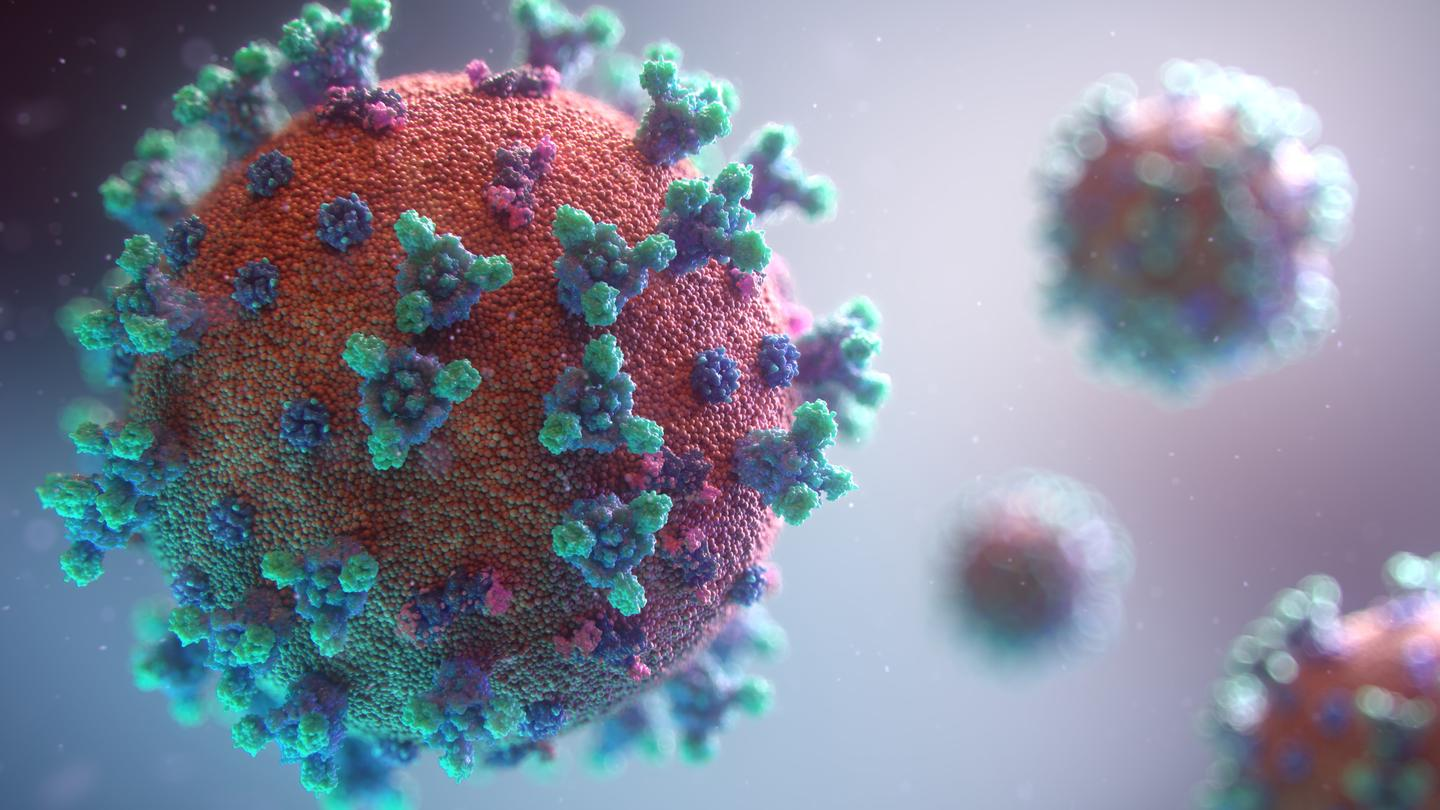

In [3]:
# get current working directory
path_directory = os.getcwd()  

image_path = os.path.join(path_directory, 'images', 'Covid 19.jpg')

display.Image(image_path)

# Fetch Data

In [4]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(url)

# Head and Tail

In [5]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [6]:
df.shape

(222142, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222142 entries, 0 to 222141
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    222142 non-null  object 
 1   continent                                   209378 non-null  object 
 2   location                                    222142 non-null  object 
 3   date                                        222142 non-null  object 
 4   total_cases                                 212994 non-null  float64
 5   new_cases                                   212754 non-null  float64
 6   new_cases_smoothed                          211558 non-null  float64
 7   total_deaths                                193862 non-null  float64
 8   new_deaths                                  193821 non-null  float64
 9   new_deaths_smoothed                         192641 non-null  float64
 

In [8]:
df.dtypes.value_counts()

float64    62
object      5
dtype: int64

In [9]:
df['iso_code'].value_counts(ascending=False).head(10)                     # explore the top ten count for different iso codes

ARG         1011
MEX         1011
THA         1008
TWN          996
MAC          990
OWID_WRL     990
OWID_UMC     990
KOR          990
CHN          990
USA          990
Name: iso_code, dtype: int64

In [10]:
df['continent'].value_counts()                                                                            

Africa           51298
Europe           48004
Asia             47810
North America    34136
Oceania          15805
South America    12325
Name: continent, dtype: int64

In [11]:
round(df['continent'].value_counts(True), 3)                              # calculate the relative frequencies for each continent                        

Africa           0.245
Europe           0.229
Asia             0.228
North America    0.163
Oceania          0.075
South America    0.059
Name: continent, dtype: float64

(-1.1320645503092261,
 1.2045025187182214,
 -1.1146612026592106,
 1.1081635176292894)

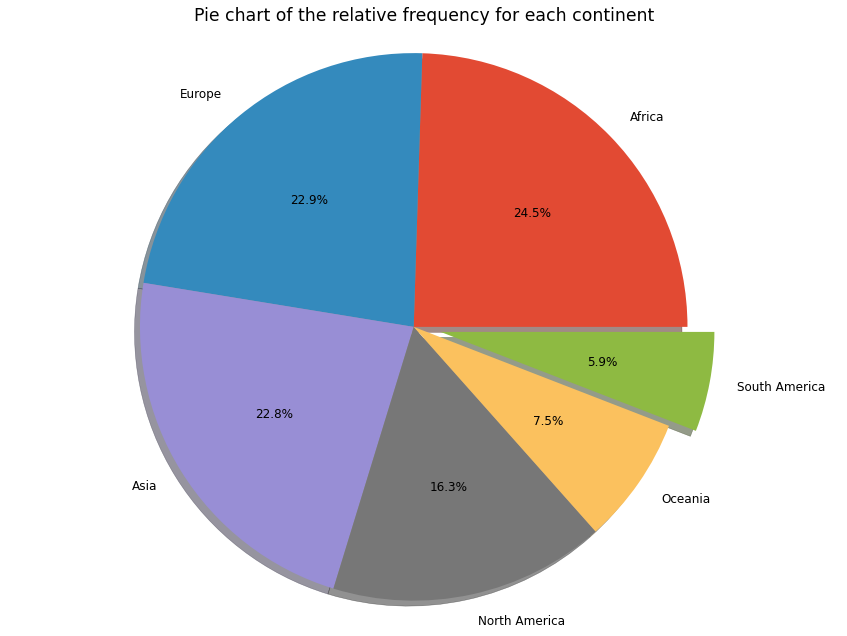

In [12]:
fig, ax = plt.subplots()

plt.pie(
          x=df['continent'].value_counts(True).values, labels=df['continent'].value_counts(True).keys(),
          autopct='%1.1f%%', shadow=True, 
          explode=[0, 0, 0, 0, 0, 0.1]
        )

ax.set(title='Pie chart of the relative frequency for each continent')
ax.axis('equal')

In [13]:
df['location'].value_counts().head(10)

Argentina              1011
Mexico                 1011
Thailand               1008
Taiwan                  996
Macao                   990
World                   990
Upper middle income     990
South Korea             990
China                   990
United States           990
Name: location, dtype: int64

In [14]:
df.describe(include='object')

iso_code continent   location        date      tests_units
count    222142    209378     222142      222142           106788
unique      244         6        244        1011                4
top         ARG    Africa  Argentina  2021-09-19  tests performed
freq       1011     51298       1011         243            80099

In [15]:
df['tests_units'].value_counts()

tests performed    80099
people tested      16257
samples tested      9591
units unclear        841
Name: tests_units, dtype: int64

<AxesSubplot:xlabel='continent', ylabel='count'>

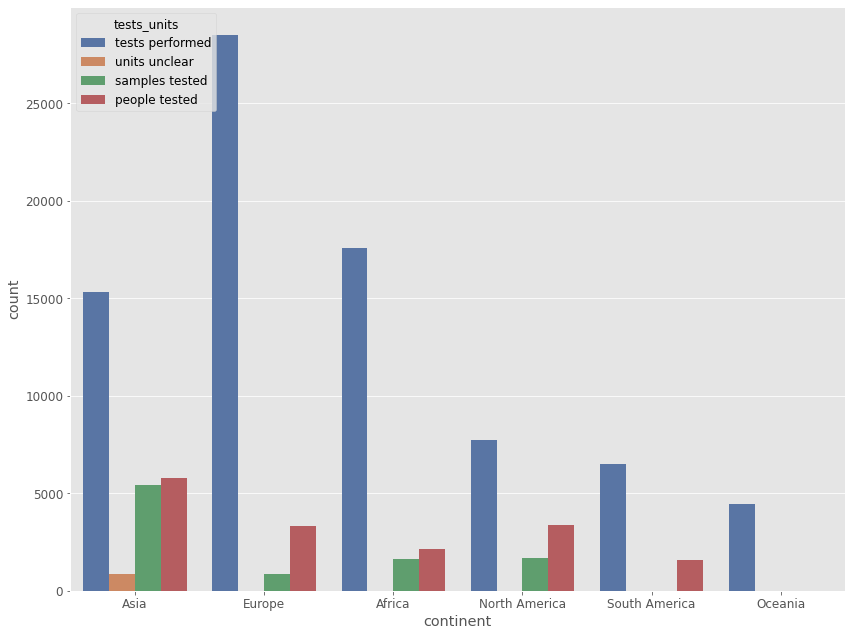

In [16]:
sns.countplot(data=df, x='continent', hue='tests_units', palette='deep')

In [17]:
df.describe(include='float64')

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.12994e+05  2.12754e+05         2.11558e+05   1.93862e+05   
mean   4.31043e+06  1.24429e+04         1.24736e+04   7.30938e+04   
std    2.69916e+07  8.57909e+04         8.38496e+04   3.76387e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.12525e+03  0.00000e+00         6.28600e+00   1.11000e+02   
50%    4.74355e+04  5.60000e+01         9.64290e+01   1.14600e+03   
75%    5.09902e+05  9.73000e+02         1.13911e+03   9.65250e+03   
max    6.20931e+08  4.08174e+06         3.43627e+06   6.55609e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  193821.00000         192641.00000             212020.00000   
mean      140.45436            141.15430              58132.85771   
std       736.30628            721.84306             103695.39999   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1039.00675   
50%         1.00000              1.57100               9858.84500   
75%        14.00000             16.14300              70002.48800   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           211780.00000                    210589.00000   
mean               190.27384                       190.35713   
std               1055.66690                       669.06126   
min                  0.00000                         0.00000   
25%                  0.00000                         1.38200   
50%                  7.91300                        19.72400   
75%                 98.75125                       136.50400   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              192901.00000            192860.00000   
mean                  680.61269                 1.42388   
std                   966.99447                 5.13011   
min                     0.00000                 0.00000   
25%                    28.75700                 0.00000   
50%                   206.25800                 0.03600   
75%                  1008.55900                 0.99900   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     191685.00000       166717.00000   28238.00000   
mean                           1.42321            0.94681     831.24488   
std                            3.35839            0.38405    2470.26934   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21200            0.97000     151.00000   
75%                            1.36200            1.15000     577.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28238.00000    31007.00000                31007.00000   
mean                   20.94058     4152.14684                  156.16883   
std                    26.18612    10773.21212                  191.37356   
min                     0.00000        0.00000                    0.00000   
25%                     3.77200      172.00000                   32.84700   
50%                    10.48100      808.00000                   87.99100   
75%                    29.01325     3175.50000                  198.68850   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7317.00000                         7317.00000   
mean               421.48613                           13.00998   
std                580.52434                           15.09322   
min             

In [18]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))            # convert date to pandas datetime
df.select_dtypes(include='datetime')

date
0      2020-02-24
1      2020-02-25
2      2020-02-26
3      2020-02-27
4      2020-02-28
...           ...
222137 2022-10-03
222138 2022-10-04
222139 2022-10-05
222140 2022-10-06
222141 2022-10-07

[222142 rows x 1 columns]

In [19]:
df['day_name'] = df['date'].dt.day_name()                             # add name of the day
df['day'] = df['date'].dt.day                                         # day
df['month_num'] = df['date'].dt.month                                 # add month number
df['year'] =  df['date'].dt.year                                      # year

df[['year', 'month_num', 'day', 'day_name']]

year  month_num  day   day_name
0       2020          2   24     Monday
1       2020          2   25    Tuesday
2       2020          2   26  Wednesday
3       2020          2   27   Thursday
4       2020          2   28     Friday
...      ...        ...  ...        ...
222137  2022         10    3     Monday
222138  2022         10    4    Tuesday
222139  2022         10    5  Wednesday
222140  2022         10    6   Thursday
222141  2022         10    7     Friday

[222142 rows x 4 columns]

In [20]:
# assign month names
df['month_name'] = df['month_num'].map(
                                       {
                                         1: 'Jan',
                                         2: 'Feb',
                                         3: 'Mar',
                                         4: 'Apr',
                                         5: 'May',
                                         6: 'June',
                                         7: 'July',
                                         8: 'Aug',
                                         9: 'Sep',
                                         10: 'Oct',
                                         11: 'Nov',
                                         12: 'Dec'
                                       }
                                    )

df[['month_num', 'month_name']].value_counts(ascending=False)

month_num  month_name
7          July          21774
5          May           21719
8          Aug           21718
6          June          21091
9          Sep           20984
4          Apr           20770
3          Mar           19631
10         Oct           16129
1          Jan           14919
2          Feb           14764
12         Dec           14543
11         Nov           14100
dtype: int64

<AxesSubplot:xlabel='month_num', ylabel='count'>

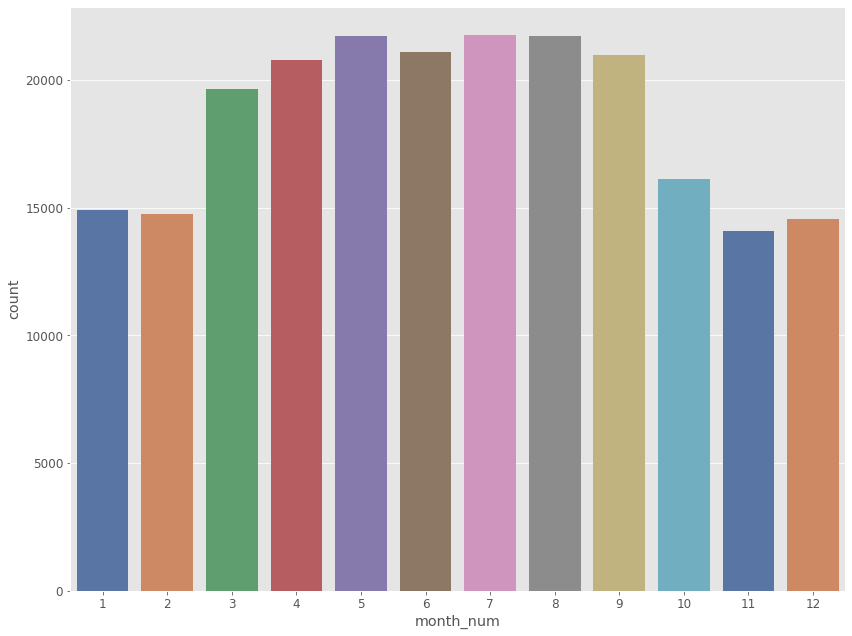

In [21]:
sns.countplot(data=df, x='month_num', palette='deep', orient=True)

In [22]:
# change month name to categorical 
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month_name'] = pd.Categorical(df['month_name'], ordered_months)

df['month_name'].dtype

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
, ordered=False)

[Text(0.5, 1.0, 'Total count by month name'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Month Name')]

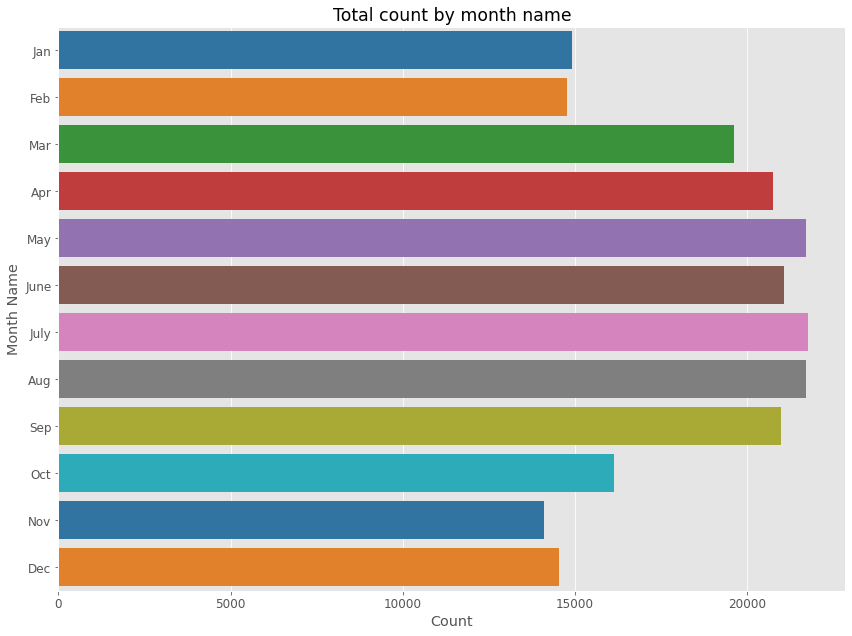

In [23]:
fig, ax = plt.subplots()

sns.countplot(data=df, y='month_name', hue_order='month_name', palette='tab10')

ax.set(title='Total count by month name', xlabel='Count',  ylabel='Month Name')

# Missing Data Exploration

In [24]:
df.isna().sum()                                                              # over 50 % missing data in some columns

iso_code                                           0
continent                                      12764
location                                           0
date                                               0
total_cases                                     9148
new_cases                                       9388
new_cases_smoothed                             10584
total_deaths                                   28280
new_deaths                                     28321
new_deaths_smoothed                            29501
total_cases_per_million                        10122
new_cases_per_million                          10362
new_cases_smoothed_per_million                 11553
total_deaths_per_million                       29241
new_deaths_per_million                         29282
new_deaths_smoothed_per_million                30457
reproduction_rate                              55425
icu_patients                                  193904
icu_patients_per_million                      

<AxesSubplot:>

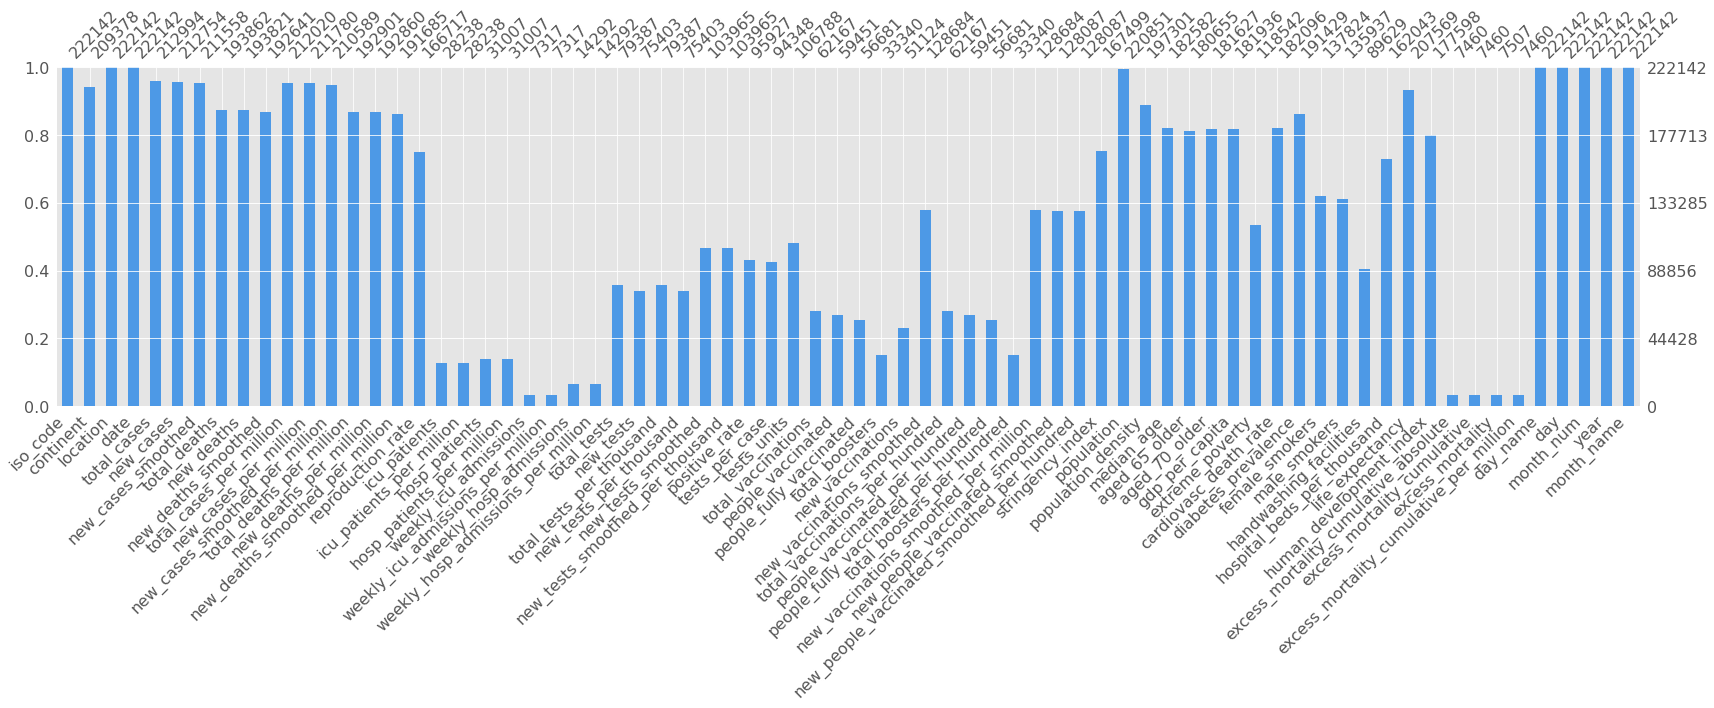

In [25]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9))                              # plot missing values for each column

<AxesSubplot:>

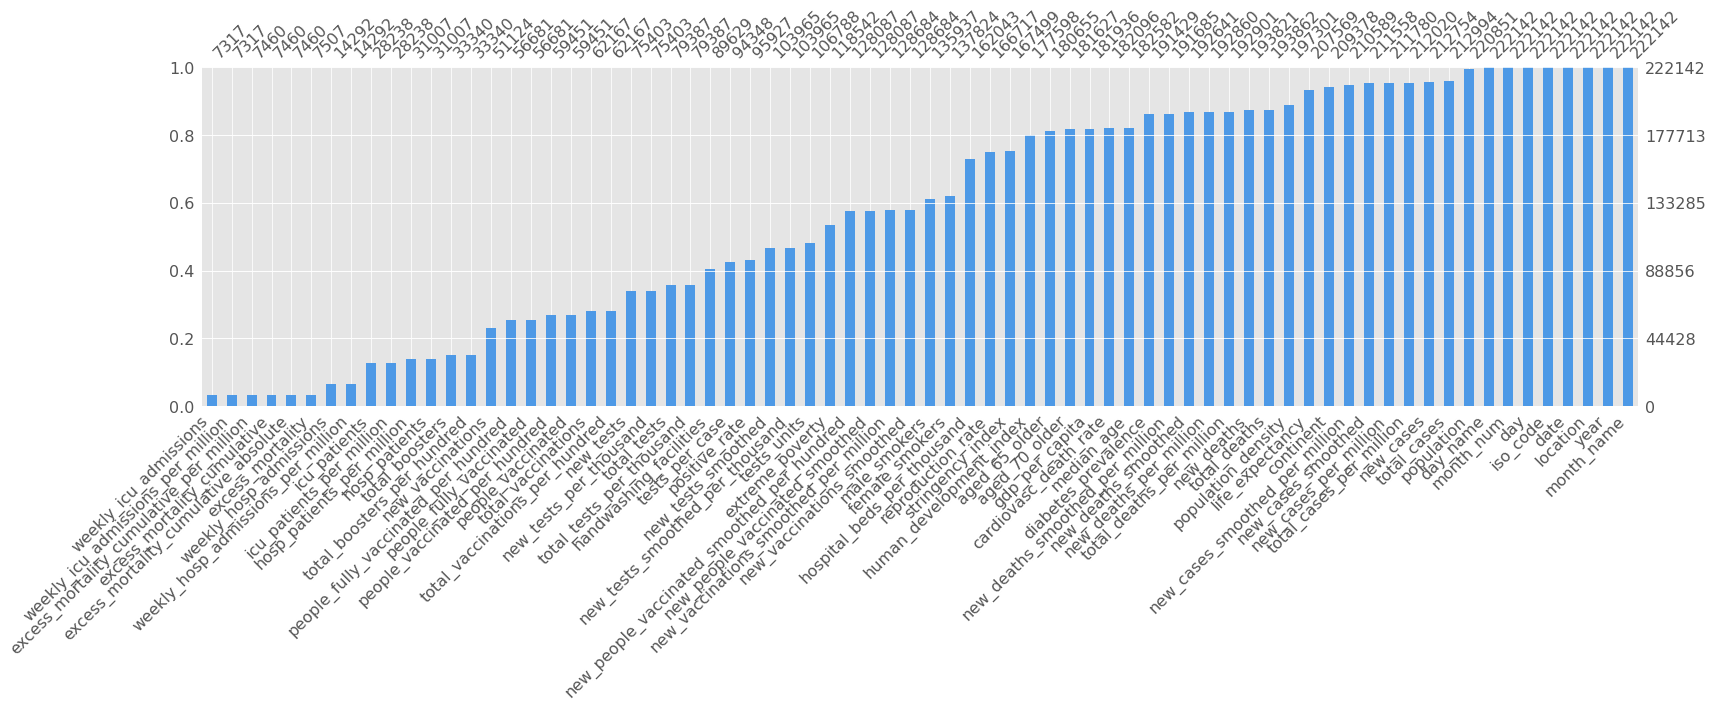

In [26]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9), sort='ascending') 

In [27]:
# filter for missing values based on the column with the highest values missing
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
222137      ZWE    Africa     Zimbabwe 2022-10-03     257538.0       21.0   
222138      ZWE    Africa     Zimbabwe 2022-10-04     257568.0       30.0   
222139      ZWE    Africa     Zimbabwe 2022-10-05     257568.0        0.0   
222140      ZWE    Africa     Zimbabwe 2022-10-06     257655.0       87.0   
222141      ZWE    Africa     Zimbabwe 2022-10-07     257655.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
222137              28.000        5603.0         1.0                0.571   
222138              27.429        5603.0         0.0                0.571   
222139              22.714        5603.0         0.0                0.143   
222140              35.143        5604.0         1.0                0.286   
222141              27.143        5604.0         0.0                0.286   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
222137                16102.643                  1.313   
222138                16104.518                  1.876   
222139                16104.518                  0.000   
222140                16109.958                  5.440   
222141                16109.958                  0.000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
222137                           1.751                   350.329   
222138                           1.715                   350.329   
222139                           1.420                   350.329   
222140                           2.197                   350.392   
222141                           1.697                   350.392   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
222137                   0.063                            0.036   
222138                   0.000                            0.036   
222139                   0.000          

Common strategies that can be used to handle missing data for this project may include:
1) ignoring the missing data
2) dropping records with missing data
3) filling the missing data

In [28]:
# droping missing data based on rows containing missing values results in an empty dataframe   
df.dropna(axis='index')

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million, day_name, day, month_num, year, month_name]
Index: []

In [29]:
# dropping missing values based on columns also returns an a smaller dataframe as almost all columns contains a missing value
df.dropna(axis='columns')

iso_code     location       date   day_name  day  month_num  year  \
0           AFG  Afghanistan 2020-02-24     Monday   24          2  2020   
1           AFG  Afghanistan 2020-02-25    Tuesday   25          2  2020   
2           AFG  Afghanistan 2020-02-26  Wednesday   26          2  2020   
3           AFG  Afghanistan 2020-02-27   Thursday   27          2  2020   
4           AFG  Afghanistan 2020-02-28     Friday   28          2  2020   
...         ...          ...        ...        ...  ...        ...   ...   
222137      ZWE     Zimbabwe 2022-10-03     Monday    3         10  2022   
222138      ZWE     Zimbabwe 2022-10-04    Tuesday    4         10  2022   
222139      ZWE     Zimbabwe 2022-10-05  Wednesday    5         10  2022   
222140      ZWE     Zimbabwe 2022-10-06   Thursday    6         10  2022   
222141      ZWE     Zimbabwe 2022-10-07     Friday    7         10  2022   

       month_name  
0             Feb  
1             Feb  
2             Feb  
3             Feb  
4             Feb  
...           ...  
222137        Oct  
222138        Oct  
222139        Oct  
222140        Oct  
222141        Oct  

[222142 rows x 8 columns]

Filling the missing data

In [30]:
# filling missing values with a constant value will not be a good decision for instance in total cases or deaths that varies for different locations
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
222137      ZWE    Africa     Zimbabwe 2022-10-03     257538.0       21.0   
222138      ZWE    Africa     Zimbabwe 2022-10-04     257568.0       30.0   
222139      ZWE    Africa     Zimbabwe 2022-10-05     257568.0        0.0   
222140      ZWE    Africa     Zimbabwe 2022-10-06     257655.0       87.0   
222141      ZWE    Africa     Zimbabwe 2022-10-07     257655.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
222137              28.000        5603.0         1.0                0.571   
222138              27.429        5603.0         0.0                0.571   
222139              22.714        5603.0         0.0                0.143   
222140              35.143        5604.0         1.0                0.286   
222141              27.143        5604.0         0.0                0.286   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
222137                16102.643                  1.313   
222138                16104.518                  1.876   
222139                16104.518                  0.000   
222140                16109.958                  5.440   
222141                16109.958                  0.000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
222137                           1.751                   350.329   
222138                           1.715                   350.329   
222139                           1.420                   350.329   
222140                           2.197                   350.392   
222141                           1.697                   350.392   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
222137                   0.063                            0.036   
222138                   0.000                            0.036   
222139                   0.000          

Fill with Mean / Median of Group

In [31]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('mean')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.07992e+05  2.07992e+05         2.07992e+05   2.04839e+05   
mean   4.24185e+06  1.21296e+04         1.21578e+04   6.83449e+04   
std    2.72819e+07  8.64139e+04         8.43875e+04   3.67093e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.42700e+03  0.00000e+00         5.42900e+00   7.80000e+01   
50%    3.97285e+04  4.60000e+01         8.04290e+01   7.89000e+02   
75%    4.16502e+05  8.17000e+02         9.35857e+02   7.34050e+03   
max    6.20931e+08  4.08174e+06         3.43627e+06   6.55609e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  204839.00000         204839.00000             207018.00000   
mean      131.37782            131.90525              54662.72675   
std       717.00243            702.16802              99889.46942   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.01207                939.07100   
50%         0.60392              1.00000               8676.98500   
75%        11.00000             12.00000              65109.00000   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           207018.00000                    207018.00000   
mean               182.58022                       182.16587   
std               1053.69392                       658.85214   
min                  0.00000                         0.00000   
25%                  0.00000                         1.25000   
50%                  6.91000                        17.43200   
75%                 89.31500                       126.52400   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              203865.00000            203865.00000   
mean                  630.70972                 1.40583   
std                   925.61926                 4.97313   
min                     0.00000                 0.00000   
25%                    29.00500                 0.00000   
50%                   189.18500                 0.07200   
75%                   920.83591                 1.08300   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     203865.00000        174060.0000   29815.00000   
mean                           1.39447             0.9348     762.61609   
std                            3.24366             0.3764    2514.78643   
min                            0.00000            -0.0800       0.00000   
25%                            0.00400             0.7500      24.00000   
50%                            0.22300             0.9600      90.00000   
75%                            1.39800             1.1300     500.00000   
max                          148.67300             5.7200   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29815.00000    31844.00000                31844.00000   
mean                   18.34479     3973.22195                  149.21233   
std                    21.82004    10759.93606                  181.72537   
min                     0.00000        0.00000                    0.00000   
25%                     4.51100      172.00000                   39.75050   
50%                     9.55000      796.36611                   85.02100   
75%                    27.67800     2877.00000                  192.22750   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            10088.00000                        10088.00000   
mean               167.27379                           11.26056   
std                291.31497                            8.60404   
min             

In [32]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('median')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.07992e+05  2.07992e+05         2.07992e+05   2.04839e+05   
mean   4.24111e+06  1.21231e+04         1.21303e+04   6.84345e+04   
std    2.72816e+07  8.64142e+04         8.43465e+04   3.67233e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.52450e+03  0.00000e+00         5.28600e+00   7.70000e+01   
50%    3.97030e+04  4.55000e+01         7.95710e+01   7.89000e+02   
75%    4.14388e+05  8.09000e+02         9.20571e+02   7.33200e+03   
max    6.20931e+08  4.08174e+06         3.43627e+06   6.55609e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  204839.00000         204839.00000             207018.00000   
mean      130.89794            131.40275              54867.54158   
std       716.91905            702.01782             100443.62273   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000                932.51950   
50%         0.00000              1.00000               8547.20700   
75%        10.00000             11.42900              65065.37500   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           207018.00000                    207018.00000   
mean               177.80322                       176.73171   
std               1050.98904                       654.08368   
min                  0.00000                         0.00000   
25%                  0.00000                         1.15300   
50%                  6.37100                        16.67150   
75%                 86.26300                       122.47500   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              203865.00000            203865.00000   
mean                  636.13119                 1.27481   
std                   929.29056                 4.95971   
min                     0.00000                 0.00000   
25%                    28.49800                 0.00000   
50%                   191.59900                 0.00000   
75%                   924.67100                 0.75600   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     203865.00000       174060.00000   29815.00000   
mean                           1.28081            0.92984     736.69681   
std                            3.22302            0.38051    2473.22644   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.74000      24.00000   
50%                            0.14100            0.96000      89.00000   
75%                            1.16450            1.13000     453.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29815.00000    31844.00000                31844.00000   
mean                   17.55697     3749.79352                  143.03038   
std                    22.03162    10468.43341                  181.06218   
min                     0.00000        0.00000                    0.00000   
25%                     3.68200      170.00000                   39.16100   
50%                     9.26700      762.50000                   76.14350   
75%                    23.43700     2817.00000                  169.72600   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            10088.00000                        10088.00000   
mean               134.87609                            7.09255   
std                260.36547                            3.60281   
min             

In [33]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.12994e+05  2.12754e+05         2.11558e+05   1.93862e+05   
mean   4.31043e+06  1.24429e+04         1.24736e+04   7.30938e+04   
std    2.69916e+07  8.57909e+04         8.38496e+04   3.76387e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.12525e+03  0.00000e+00         6.28600e+00   1.11000e+02   
50%    4.74355e+04  5.60000e+01         9.64290e+01   1.14600e+03   
75%    5.09902e+05  9.73000e+02         1.13911e+03   9.65250e+03   
max    6.20931e+08  4.08174e+06         3.43627e+06   6.55609e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  193821.00000         192641.00000             212020.00000   
mean      140.45436            141.15430              58132.85771   
std       736.30628            721.84306             103695.39999   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1039.00675   
50%         1.00000              1.57100               9858.84500   
75%        14.00000             16.14300              70002.48800   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           211780.00000                    210589.00000   
mean               190.27384                       190.35713   
std               1055.66690                       669.06126   
min                  0.00000                         0.00000   
25%                  0.00000                         1.38200   
50%                  7.91300                        19.72400   
75%                 98.75125                       136.50400   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              192901.00000            192860.00000   
mean                  680.61269                 1.42388   
std                   966.99447                 5.13011   
min                     0.00000                 0.00000   
25%                    28.75700                 0.00000   
50%                   206.25800                 0.03600   
75%                  1008.55900                 0.99900   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     191685.00000       166717.00000   28238.00000   
mean                           1.42321            0.94681     831.24488   
std                            3.35839            0.38405    2470.26934   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21200            0.97000     151.00000   
75%                            1.36200            1.15000     577.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28238.00000    31007.00000                31007.00000   
mean                   20.94058     4152.14684                  156.16883   
std                    26.18612    10773.21212                  191.37356   
min                     0.00000        0.00000                    0.00000   
25%                     3.77200      172.00000                   32.84700   
50%                    10.48100      808.00000                   87.99100   
75%                    29.01325     3175.50000                  198.68850   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7317.00000                         7317.00000   
mean               421.48613                           13.00998   
std                580.52434                           15.09322   
min             

Forward Fill & Back Fill within Groups

In [34]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('ffill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.05685e+05  2.05685e+05         2.04529e+05   1.86588e+05   
mean   4.28532e+06  1.22579e+04         1.22875e+04   7.39776e+04   
std    2.74303e+07  8.68887e+04         8.49894e+04   3.83492e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.72800e+03  0.00000e+00         5.57100e+00   1.03000e+02   
50%    4.13060e+04  4.80000e+01         8.24290e+01   9.82000e+02   
75%    4.22458e+05  8.27000e+02         9.38857e+02   8.45600e+03   
max    6.20931e+08  4.08174e+06         3.43627e+06   6.55609e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  186766.00000         185646.00000             204711.00000   
mean      142.89861            143.57175              54684.89304   
std       749.56202            734.91298             100145.33767   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000                955.98900   
50%         1.00000              1.28600               8666.70100   
75%        13.00000             13.85700              64796.57750   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           204711.00000                    203560.00000   
mean               180.14970                       179.14892   
std               1057.82647                       659.43215   
min                  0.00000                         0.00000   
25%                  0.00000                         1.24000   
50%                  6.71000                        17.08550   
75%                 87.99550                       123.55700   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              185627.00000            185805.00000   
mean                  650.18085                 1.39127   
std                   953.88011                 5.33741   
min                     0.00000                 0.00000   
25%                    27.33700                 0.00000   
50%                   185.87500                 0.02300   
75%                   949.19150                 0.90500   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     184690.00000       160590.00000   26523.00000   
mean                           1.38335            0.94003     693.79844   
std                            3.36903            0.38811    2499.29780   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      20.00000   
50%                            0.18600            0.96000      84.00000   
75%                            1.28100            1.15000     367.50000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               26523.00000    28651.00000                28651.00000   
mean                   17.32093     3665.15978                  148.72546   
std                    23.10169    10782.39978                  191.06629   
min                     0.00000        0.00000                    0.00000   
25%                     2.77800      135.00000                   30.12500   
50%                     7.68700      673.00000                   82.90000   
75%                    22.08550     2471.50000                  178.33250   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6728.00000                         6728.00000   
mean                53.21507                           12.24891   
std                115.13717                           20.50728   
min             

In [35]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.07992e+05  2.07906e+05         2.07906e+05   2.04839e+05   
mean   4.23779e+06  1.21245e+04         1.20874e+04   6.73864e+04   
std    2.72814e+07  8.64324e+04         8.43107e+04   3.66615e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.23600e+03  0.00000e+00         4.71400e+00   4.30000e+01   
50%    3.88900e+04  4.40000e+01         7.58570e+01   6.65000e+02   
75%    4.11608e+05  8.02000e+02         9.01714e+02   6.87300e+03   
max    6.20931e+08  4.08174e+06         3.43627e+06   6.55609e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  204808.00000         204808.00000             207018.00000   
mean      130.43982            130.17015              54076.32096   
std       716.95117            700.92614              99750.63126   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                902.64800   
50%         1.00000              0.85700               8201.71200   
75%        10.00000             10.71400              63767.92800   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           206932.00000                    206932.00000   
mean               178.57606                       176.28310   
std               1051.19828                       654.34769   
min                  0.00000                         0.00000   
25%                  0.00000                         1.14600   
50%                  6.68550                        16.36900   
75%                 88.47700                       119.90825   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              203865.00000            203834.00000   
mean                  593.68890                 2.93925   
std                   927.94924                13.02778   
min                     0.00000                 0.00000   
25%                    17.37500                 0.00000   
50%                   135.81600                 0.06600   
75%                   838.09200                 1.25900   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     203834.00000       172945.00000   29116.00000   
mean                           1.59026            0.97878     712.76188   
std                            3.85080            0.44488    2481.53611   
min                            0.00000           -0.08000       0.00000   
25%                            0.00400            0.75000      21.00000   
50%                            0.20300            0.97000      88.00000   
75%                            1.44200            1.18000     369.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29116.00000    30701.00000                30701.00000   
mean                   17.39776     3713.79108                  139.02992   
std                    22.73258    10678.16322                  186.75584   
min                     0.00000        0.00000                    0.00000   
25%                     2.73600      151.00000                   28.96000   
50%                     8.10100      727.00000                   71.03000   
75%                    23.21600     2407.00000                  165.42900   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             9664.00000                         9664.00000   
mean               137.21658                           11.41547   
std                324.15565                           17.73321   
min             

In [36]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.12994e+05  2.12754e+05         2.11558e+05   1.93862e+05   
mean   4.31043e+06  1.24429e+04         1.24736e+04   7.30938e+04   
std    2.69916e+07  8.57909e+04         8.38496e+04   3.76387e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.12525e+03  0.00000e+00         6.28600e+00   1.11000e+02   
50%    4.74355e+04  5.60000e+01         9.64290e+01   1.14600e+03   
75%    5.09902e+05  9.73000e+02         1.13911e+03   9.65250e+03   
max    6.20931e+08  4.08174e+06         3.43627e+06   6.55609e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  193821.00000         192641.00000             212020.00000   
mean      140.45436            141.15430              58132.85771   
std       736.30628            721.84306             103695.39999   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1039.00675   
50%         1.00000              1.57100               9858.84500   
75%        14.00000             16.14300              70002.48800   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           211780.00000                    210589.00000   
mean               190.27384                       190.35713   
std               1055.66690                       669.06126   
min                  0.00000                         0.00000   
25%                  0.00000                         1.38200   
50%                  7.91300                        19.72400   
75%                 98.75125                       136.50400   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              192901.00000            192860.00000   
mean                  680.61269                 1.42388   
std                   966.99447                 5.13011   
min                     0.00000                 0.00000   
25%                    28.75700                 0.00000   
50%                   206.25800                 0.03600   
75%                  1008.55900                 0.99900   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     191685.00000       166717.00000   28238.00000   
mean                           1.42321            0.94681     831.24488   
std                            3.35839            0.38405    2470.26934   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21200            0.97000     151.00000   
75%                            1.36200            1.15000     577.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28238.00000    31007.00000                31007.00000   
mean                   20.94058     4152.14684                  156.16883   
std                    26.18612    10773.21212                  191.37356   
min                     0.00000        0.00000                    0.00000   
25%                     3.77200      172.00000                   32.84700   
50%                    10.48100      808.00000                   87.99100   
75%                    29.01325     3175.50000                  198.68850   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7317.00000                         7317.00000   
mean               421.48613                           13.00998   
std                580.52434                           15.09322   
min             

Combining FFill and BFill

In [37]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('ffill').transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.14825e+05  2.14825e+05         2.14825e+05   2.14825e+05   
mean   4.10300e+06  1.17364e+04         1.17000e+04   6.42541e+04   
std    2.68543e+07  8.50561e+04         8.29691e+04   3.58274e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.27900e+03  0.00000e+00         3.57100e+00   2.60000e+01   
50%    3.42060e+04  3.60000e+01         6.71430e+01   4.98000e+02   
75%    3.78875e+05  7.35000e+02         8.35857e+02   6.09100e+03   
max    6.20931e+08  4.08174e+06         3.43627e+06   6.55609e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  214825.00000         214825.00000             214825.00000   
mean      124.40039            124.15767              52111.37328   
std       700.52585            684.93459              98442.71392   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                669.34600   
50%         1.00000              0.71400               6697.28500   
75%         8.00000              9.57100              60798.46300   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           214825.00000                    214825.00000   
mean               172.72232                       169.97291   
std               1033.24866                       643.09968   
min                  0.00000                         0.00000   
25%                  0.00000                         0.80100   
50%                  5.49200                        13.95300   
75%                 83.37900                       111.92700   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              214825.00000            214825.00000   
mean                  563.57779                 2.96974   
std                   913.25037                12.85895   
min                     0.00000                 0.00000   
25%                    12.67200                 0.00000   
50%                   109.03300                 0.07100   
75%                   761.18000                 1.19600   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     214825.00000       214825.00000  203084.00000   
mean                           1.55707            1.08091     283.40994   
std                            3.79122            0.65068    1069.10831   
min                            0.00000           -0.08000       0.00000   
25%                            0.00600            0.79000       0.00000   
50%                            0.18100            1.00000      10.00000   
75%                            1.38900            1.25000      88.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count              203084.00000   203084.00000               203084.00000   
mean                    7.90818     1367.86491                   44.33111   
std                    14.04304     4684.26061                   89.90788   
min                     0.00000        0.00000                    0.00000   
25%                     0.00000        1.00000                    0.05700   
50%                     0.97200       96.00000                   15.64200   
75%                     9.18900      636.00000                   63.30300   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count           181029.00000                       181029.00000   
mean               217.76847                           10.54915   
std                581.27080                           11.71331   
min             

In [38]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.12994e+05  2.12754e+05         2.11558e+05   1.93862e+05   
mean   4.31043e+06  1.24429e+04         1.24736e+04   7.30938e+04   
std    2.69916e+07  8.57909e+04         8.38496e+04   3.76387e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.12525e+03  0.00000e+00         6.28600e+00   1.11000e+02   
50%    4.74355e+04  5.60000e+01         9.64290e+01   1.14600e+03   
75%    5.09902e+05  9.73000e+02         1.13911e+03   9.65250e+03   
max    6.20931e+08  4.08174e+06         3.43627e+06   6.55609e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  193821.00000         192641.00000             212020.00000   
mean      140.45436            141.15430              58132.85771   
std       736.30628            721.84306             103695.39999   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1039.00675   
50%         1.00000              1.57100               9858.84500   
75%        14.00000             16.14300              70002.48800   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           211780.00000                    210589.00000   
mean               190.27384                       190.35713   
std               1055.66690                       669.06126   
min                  0.00000                         0.00000   
25%                  0.00000                         1.38200   
50%                  7.91300                        19.72400   
75%                 98.75125                       136.50400   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              192901.00000            192860.00000   
mean                  680.61269                 1.42388   
std                   966.99447                 5.13011   
min                     0.00000                 0.00000   
25%                    28.75700                 0.00000   
50%                   206.25800                 0.03600   
75%                  1008.55900                 0.99900   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     191685.00000       166717.00000   28238.00000   
mean                           1.42321            0.94681     831.24488   
std                            3.35839            0.38405    2470.26934   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21200            0.97000     151.00000   
75%                            1.36200            1.15000     577.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28238.00000    31007.00000                31007.00000   
mean                   20.94058     4152.14684                  156.16883   
std                    26.18612    10773.21212                  191.37356   
min                     0.00000        0.00000                    0.00000   
25%                     3.77200      172.00000                   32.84700   
50%                    10.48100      808.00000                   87.99100   
75%                    29.01325     3175.50000                  198.68850   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7317.00000                         7317.00000   
mean               421.48613                           13.00998   
std                580.52434                           15.09322   
min             

In [39]:
# the best approach to fill missing values for this project is to group based on each location, and fill values with the means of each column
df_filled = df.fillna(df.groupby(['location']).transform('mean'))
df_filled.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0           210.17954    4542.62971     8.40043              8.44341   
1           210.17954    4542.62971     8.40043              8.44341   
2           210.17954    4542.62971     8.40043              8.44341   
3           210.17954    4542.62971     8.40043              8.44341   
4           210.17954    4542.62971     8.40043              8.44341   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                         5.24146                 113.28407   
1                         5.24146                 113.28407   
2                         5.24146                 113.28407   
3                         5.24146                 113.28407   
4                         5.24146                 113.28407   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                 0.20955                          0.21061            1.06365   
1                 0.20955                          0.21061            1.06365   
2                 0.20955                          0.21061            1.06365   
3                 0.20955                          0.21061            1.06365   
4                 0.20955                          0.21061            1.06365   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN     924645.2        NaN   
1                                 NaN     924645.2        NaN   
2                                 NaN     924645.2        NaN   
3                                 NaN     924645.2        NaN   
4                                 NaN     924645.2        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.0588                     NaN           983.55396   
1                   23.0588                     NaN           983.55396   
2                   23.0588                     NaN           983.55396   
3                   23.0588                     NaN           983.55396   
4                   23.0588                     NaN           983.55396   

   new_tests_smoothed_per_thousa

<AxesSubplot:>

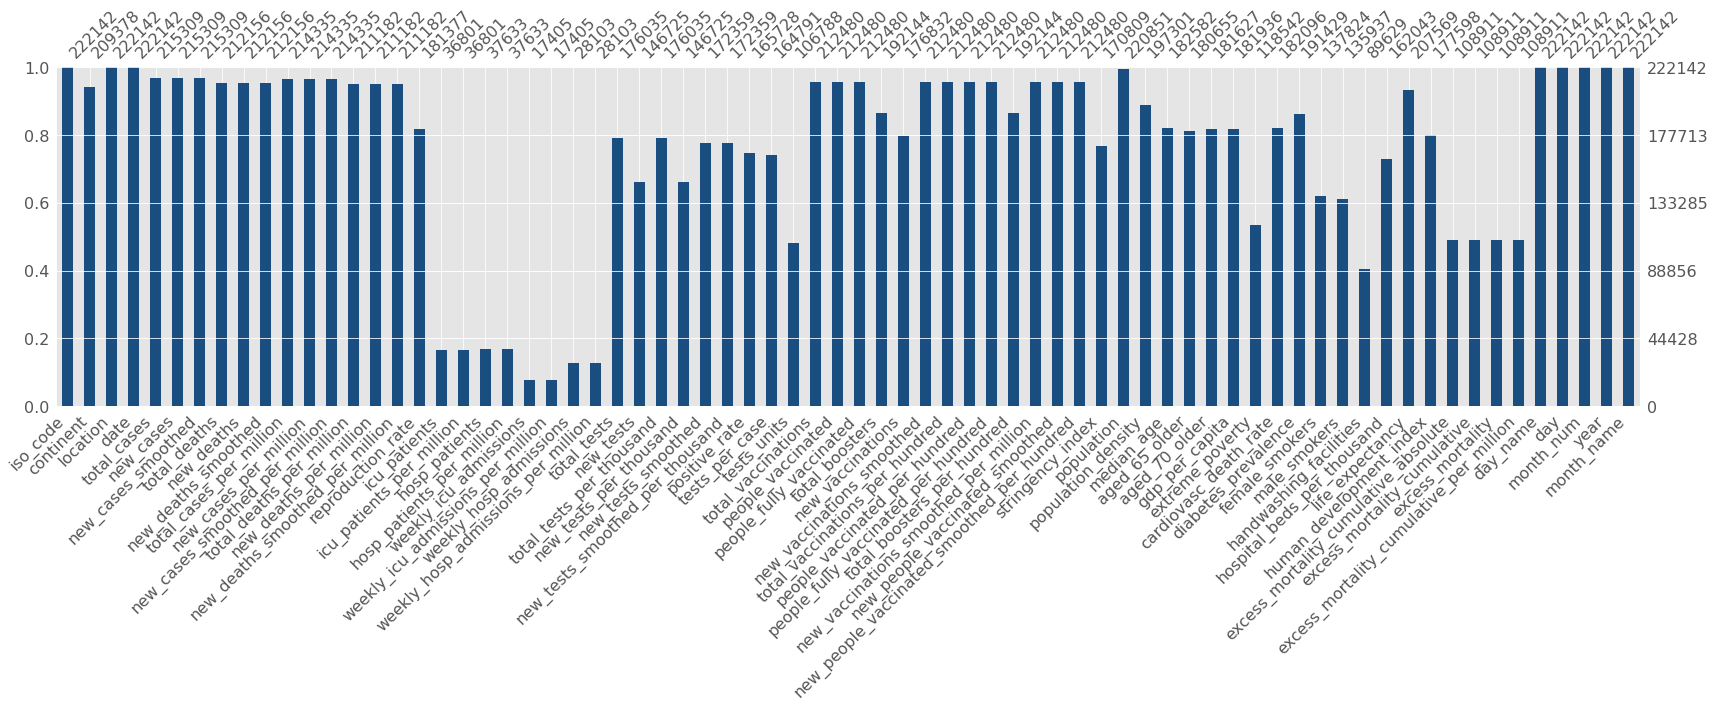

In [40]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5))

<AxesSubplot:>

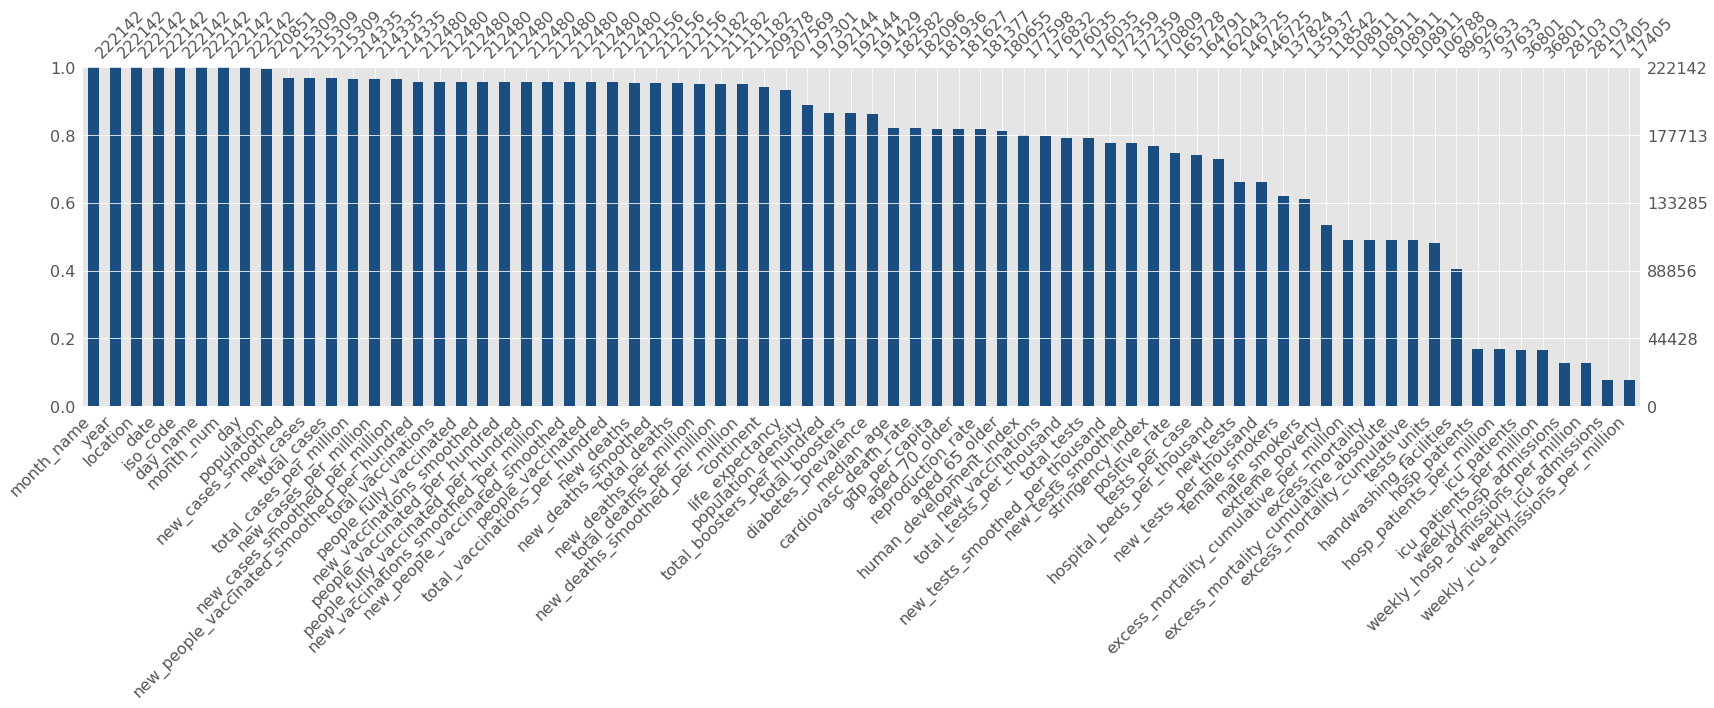

In [41]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5), sort='descending')

In [42]:
df_filled.drop(columns=['day', 'month_num', 'year']).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.15309e+05  2.15309e+05         2.15309e+05   2.12156e+05   
mean   4.26803e+06  1.23094e+04         1.23348e+04   6.77189e+04   
std    2.68503e+07  8.52904e+04         8.32242e+04   3.60848e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.85500e+03  0.00000e+00         6.14300e+00   8.50000e+01   
50%    4.57830e+04  5.40000e+01         9.38570e+01   8.62000e+02   
75%    5.02439e+05  9.63000e+02         1.13143e+03   8.52900e+03   
max    6.20931e+08  4.08174e+06         3.43627e+06   6.55609e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  212156.00000         212156.00000             214335.00000   
mean      129.42455            129.95270              58076.91217   
std       705.01473            690.33147             103419.44497   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.04299               1006.92100   
50%         1.00000              1.28600               9863.64100   
75%        12.00000             13.85700              69976.14650   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           214335.00000                    214335.00000   
mean               192.89995                       193.13371   
std               1052.11071                       668.00597   
min                  0.00000                         0.00000   
25%                  0.00000                         1.39100   
50%                  8.15500                        20.10400   
75%                100.78650                       140.08300   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              211182.00000            211182.00000   
mean                  659.33374                 1.43901   
std                   939.56334                 4.92994   
min                     0.00000                 0.00000   
25%                    31.35800                 0.00000   
50%                   206.17100                 0.08800   
75%                   975.53244                 1.16900   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     211182.00000       181377.00000   36801.00000   
mean                           1.43161            0.93961     790.71888   
std                            3.24142            0.37411    2318.36785   
min                            0.00000           -0.08000       0.00000   
25%                            0.00700            0.76000      30.00000   
50%                            0.24555            0.96000     141.42894   
75%                            1.48700            1.13000     651.43956   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               36801.00000    37633.00000                37633.00000   
mean                   20.28186     4262.10499                  151.20471   
std                    24.11128    10409.16152                  178.13937   
min                     0.00000        0.00000                    0.00000   
25%                     4.79298      206.00000                   40.99000   
50%                    11.38000      921.00000                   85.44100   
75%                    30.51400     3533.00000                  198.64000   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            17405.00000                        17405.00000   
mean               274.14375                           11.99601   
std                454.53162                           11.80732   
min             

# Compute Pairwise Correlation

In [43]:
cor_mat = df_filled.drop(columns=['day', 'month_num', 'year']).corr()
cor_mat 

total_cases  new_cases  \
total_cases                                     1.00000    0.70203   
new_cases                                       0.70203    1.00000   
new_cases_smoothed                              0.72439    0.97244   
total_deaths                                    0.93620    0.72087   
new_deaths                                      0.46901    0.64539   
new_deaths_smoothed                             0.48356    0.63171   
total_cases_per_million                         0.09743    0.05662   
new_cases_per_million                           0.01383    0.06138   
new_cases_smoothed_per_million                  0.02234    0.07996   
total_deaths_per_million                        0.12060    0.07823   
new_deaths_per_million                         -0.00090    0.02972   
new_deaths_smoothed_per_million                -0.00033    0.03669   
reproduction_rate                               0.01258    0.03206   
icu_patients                                    0.43111    0.53332   
icu_patients_per_million                        0.02079    0.13592   
hosp_patients                                   0.52270    0.63143   
hosp_patients_per_million                       0.00491    0.10529   
weekly_icu_admissions                           0.28506    0.38177   
weekly_icu_admissions_per_million              -0.06521    0.08437   
weekly_hosp_admissions                          0.53670    0.62980   
weekly_hosp_admissions_per_million              0.08149    0.27910   
total_tests                                     0.17309    0.09741   
new_tests                                       0.56325    0.52179   
total_tests_per_thousand                        0.04888    0.04381   
new_tests_per_thousand                         -0.01071    0.03356   
new_tests_smoothed                              0.07702    0.07266   
new_tests_smoothed_per_thousand                 0.00912    0.05511   
positive_rate                                   0.03996    0.14626   
tests_per_case                                 -0.01410   -0.01073   
total_vaccinations                              0.73064    0.54707   
people_vaccinated                               0.70901    0.54317   
people_fully_vaccinated                         0.71148    0.53879   
total_boosters                                  0.70470    0.46935   
new_vaccinations                                0.44937    0.48430   
new_vaccinations_smoothed                       0.46204    0.48908   
total_vaccinations_per_hundred                  0.15577    0.10894   
people_vaccinated_per_hundred                   0.13781    0.09335   
people_fully_vaccinated_per_hundred             0.13244    0.09135   
total_boosters_per_hundred                      0.04502    0.01888   
new_vaccinations_smoothed_per_million          -0.01522    0.01155   
new_people_vaccinated_smoothed                  0.37321    0.38801   
new_people_vaccinated_smoothed_per_hundred     -0.03445   -0.02236   
stringency_index                               -0.08082    0.01363   
population                                      0.61225    0.54399   
population_density                             -0.01628   -0.01476   
median_age                                      0.03835    0.04438   
aged_65_older                                   0.03801    0.04562   
aged_70_older                                   0.03629    0.04505   
gdp_per_capita                                  0.01646    0.02049   
extreme_poverty                                -0.03623   -0.03521   
cardiovasc_death_rate                          -0.04144   -0.04529   
diabetes_prevalence                             0.00160   -0.00183   
female_smokers                                  0.00076    0.00524   
male_smokers                                   -0.00333    0.00090   
handwashing_facilities                          0.03222    0.03029   
hospital_beds_per_thousand                      0.00288    0.01653   
life_expectancy                                 0.0196

In [44]:
cor_mat['total_deaths'].sort_values(ascending=False)

total_deaths                                  1.00000
total_cases                                   0.93620
excess_mortality_cumulative_absolute          0.76464
total_vaccinations                            0.74721
people_vaccinated                             0.74258
new_cases_smoothed                            0.74049
people_fully_vaccinated                       0.72874
new_cases                                     0.72087
population                                    0.70773
weekly_hosp_admissions                        0.67043
new_deaths_smoothed                           0.64989
total_boosters                                0.64394
hosp_patients                                 0.63190
new_deaths                                    0.63097
new_vaccinations_smoothed                     0.61018
new_vaccinations                              0.59670
icu_patients                                  0.58998
new_tests                                     0.55535
new_people_vaccinated_smooth

<AxesSubplot:>

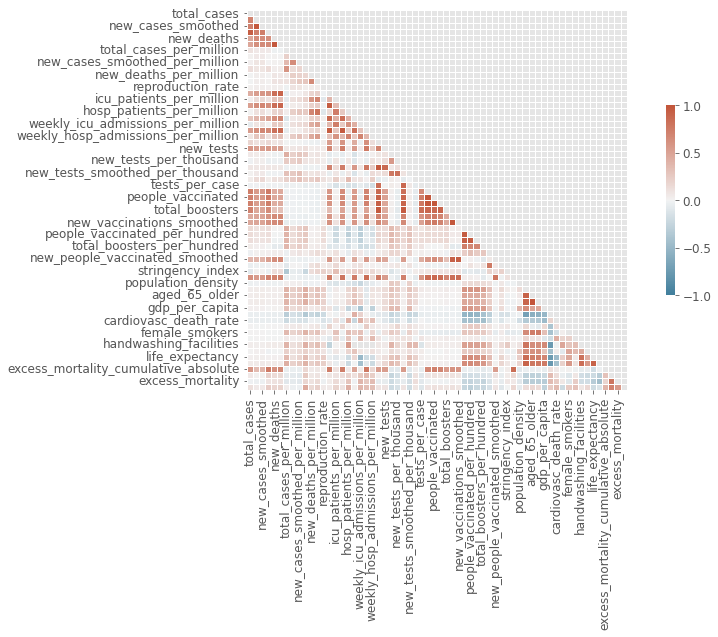

In [45]:
mask = np.triu(np.ones_like(cor_mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor_mat, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

# Check Duplication

In [46]:
df_filled.duplicated().sum()

0

# Exploratory Data Analysis

Create helper functions to visualize datasets

In [47]:
from matplotlib.ticker import FuncFormatter

# helper functions to format y-axis
def billion(x, pos):
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# barplot helper function
def plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create a figure and axis
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot bar chart 
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, ci=ci, color=color, 
        hue_order=hue_order, order=order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_bar


# line chart helper function
def plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create a figure and axis 
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, size=size, markers=markers, style=style, ci=ci,
        hue_order=hue_order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line


# helper function to get specific date range
def get_data(data, before=None, after=None, rule=None):
    return data.set_index('date').sort_index(ascending=True, axis='index').truncate(before, after).resample(rule)

# helper function to plot line chart
def plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, 
        hue=hue, hue_order=hue_order, palette=palette,
        ax=ax
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_date_rng

# Cases Exploration

In [48]:
cases_cols = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million',\
              'new_cases_per_million', 'new_cases_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_cases = df_filled[cases_cols] 
df_cases.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_cases_per_million  new_cases_per_million  \
0           210.17954                    0.125                  0.125   
1           210.17954                    0.125                  0.000   
2           210.17954                    0.125                  0.000   
3           210.17954                    0.125                  0.000   
4           210.17954                    0.125                  0.000   

   new_cases_smoothed_per_million  year  month_num month_name  day   day_name  
0                         5.24146  2020          2        Feb   24     Monday  
1                         5.24146  2020          2        Feb   25    Tuesday  
2                         5.24146  2020          2        Feb   26  Wednesday  
3                         5.24146  2020          2        Feb   27   Thursday  
4                         5.24146  2020          2        Feb   28     Friday

In [49]:
df_cases.drop(columns=['year', 'month_num', 'day', 'day_name']).describe()

total_cases    new_cases  new_cases_smoothed  total_cases_per_million  \
count  2.15309e+05  2.15309e+05         2.15309e+05             214335.00000   
mean   4.26803e+06  1.23094e+04         1.23348e+04              58076.91217   
std    2.68503e+07  8.52904e+04         8.32242e+04             103419.44497   
min    1.00000e+00  0.00000e+00         0.00000e+00                  0.00100   
25%    3.85500e+03  0.00000e+00         6.14300e+00               1006.92100   
50%    4.57830e+04  5.40000e+01         9.38570e+01               9863.64100   
75%    5.02439e+05  9.63000e+02         1.13143e+03              69976.14650   
max    6.20931e+08  4.08174e+06         3.43627e+06             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  
count           214335.00000                    214335.00000  
mean               192.89995                       193.13371  
std               1052.11071                       668.00597  
min                  0.00000                         0.00000  
25%                  0.00000                         1.39100  
50%                  8.15500                        20.10400  
75%                100.78650                       140.08300  
max             195005.31300                     36401.60700

In [50]:
df_cases.isna().sum()                                   # check missing values

iso_code                              0
continent                         12764
location                              0
date                                  0
total_cases                        6833
new_cases                          6833
new_cases_smoothed                 6833
total_cases_per_million            7807
new_cases_per_million              7807
new_cases_smoothed_per_million     7807
year                                  0
month_num                             0
month_name                            0
day                                   0
day_name                              0
dtype: int64

<AxesSubplot:>

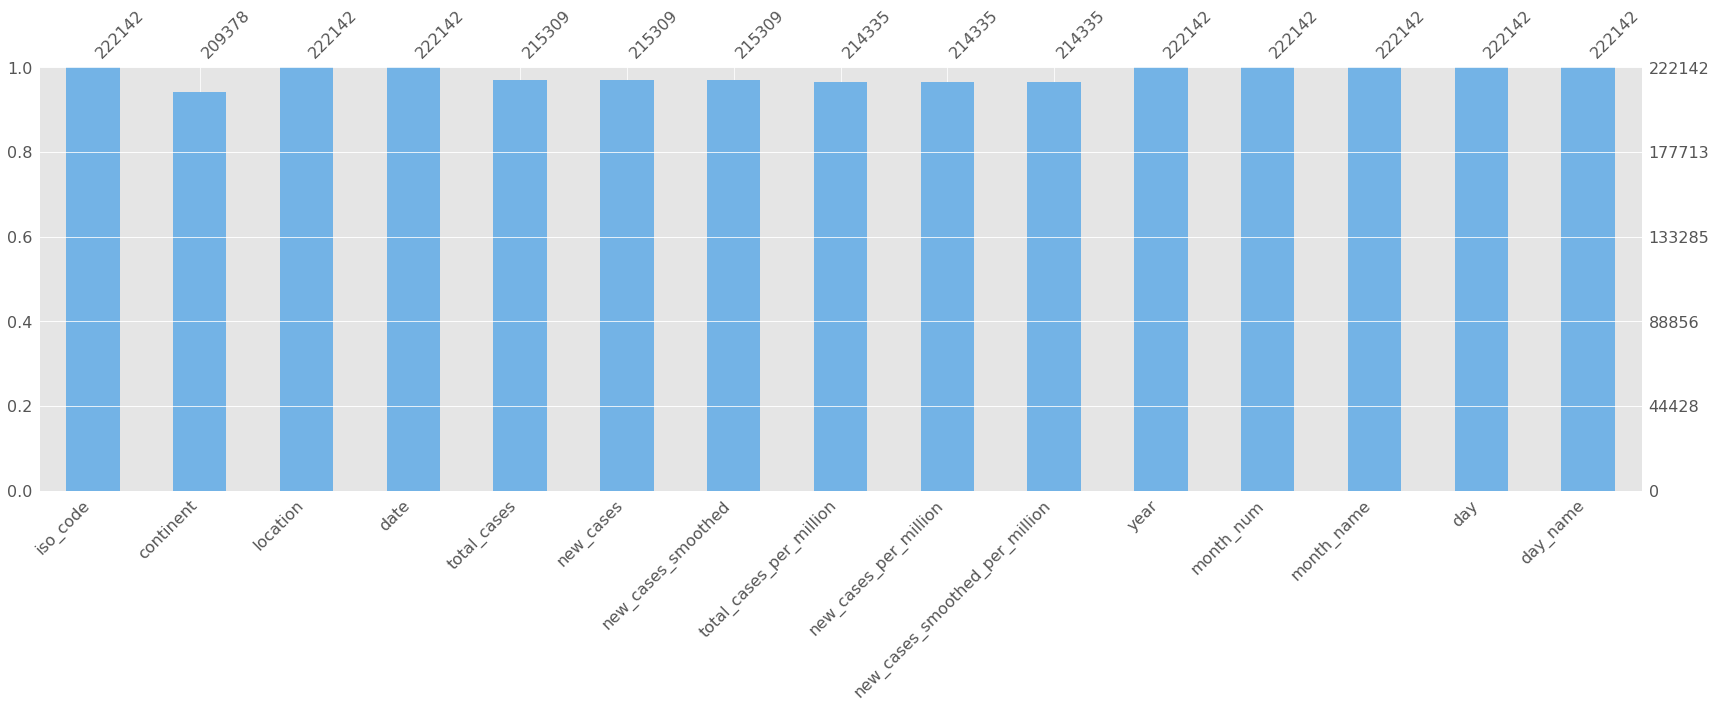

In [51]:
msno.bar(df_cases, labels=True, color=(0.45, 0.70, 0.90))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

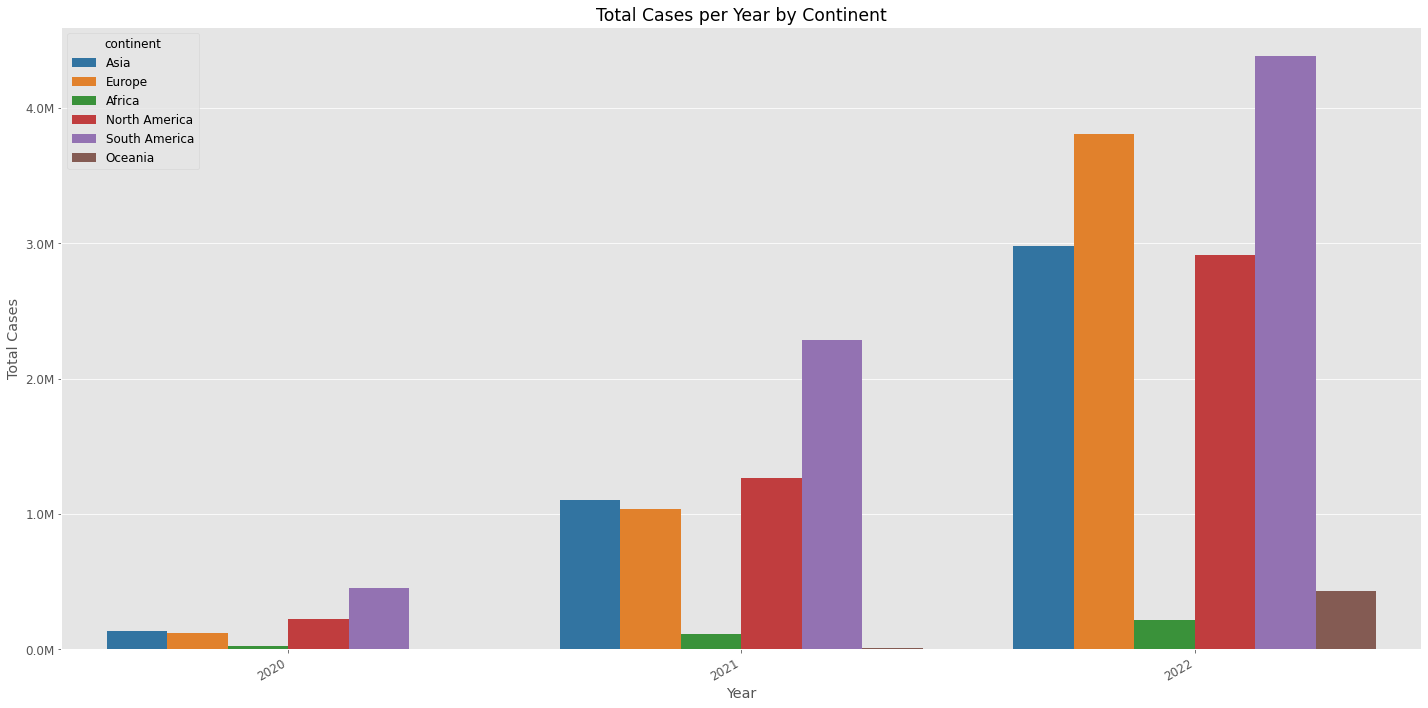

In [52]:
plot_bar(
    data=df_cases,
    x='year', y='total_cases', hue='continent', palette='tab10',
    title='Total Cases per Year by Continent', xlabel='Year', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

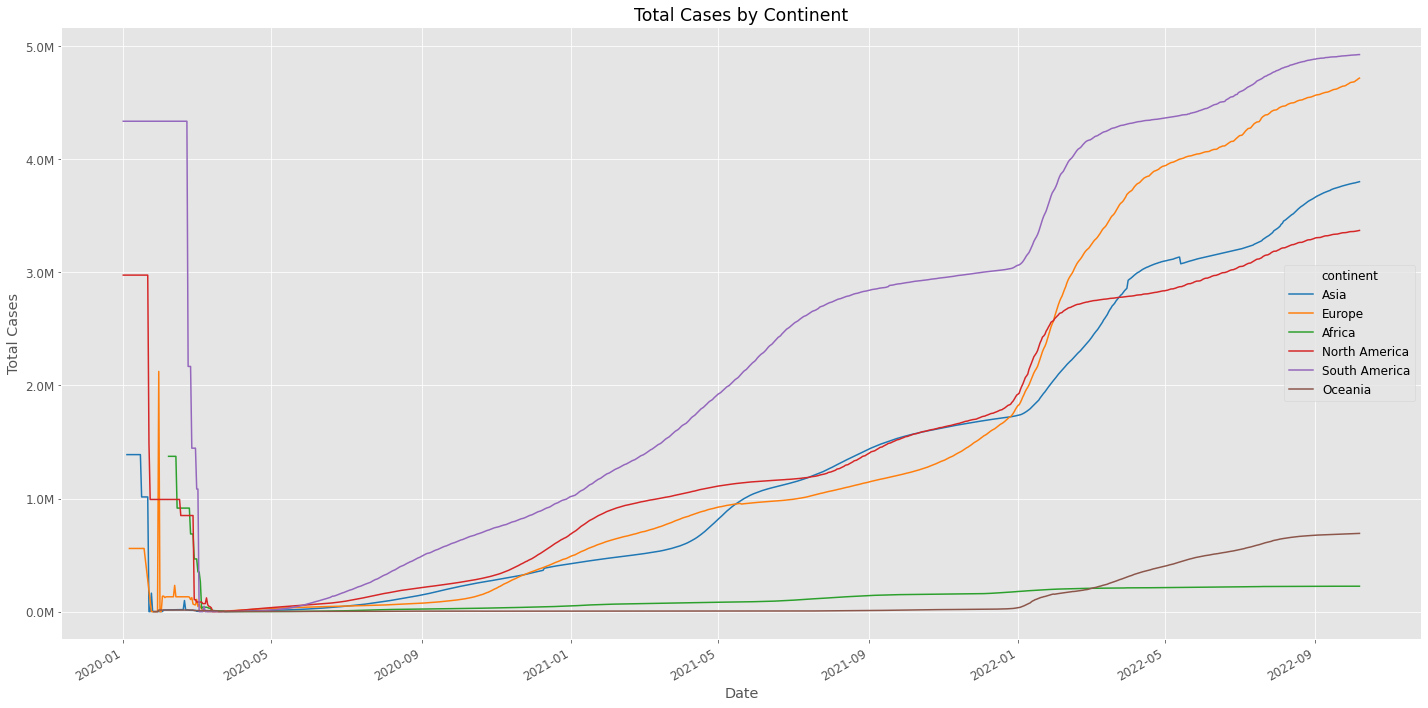

In [53]:
plot_line(
    data=df_cases,
    x='date', y='total_cases', hue='continent', palette='tab10', 
    title='Total Cases by Continent', xlabel='Date', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

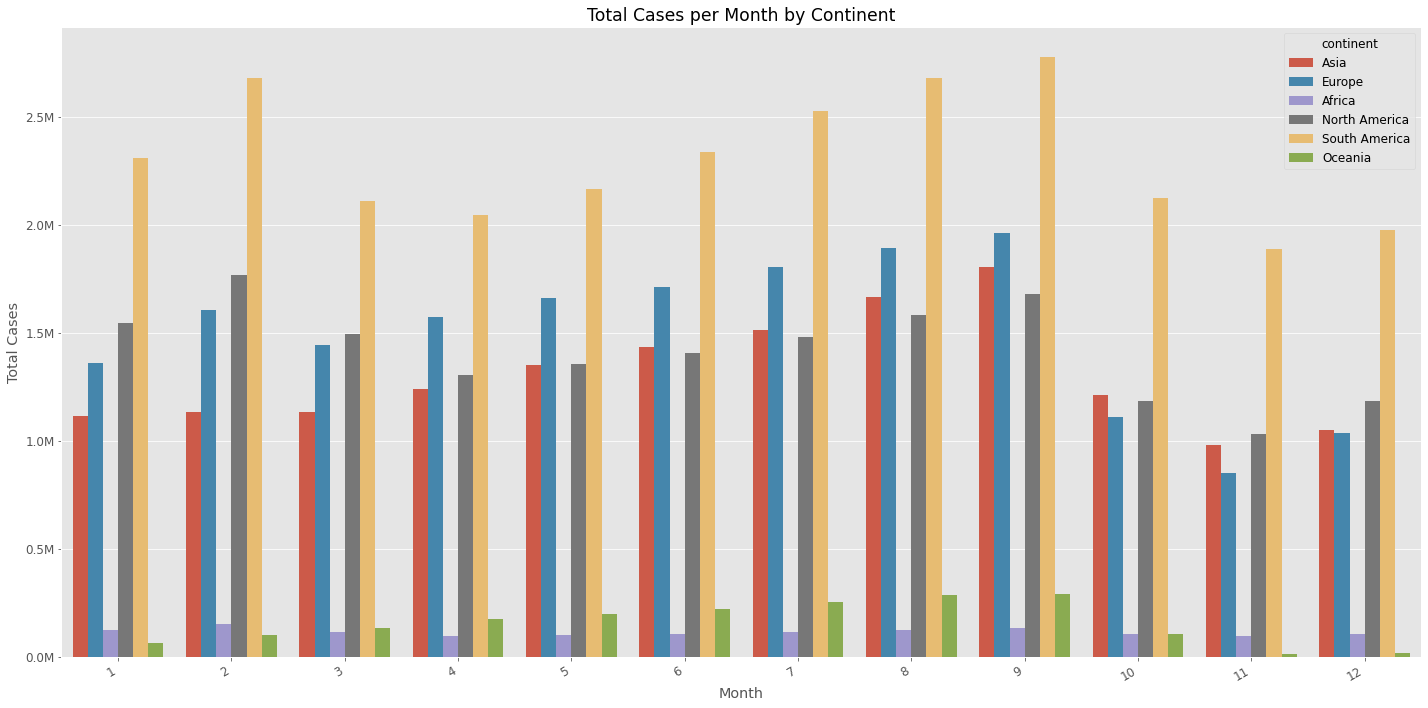

In [54]:
plot_bar(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

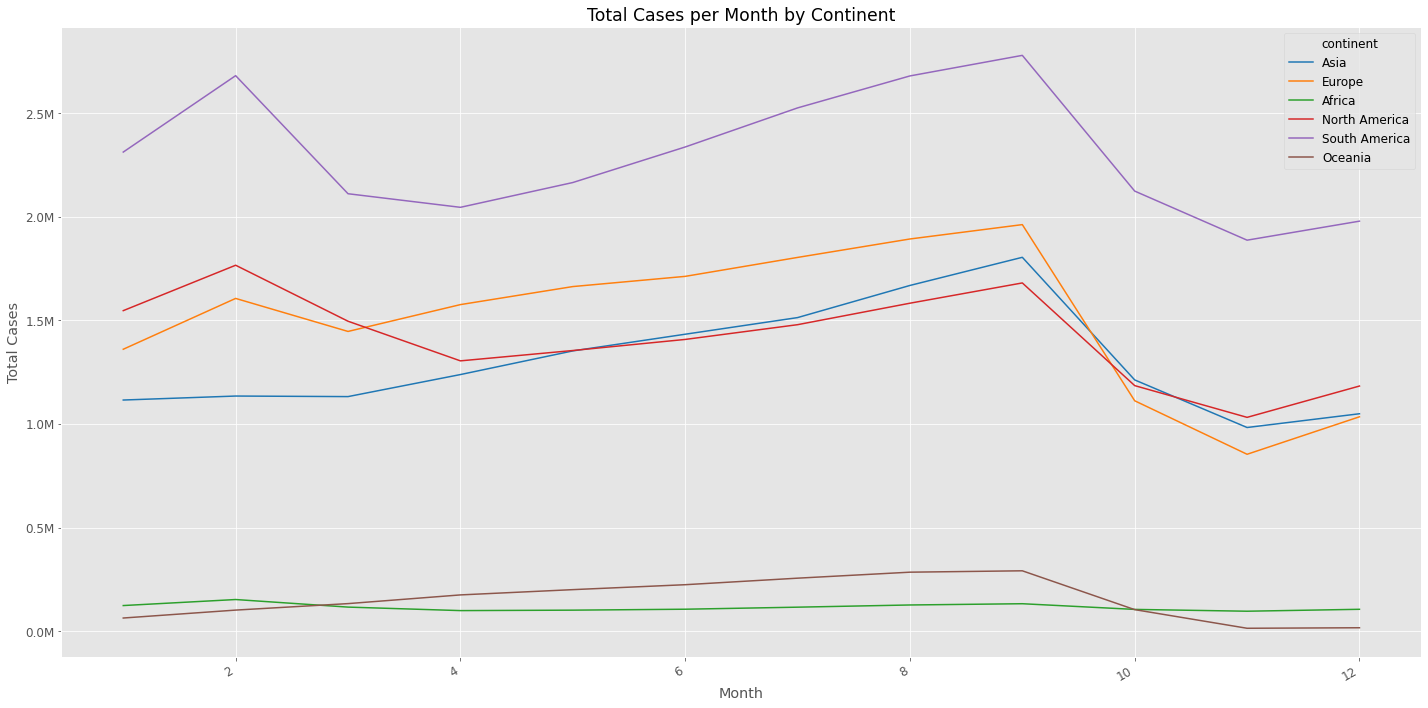

In [55]:
plot_line(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', palette='tab10', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases',
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

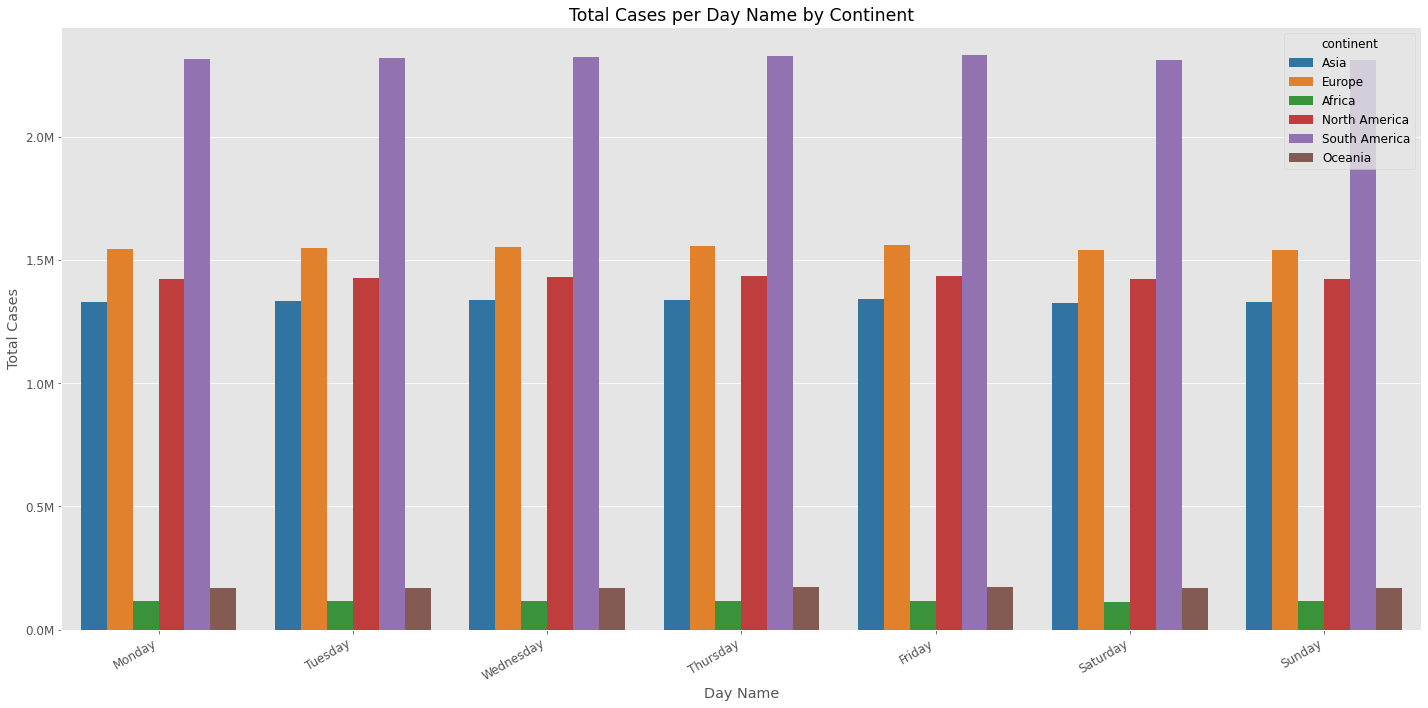

In [56]:
plot_bar(
    data=df_cases,
    x='day_name', y='total_cases', hue='continent', palette='tab10',
    title='Total Cases per Day Name by Continent', xlabel='Day Name', ylabel='Total Cases', 
    formatter=format_mill
)

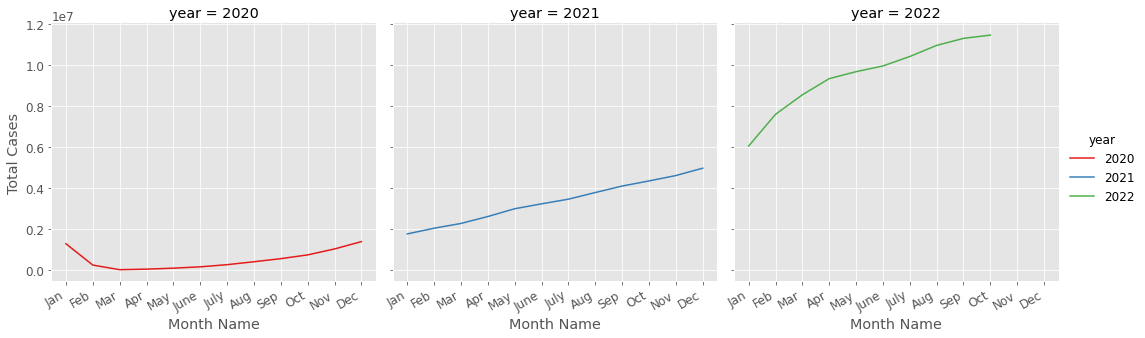

In [57]:
g = sns.relplot(
  data=df_cases,
  x='month_name', y='total_cases', ci=None,
  col='year', hue='year', palette='Set1',
  kind='line'
)

g.set(xlabel='Month Name', ylabel='Total Cases')
g.fig.autofmt_xdate()
ax.yaxis.set_major_formatter(format_mill)

# Deaths Exploration

In [58]:
deaths_cols = ['iso_code', 'continent', 'location', 'date', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 
               'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_deaths = df_filled[deaths_cols]
df_deaths.head()

iso_code continent     location       date  total_deaths  new_deaths  \
0      AFG      Asia  Afghanistan 2020-02-24    4542.62971     8.40043   
1      AFG      Asia  Afghanistan 2020-02-25    4542.62971     8.40043   
2      AFG      Asia  Afghanistan 2020-02-26    4542.62971     8.40043   
3      AFG      Asia  Afghanistan 2020-02-27    4542.62971     8.40043   
4      AFG      Asia  Afghanistan 2020-02-28    4542.62971     8.40043   

   new_deaths_smoothed  total_deaths_per_million  new_deaths_per_million  \
0              8.44341                 113.28407                 0.20955   
1              8.44341                 113.28407                 0.20955   
2              8.44341                 113.28407                 0.20955   
3              8.44341                 113.28407                 0.20955   
4              8.44341                 113.28407                 0.20955   

   new_deaths_smoothed_per_million  year  month_num month_name  day   day_name  
0                          0.21061  2020          2        Feb   24     Monday  
1                          0.21061  2020          2        Feb   25    Tuesday  
2                          0.21061  2020          2        Feb   26  Wednesday  
3                          0.21061  2020          2        Feb   27   Thursday  
4                          0.21061  2020          2        Feb   28     Friday

In [59]:
df_deaths[['total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']].describe()

total_deaths    new_deaths  new_deaths_smoothed  \
count   2.12156e+05  212156.00000         212156.00000   
mean    6.77189e+04     129.42455            129.95270   
std     3.60848e+05     705.01473            690.33147   
min     1.00000e+00       0.00000              0.00000   
25%     8.50000e+01       0.00000              0.04299   
50%     8.62000e+02       1.00000              1.28600   
75%     8.52900e+03      12.00000             13.85700   
max     6.55609e+06   17737.00000          14858.14300   

       total_deaths_per_million  new_deaths_per_million  \
count              211182.00000            211182.00000   
mean                  659.33374                 1.43901   
std                   939.56334                 4.92994   
min                     0.00000                 0.00000   
25%                    31.35800                 0.00000   
50%                   206.17100                 0.08800   
75%                   975.53244                 1.16900   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  
count                     211182.00000  
mean                           1.43161  
std                            3.24142  
min                            0.00000  
25%                            0.00700  
50%                            0.24555  
75%                            1.48700  
max                          148.67300

In [60]:
df_deaths.isna().sum()                                   # check missing values

iso_code                               0
continent                          12764
location                               0
date                                   0
total_deaths                        9986
new_deaths                          9986
new_deaths_smoothed                 9986
total_deaths_per_million           10960
new_deaths_per_million             10960
new_deaths_smoothed_per_million    10960
year                                   0
month_num                              0
month_name                             0
day                                    0
day_name                               0
dtype: int64

<AxesSubplot:>

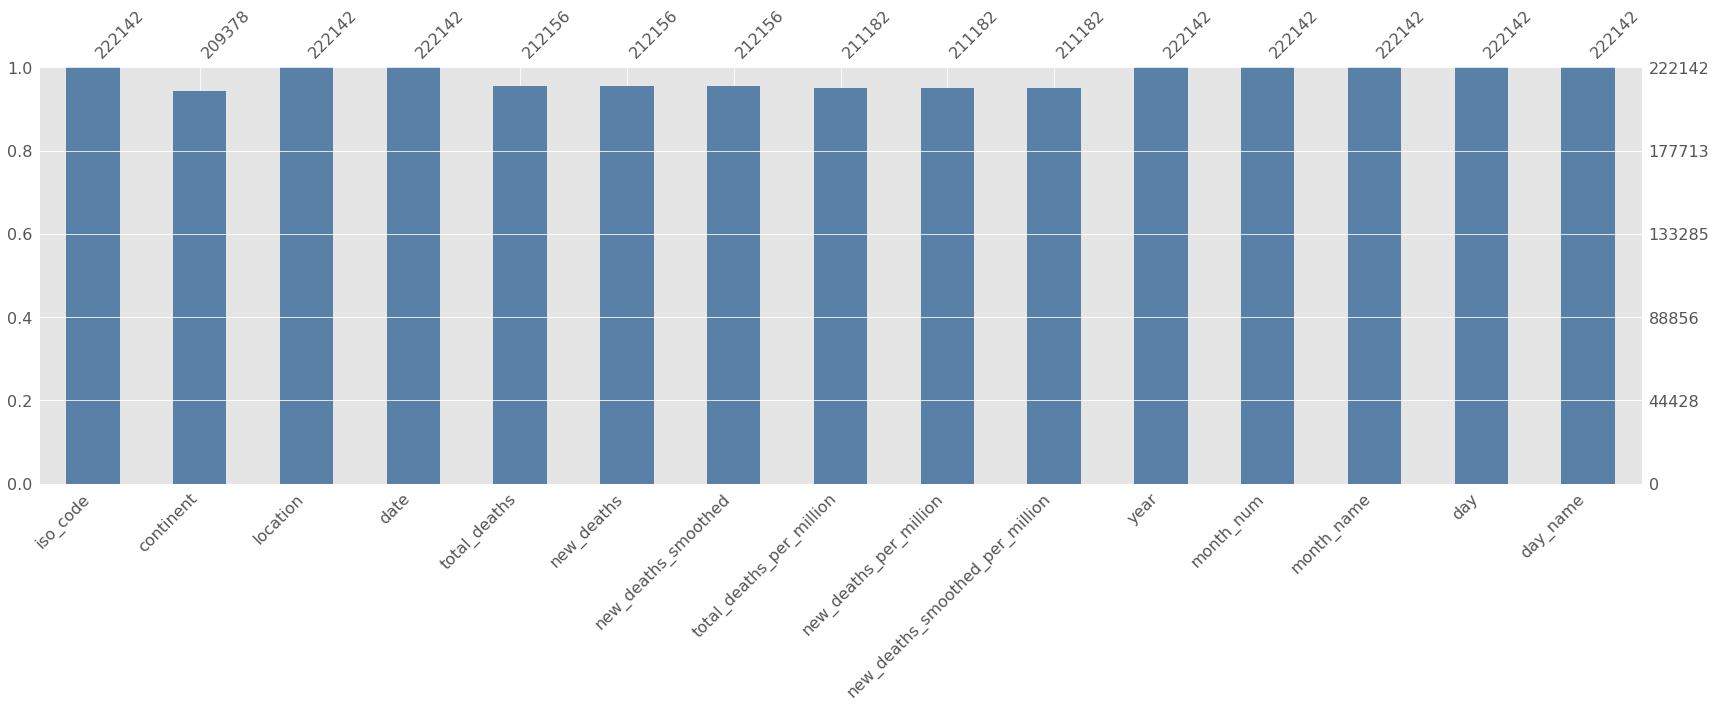

In [61]:
msno.bar(df_deaths, labels=True, color=(0.35, 0.50, 0.65))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

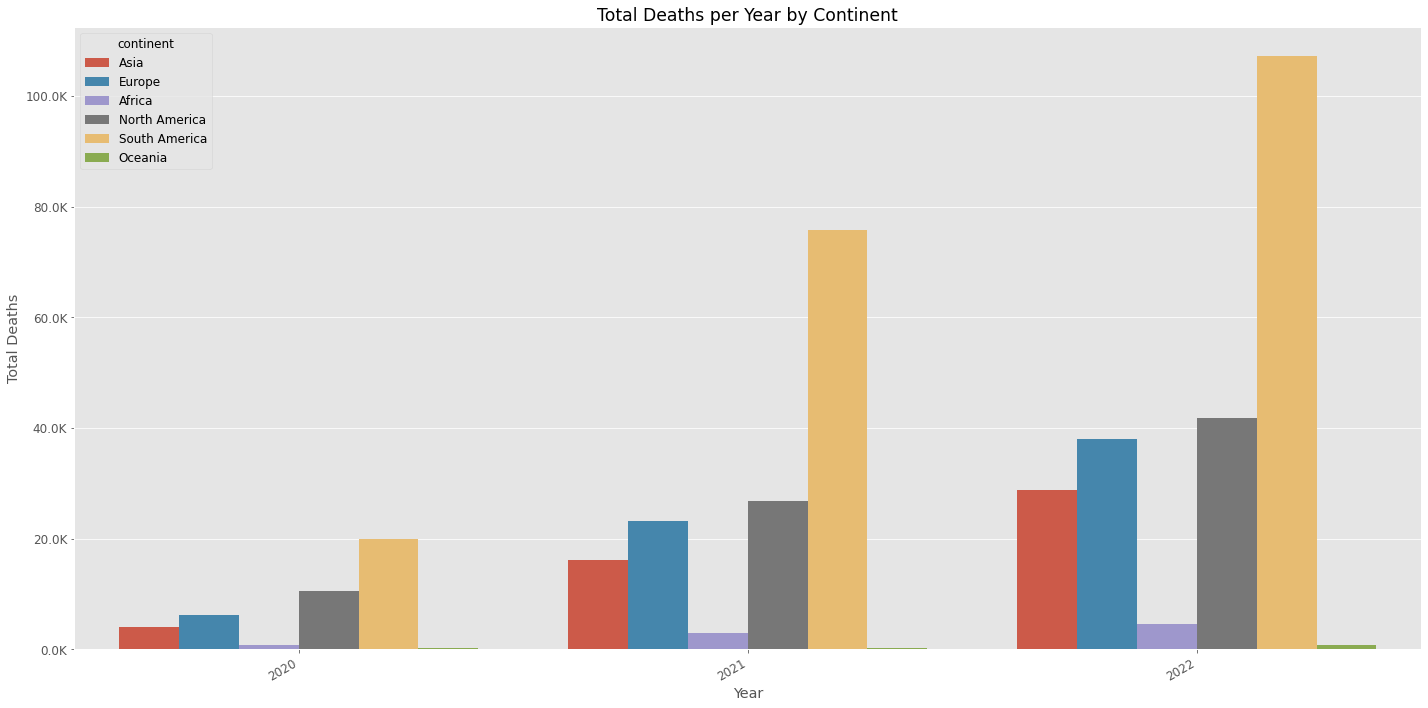

In [62]:
plot_bar(
    data=df_deaths,
    x='year', y='total_deaths', hue='continent', 
    title='Total Deaths per Year by Continent', xlabel='Year', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

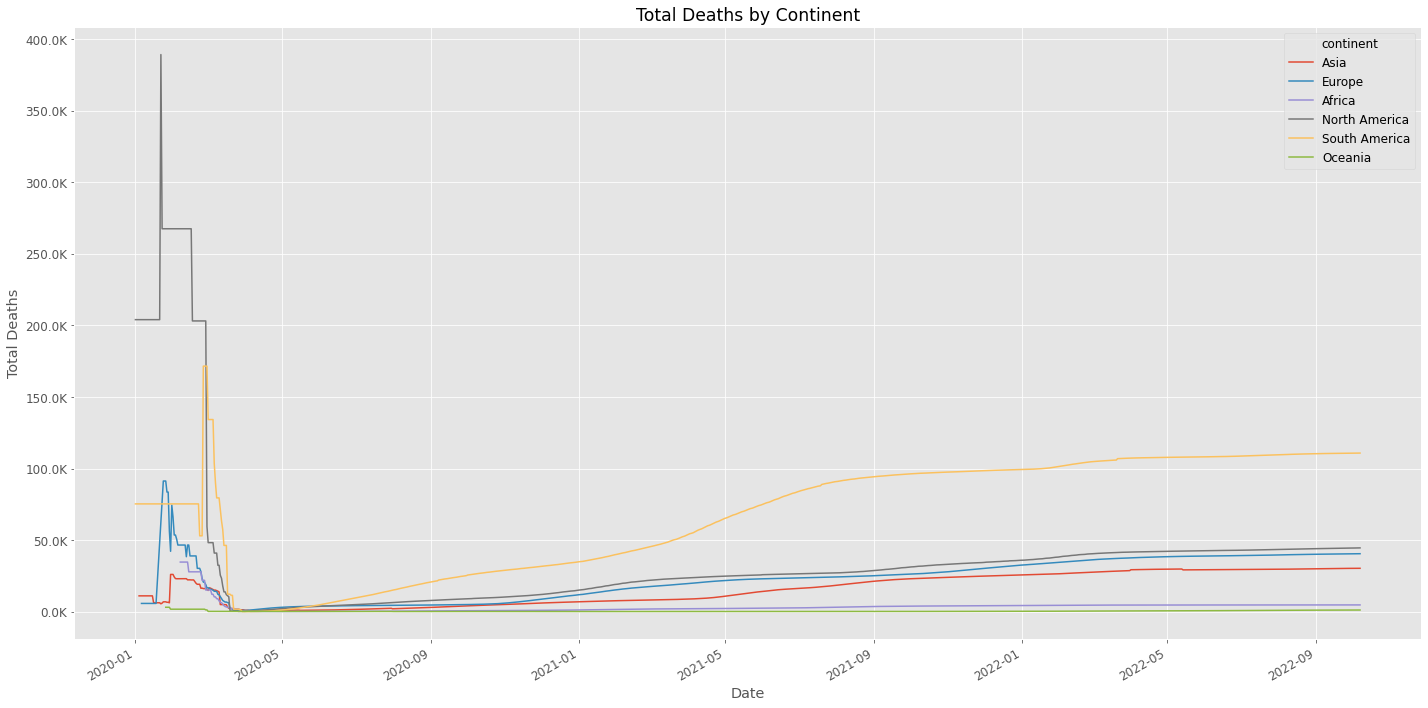

In [63]:
plot_line(
    data=df_deaths,
    x='date', y='total_deaths', hue='continent', 
    title='Total Deaths by Continent', xlabel='Date', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

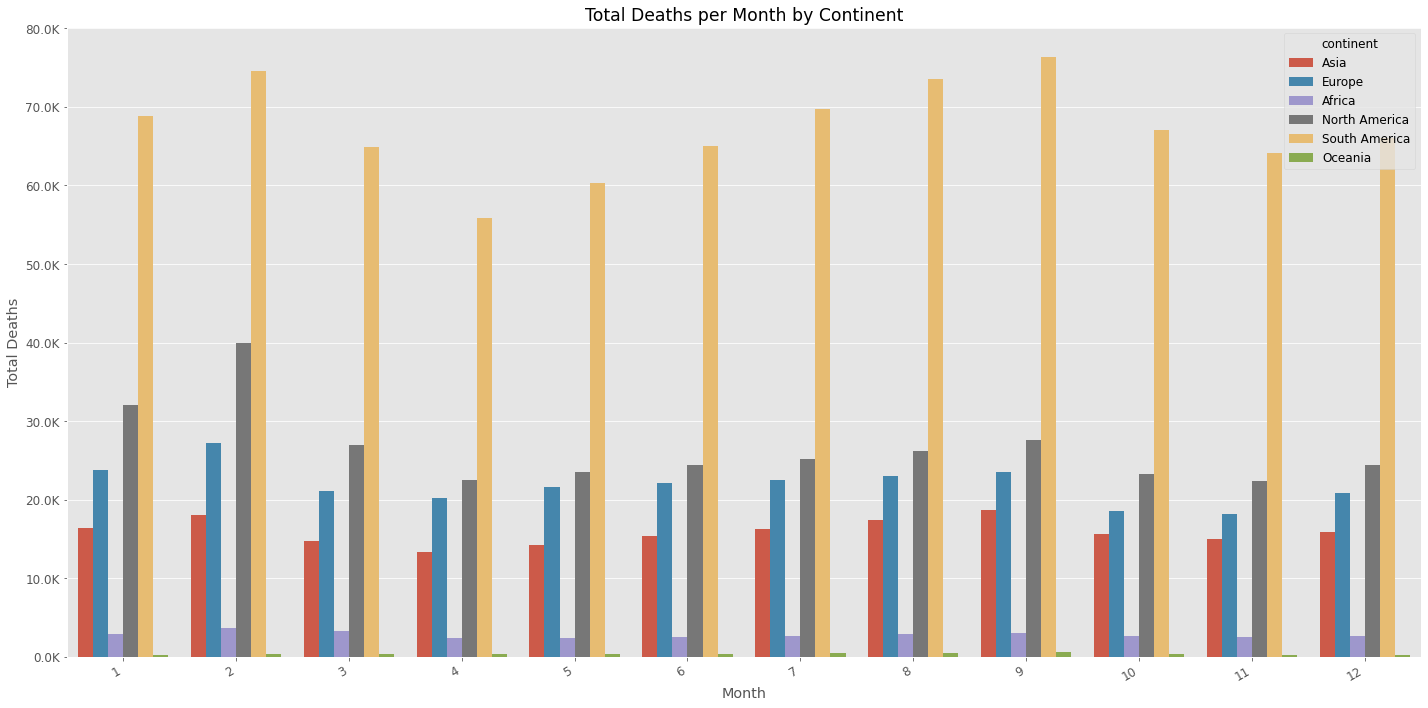

In [64]:
plot_bar(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

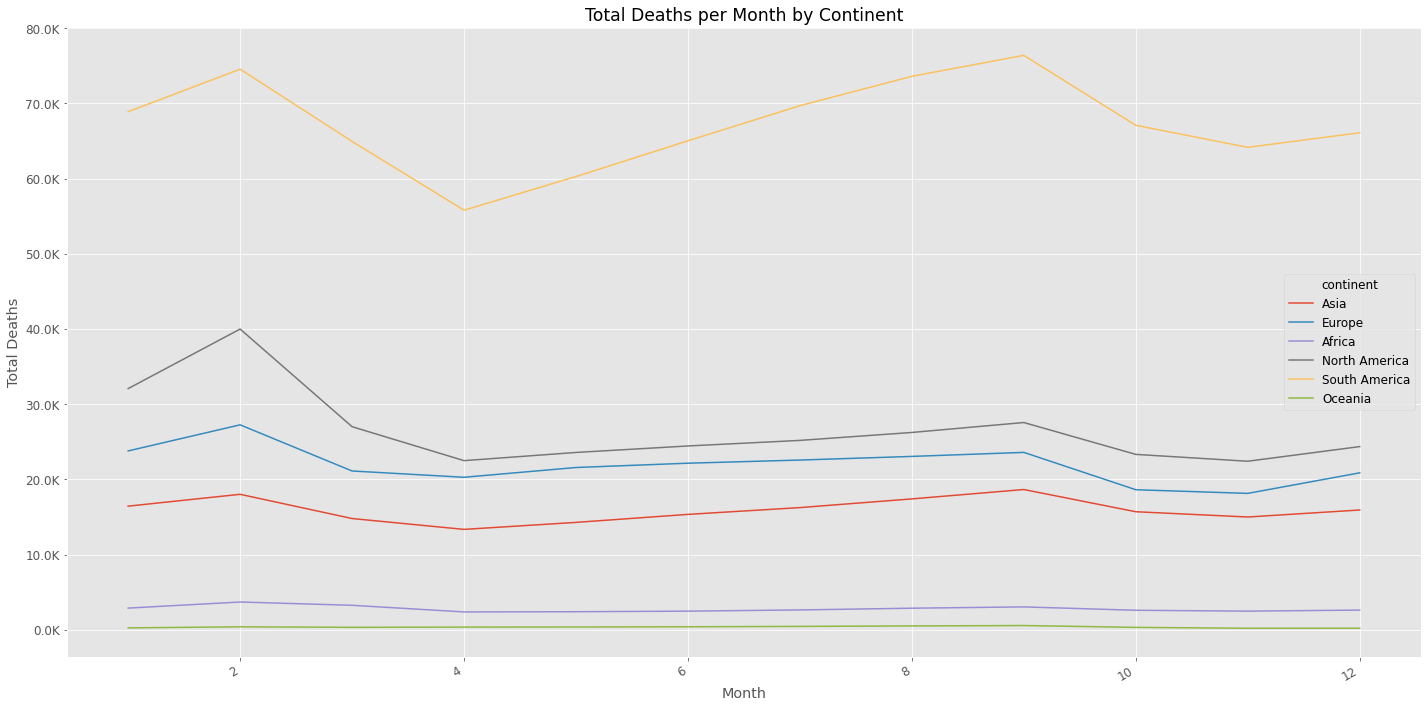

In [65]:
plot_line(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

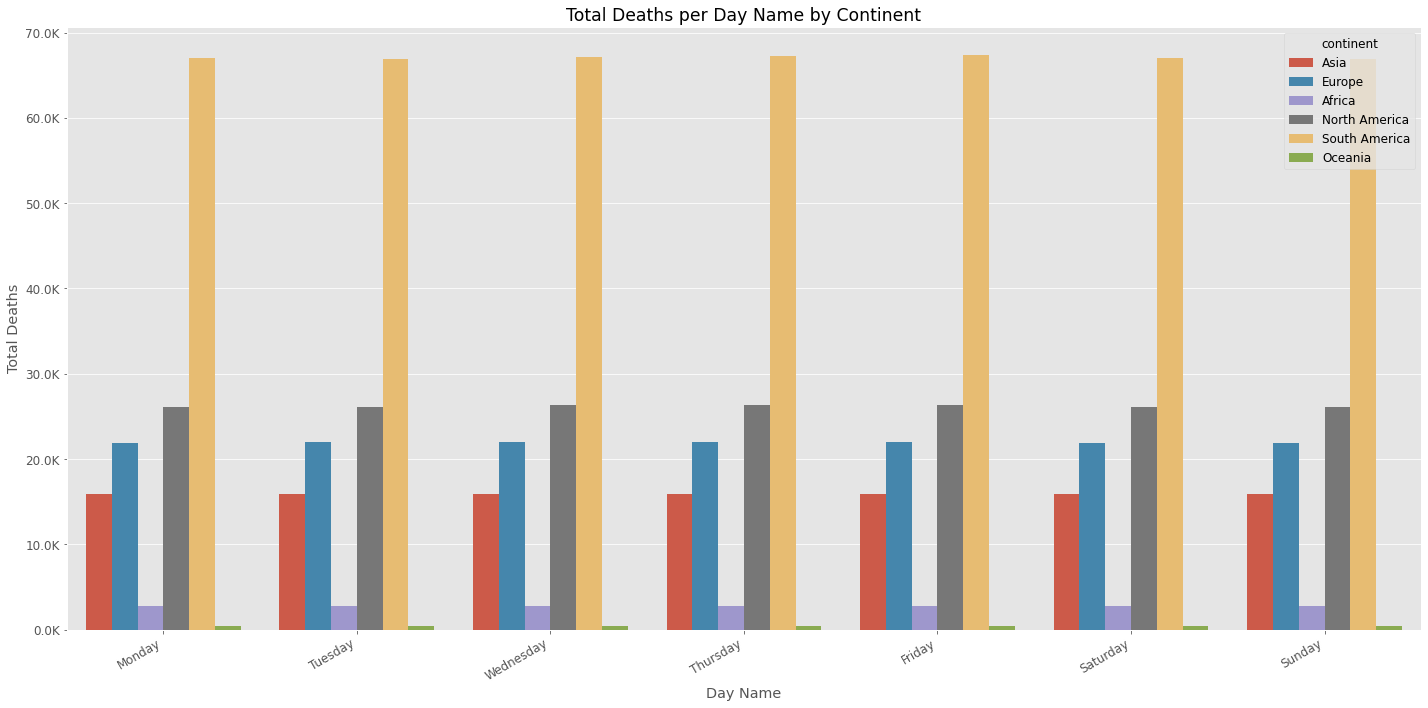

In [66]:
plot_bar(
    data=df_deaths,
    x='day_name', y='total_deaths', hue='continent', 
    title='Total Deaths per Day Name by Continent', xlabel='Day Name', ylabel='Total Deaths', 
    formatter=format_tsd
)

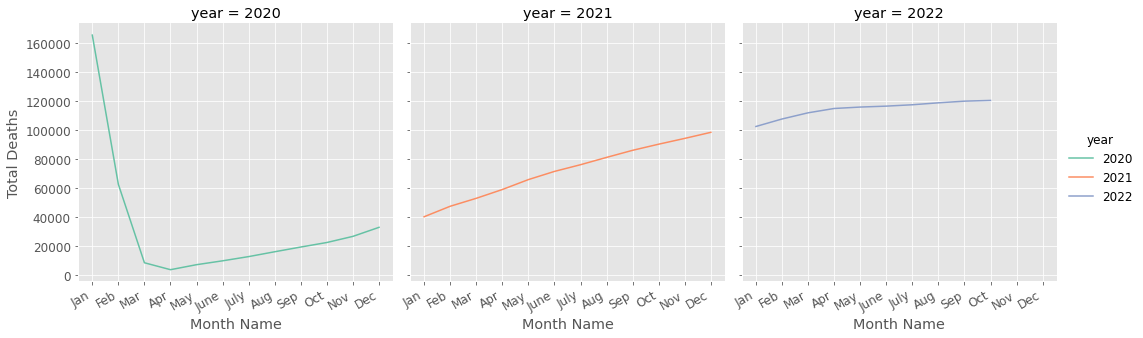

In [67]:
g1 = sns.relplot(
  data=df_deaths,
  x='month_name', y='total_deaths', ci=None, 
  col='year', hue='year', palette='Set2',
  kind='line'
)

g1.set(xlabel='Month Name', ylabel='Total Deaths')
g1.fig.autofmt_xdate()

# Tests Exploration

In [68]:
test_cols = ['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
             'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'year', 'month_num', 
             'month_name', 'day', 'day_name']

df_test = df_filled[test_cols]
df_test.head()

iso_code continent     location       date  new_tests  total_tests  \
0      AFG      Asia  Afghanistan 2020-02-24        NaN     924645.2   
1      AFG      Asia  Afghanistan 2020-02-25        NaN     924645.2   
2      AFG      Asia  Afghanistan 2020-02-26        NaN     924645.2   
3      AFG      Asia  Afghanistan 2020-02-27        NaN     924645.2   
4      AFG      Asia  Afghanistan 2020-02-28        NaN     924645.2   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.0588                     NaN           983.55396   
1                   23.0588                     NaN           983.55396   
2                   23.0588                     NaN           983.55396   
3                   23.0588                     NaN           983.55396   
4                   23.0588                     NaN           983.55396   

   new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  \
0                          0.02468        0.13004         19.5295         NaN   
1                          0.02468        0.13004         19.5295         NaN   
2                          0.02468        0.13004         19.5295         NaN   
3                          0.02468        0.13004         19.5295         NaN   
4                          0.02468        0.13004         19.5295         NaN   

   year  month_num month_name  day   day_name  
0  2020          2        Feb   24     Monday  
1  2020          2        Feb   25    Tuesday  
2  2020          2        Feb   26  Wednesday  
3  2020          2        Feb   27   Thursday  
4  2020          2        Feb   28     Friday

In [69]:
df_test[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
         'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units']].describe()

new_tests  total_tests  total_tests_per_thousand  \
count  1.46725e+05  1.76035e+05              176035.00000   
mean   4.74575e+04  3.06705e+07                 851.17028   
std    1.90406e+05  2.42223e+08                2175.90349   
min    1.00000e+00  0.00000e+00                   0.00000   
25%    1.01711e+03  2.00178e+05                  36.73350   
50%    4.90300e+03  9.26764e+05                 186.36700   
75%    2.34140e+04  5.47959e+06                 740.39750   
max    3.58556e+07  9.21400e+09               32925.82600   

       new_tests_per_thousand  new_tests_smoothed  \
count            146725.00000         1.72359e+05   
mean                  3.63295         1.22569e+05   
std                   9.08123         1.08009e+06   
min                   0.00000         0.00000e+00   
25%                   0.27900         6.39000e+02   
50%                   0.95800         3.50060e+03   
75%                   3.03329         2.22005e+04   
max                 531.06200         1.47700e+07   

       new_tests_smoothed_per_thousand  positive_rate  tests_per_case  
count                     172359.00000   165728.00000     1.64791e+05  
mean                           2.92283        0.09442     2.17347e+03  
std                            7.12584        0.10284     2.94561e+04  
min                            0.00000        0.00000     1.00000e+00  
25%                            0.15839        0.01964     1.05723e+01  
50%                            0.78800        0.06570     2.82000e+01  
75%                            2.65750        0.12900     8.33000e+01  
max                          147.60300        1.00000     1.02363e+06

In [70]:
df_test.isna().sum()                                   # check missing values

iso_code                                0
continent                           12764
location                                0
date                                    0
new_tests                           75417
total_tests                         46107
total_tests_per_thousand            46107
new_tests_per_thousand              75417
new_tests_smoothed                  49783
new_tests_smoothed_per_thousand     49783
positive_rate                       56414
tests_per_case                      57351
tests_units                        115354
year                                    0
month_num                               0
month_name                              0
day                                     0
day_name                                0
dtype: int64

<AxesSubplot:>

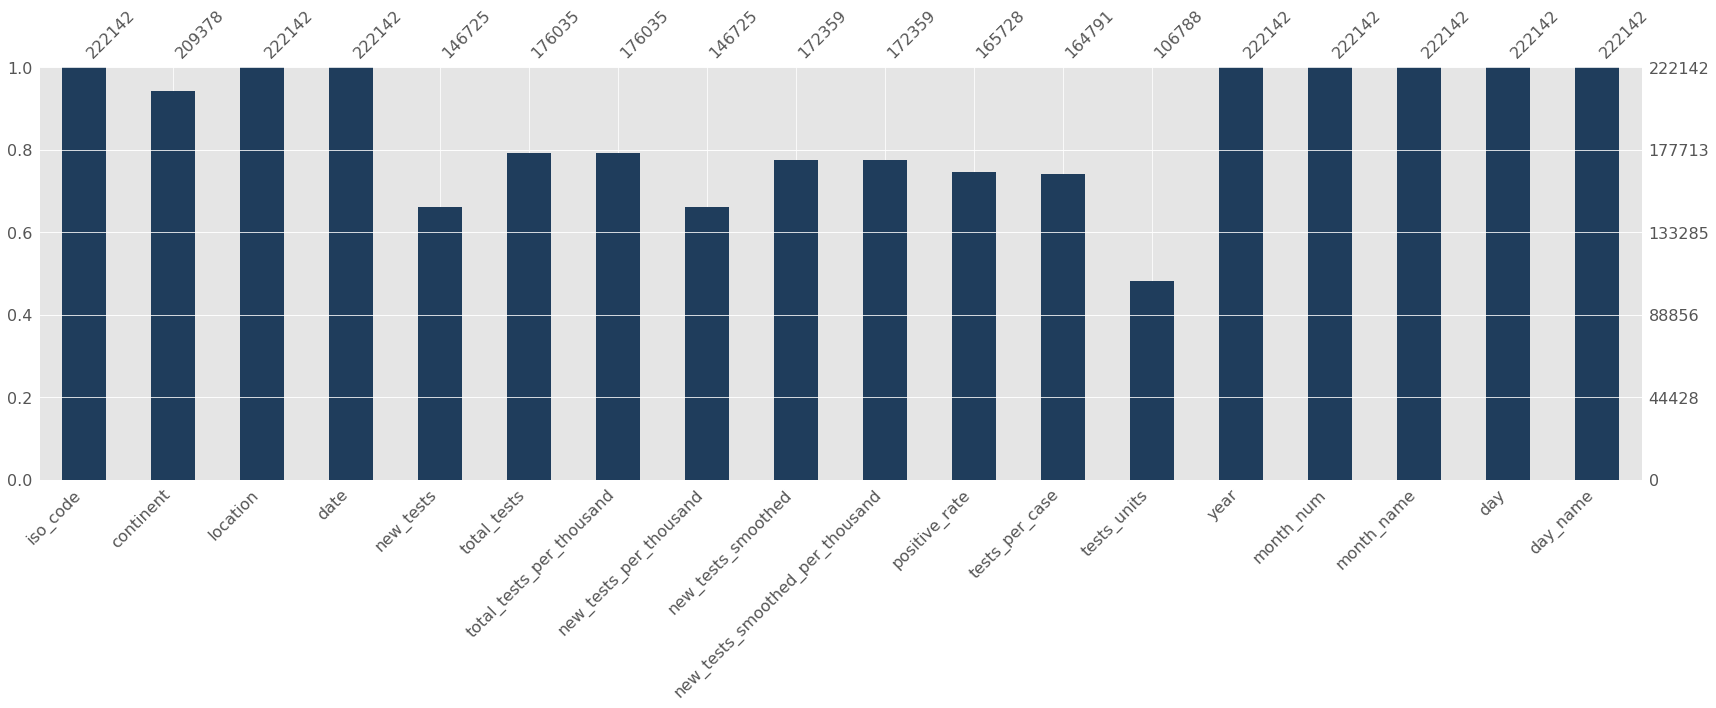

In [71]:
msno.bar(df_test, labels=True, color=(0.12, 0.24, 0.36))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

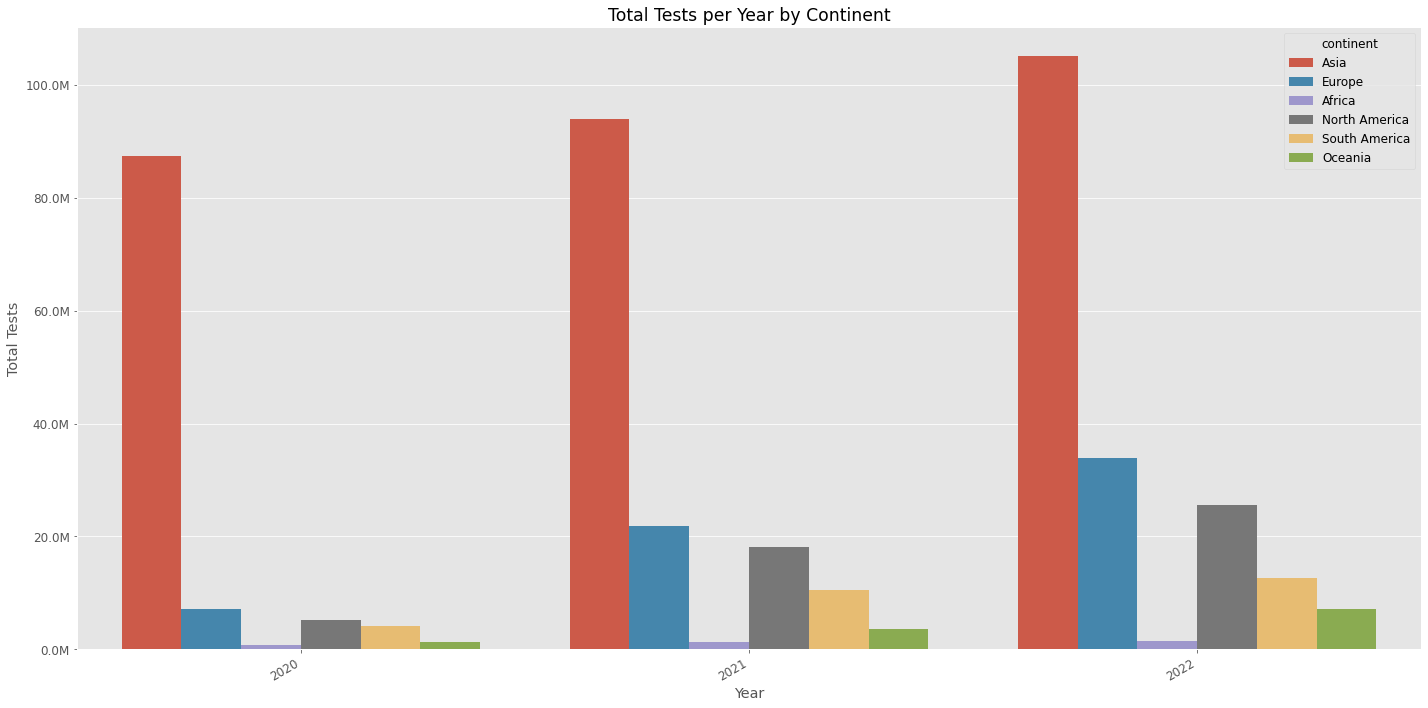

In [72]:
plot_bar(
    data=df_test,
    x='year', y='total_tests', hue='continent', 
    title='Total Tests per Year by Continent', xlabel='Year', ylabel='Total Tests', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

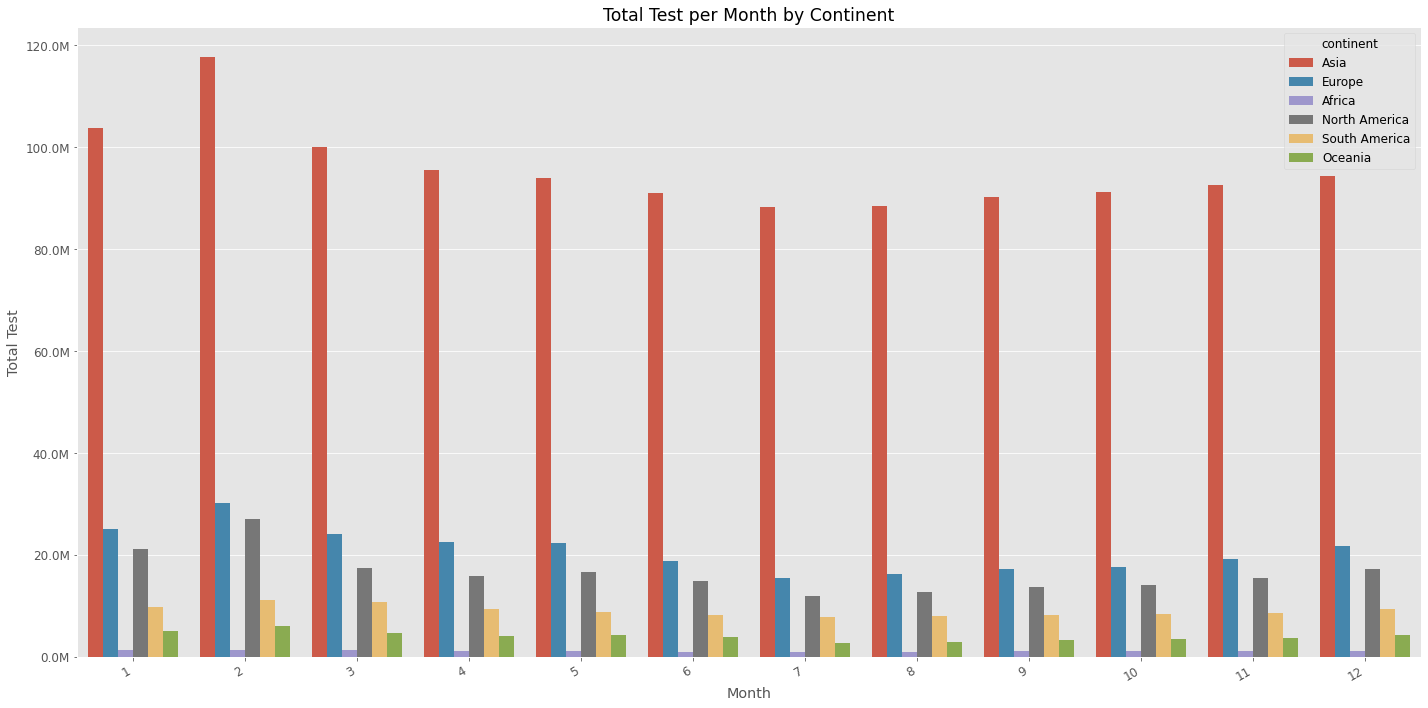

In [73]:
plot_bar(
    data=df_test,
    x='month_num', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

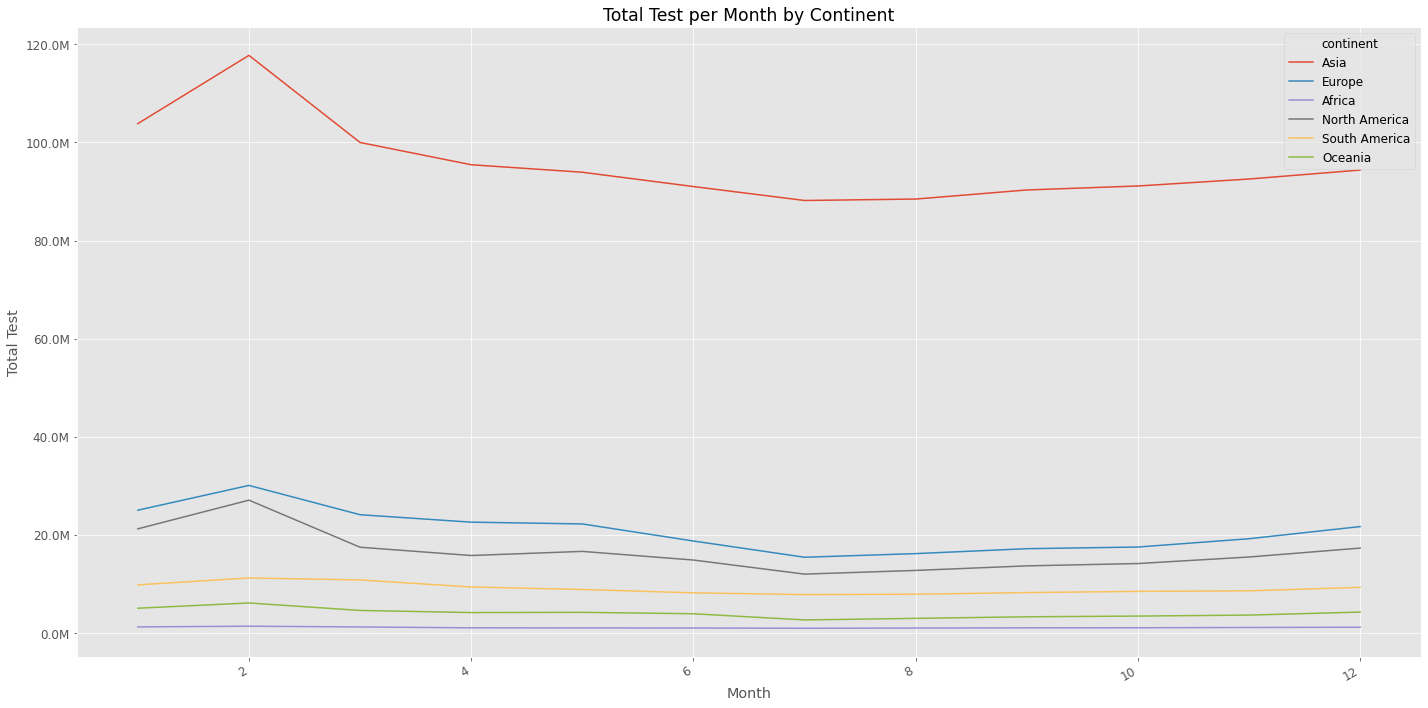

In [74]:
plot_line(
    data=df_test,
    x='month_num', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

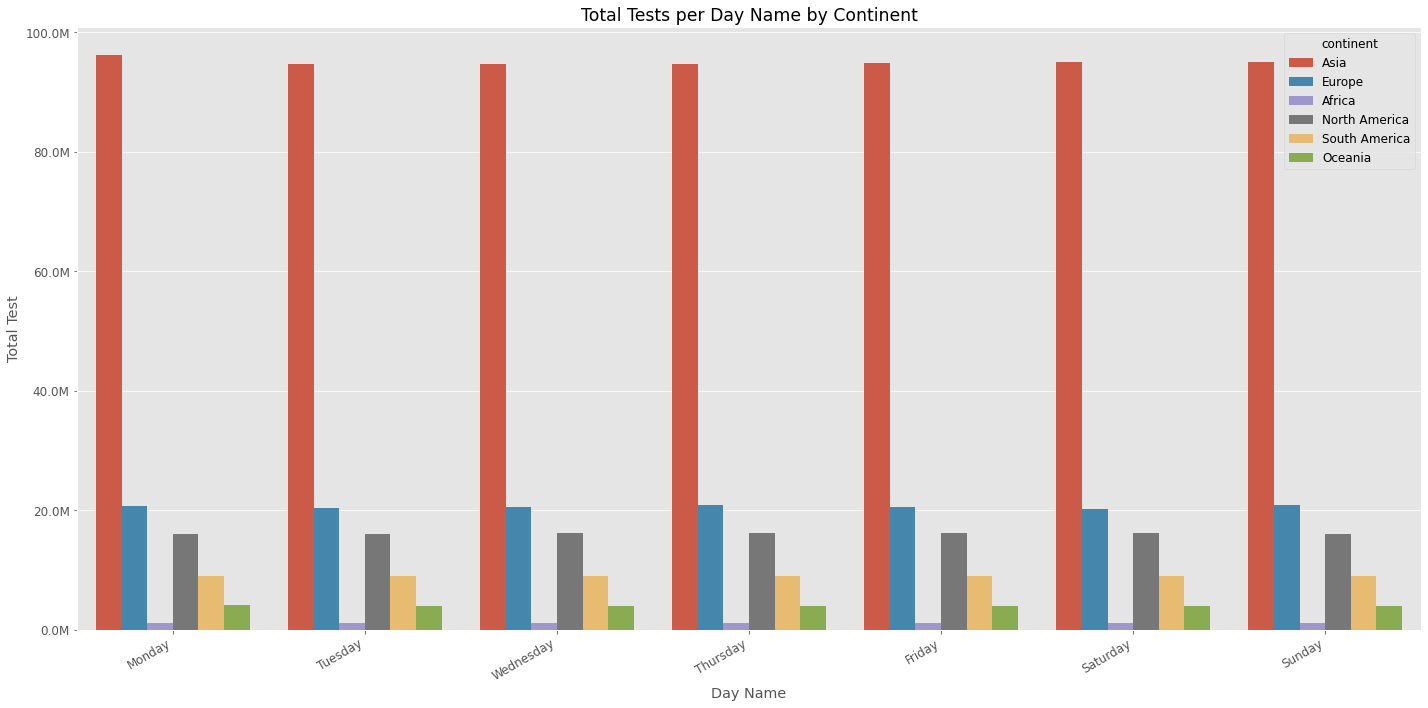

In [75]:
plot_bar(
    data=df_test,
    x='day_name', y='total_tests', hue='continent', 
    title='Total Tests per Day Name by Continent', xlabel='Day Name', ylabel='Total Test', 
    formatter=format_mill
)

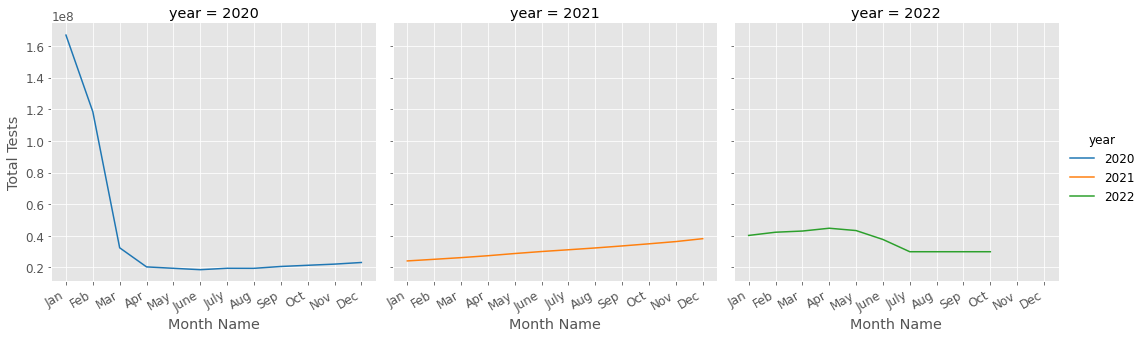

In [76]:
g2 = sns.relplot(
  data=df_test,
  x='month_name', y='total_tests', ci=None,
  col='year', hue='year', palette='tab10',
  kind='line'
)

g2.set(xlabel='Month Name', ylabel='Total Tests')
g2.fig.autofmt_xdate()

# Vaccinations Exploration

In [77]:
vacc_cols = ['iso_code', 'continent', 'location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
             'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
             'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
             'year', 'month_num', 'month_name', 'day', 'day_name']

df_vacc = df_filled[vacc_cols]
df_vacc.head()

iso_code continent     location       date  total_vaccinations  \
0      AFG      Asia  Afghanistan 2020-02-24         4.80752e+06   
1      AFG      Asia  Afghanistan 2020-02-25         4.80752e+06   
2      AFG      Asia  Afghanistan 2020-02-26         4.80752e+06   
3      AFG      Asia  Afghanistan 2020-02-27         4.80752e+06   
4      AFG      Asia  Afghanistan 2020-02-28         4.80752e+06   

   people_vaccinated  people_fully_vaccinated  total_boosters  \
0        4.39843e+06              4.24770e+06             NaN   
1        4.39843e+06              4.24770e+06             NaN   
2        4.39843e+06              4.24770e+06             NaN   
3        4.39843e+06              4.24770e+06             NaN   
4        4.39843e+06              4.24770e+06             NaN   

   new_vaccinations  new_vaccinations_smoothed  \
0            4714.4                 20214.6944   
1            4714.4                 20214.6944   
2            4714.4                 20214.6944   
3            4714.4                 20214.6944   
4            4714.4                 20214.6944   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                        11.98908                       10.96875   
1                        11.98908                       10.96875   
2                        11.98908                       10.96875   
3                        11.98908                       10.96875   
4                        11.98908                       10.96875   

   people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                             10.59292                         NaN   
1                             10.59292                         NaN   
2                             10.59292                         NaN   
3                             10.59292                         NaN   
4                             10.59292                         NaN   

   new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
0                              504.17487                     18590.26486   
1                              504.17487                     18590.26486   
2                              504.17487                     18590.26486   
3                              504.17487                     18590.26486   
4                              504.17487                     18590.26486   

   new_people_vaccinated_smoothed_per_hundred  year  month_num month_name  \
0                                     0.04641  2020          2        Feb   
1                                     0.04641  2020          2        Feb   
2                                     0.04641  2020          2        Feb   
3                                     0.04641  2020          2        Feb   
4                                     0.04641  2020          2        Feb   

   day   day_name  
0   24     Monday  
1   25    Tuesday  
2   26  Wednesday  
3   27   Thursday  
4   28     Friday

In [78]:
df_vacc[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
         'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
         'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']].describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count         2.12480e+05        2.12480e+05              2.12480e+05   
mean          1.31135e+08        6.33438e+07              5.40640e+07   
std           7.40333e+08        3.44491e+08              2.99997e+08   
min           0.00000e+00        0.00000e+00              1.00000e+00   
25%           3.65793e+05        2.19717e+05              1.81499e+05   
50%           2.46555e+06        1.44890e+06              1.22201e+06   
75%           1.46285e+07        7.73370e+06              6.76752e+06   
max           1.27929e+10        5.39218e+09              4.96441e+09   

       total_boosters  new_vaccinations  new_vaccinations_smoothed  \
count     1.92144e+05       1.76832e+05                2.12480e+05   
mean      2.17895e+07       4.59465e+05                3.71603e+05   
std       1.19437e+08       2.33499e+06                2.10538e+06   
min       1.00000e+00       0.00000e+00                0.00000e+00   
25%       3.97721e+04       3.02850e+03                9.35000e+02   
50%       4.75442e+05       1.51907e+04                7.90950e+03   
75%       4.30679e+06       8.86289e+04                5.27557e+04   
max       2.55410e+09       4.96754e+07                4.36900e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    212480.00000                   212480.00000   
mean                         78.58777                       38.77014   
std                          60.83299                       25.22064   
min                           0.00000                        0.00000   
25%                          24.63671                       16.28644   
50%                          72.39799                       39.40807   
75%                         117.01575                       57.21000   
max                         374.10000                      128.78000   

       people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
count                         212480.00000                192144.00000   
mean                              34.15014                    20.32454   
std                               23.61354                    20.25623   
min                                0.00000                     0.00000   
25%                               12.85400                     2.67000   
50%                               32.88250                    14.40705   
75%                               51.08000                    32.51656   
max                              126.79000                   139.74000   

       new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
count                           212480.00000                     2.12480e+05   
mean                              2618.16490                     1.41433e+05   
std                               3207.79242                     8.37969e+05   
min                                  0.00000                     0.00000e+00   
25%                                582.00000                     3.04000e+02   
50%                               1847.32134                     3.32637e+03   
75%                               3434.97222                     2.08970e+04   
max                             117862.00000                     2.10710e+07   

       new_people_vaccinated_smoothed_per_hundred  
count                                212480.00000  
mean                                      0.11296  
std                                       0.18521  
min                                       0.00000  
25%                                       0.01900  
50%                                       0.07521  
75%                                       0.13228  
max                                      11.78600

In [79]:
df_vacc.isna().sum()                                   # check missing values

iso_code                                          0
continent                                     12764
location                                          0
date                                              0
total_vaccinations                             9662
people_vaccinated                              9662
people_fully_vaccinated                        9662
total_boosters                                29998
new_vaccinations                              45310
new_vaccinations_smoothed                      9662
total_vaccinations_per_hundred                 9662
people_vaccinated_per_hundred                  9662
people_fully_vaccinated_per_hundred            9662
total_boosters_per_hundred                    29998
new_vaccinations_smoothed_per_million          9662
new_people_vaccinated_smoothed                 9662
new_people_vaccinated_smoothed_per_hundred     9662
year                                              0
month_num                                         0
month_name  

<AxesSubplot:>

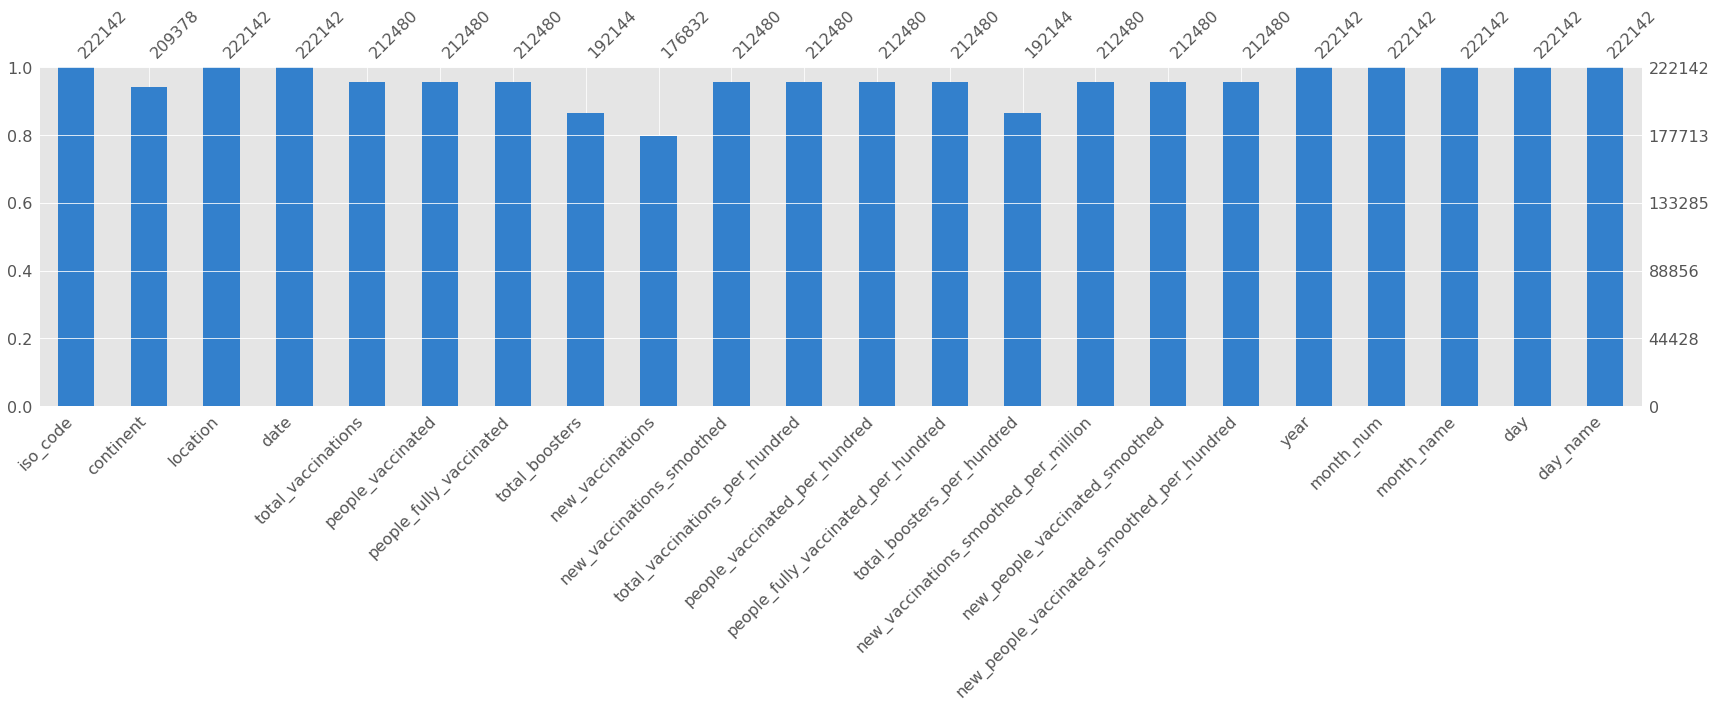

In [80]:
msno.bar(df_vacc, labels=True, color=(0.20, 0.50, 0.80))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

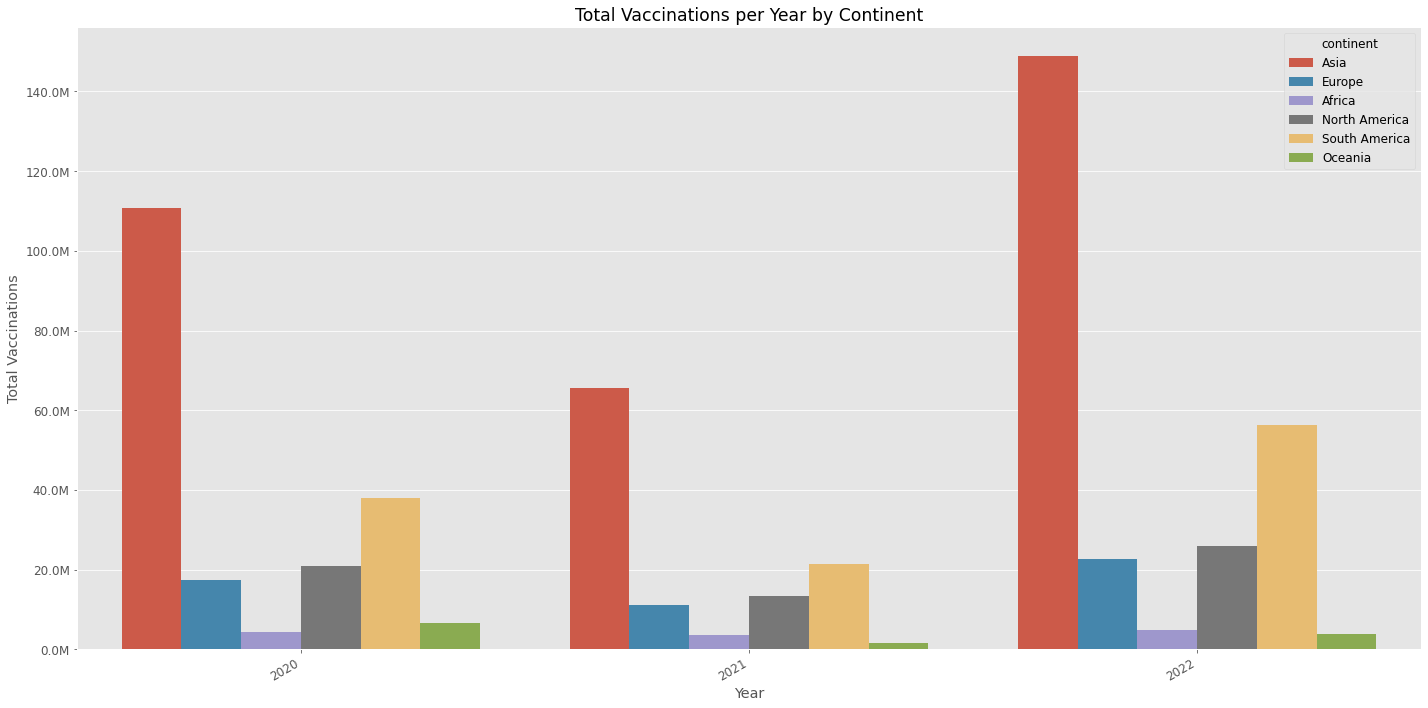

In [81]:
plot_bar(
    data=df_vacc,
    x='year', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Year by Continent', xlabel='Year', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

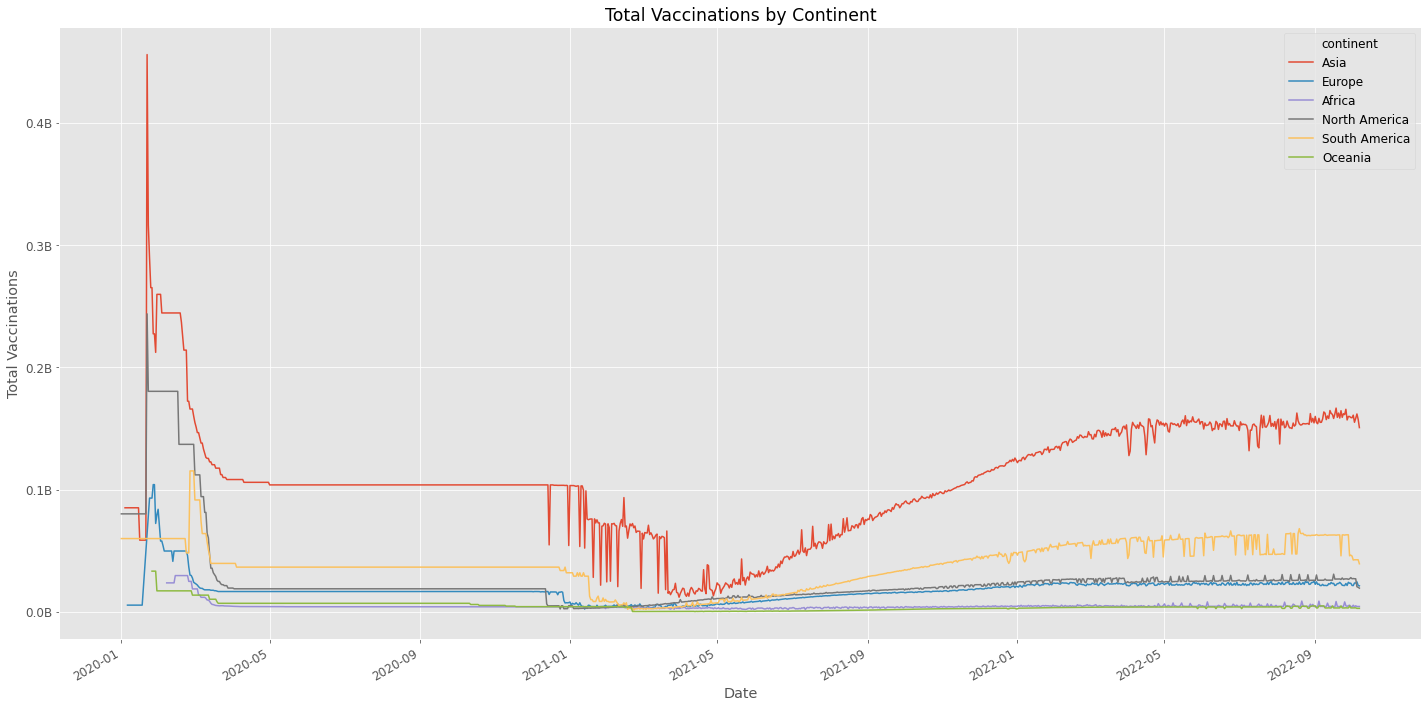

In [82]:
plot_line(
    data=df_vacc,
    x='date', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations by Continent', xlabel='Date', ylabel='Total Vaccinations', 
    formatter=format_bill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

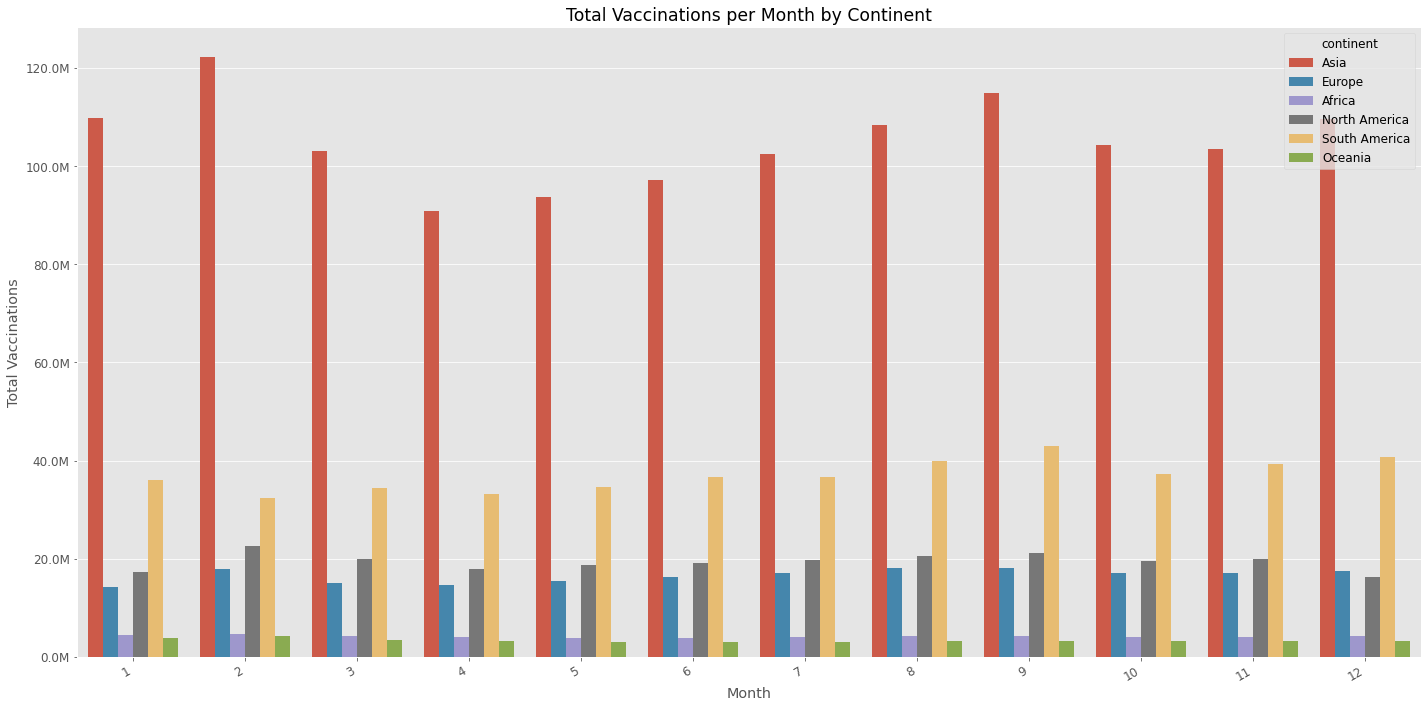

In [83]:
plot_bar(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

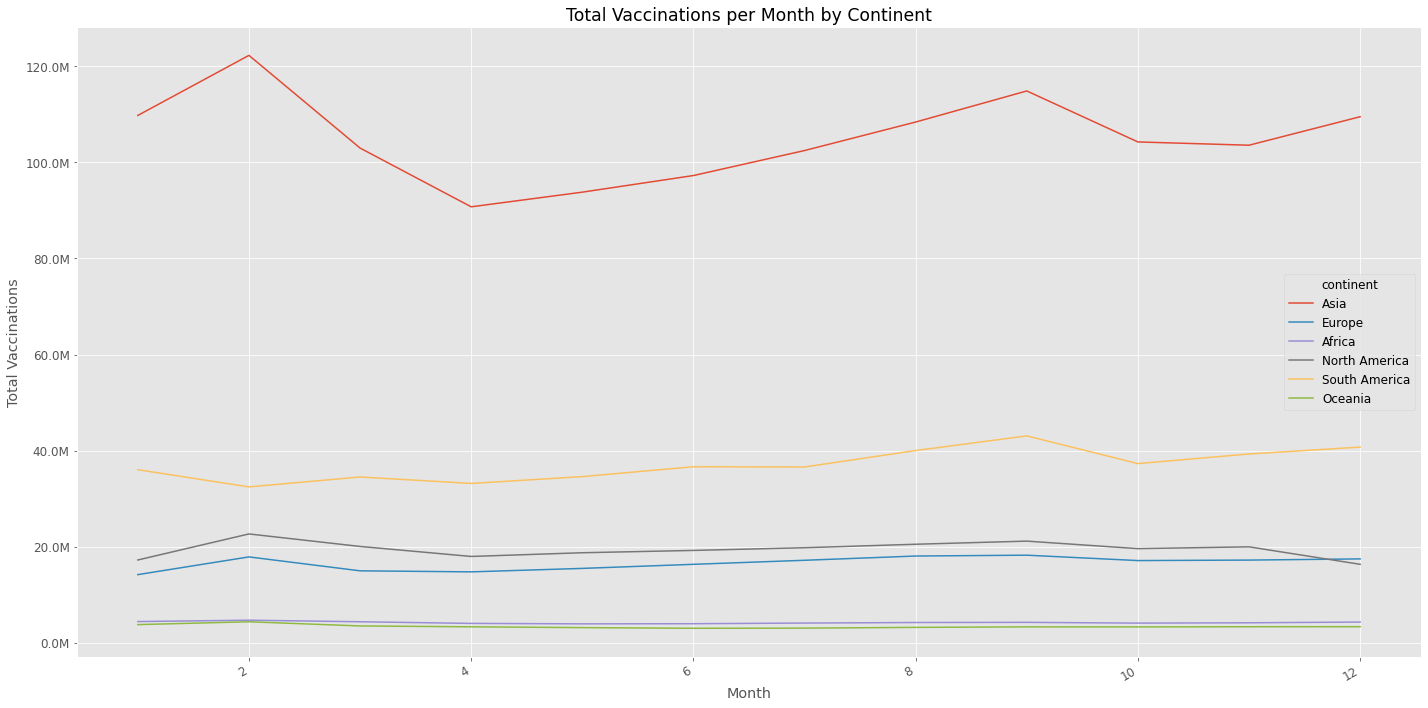

In [84]:
plot_line(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

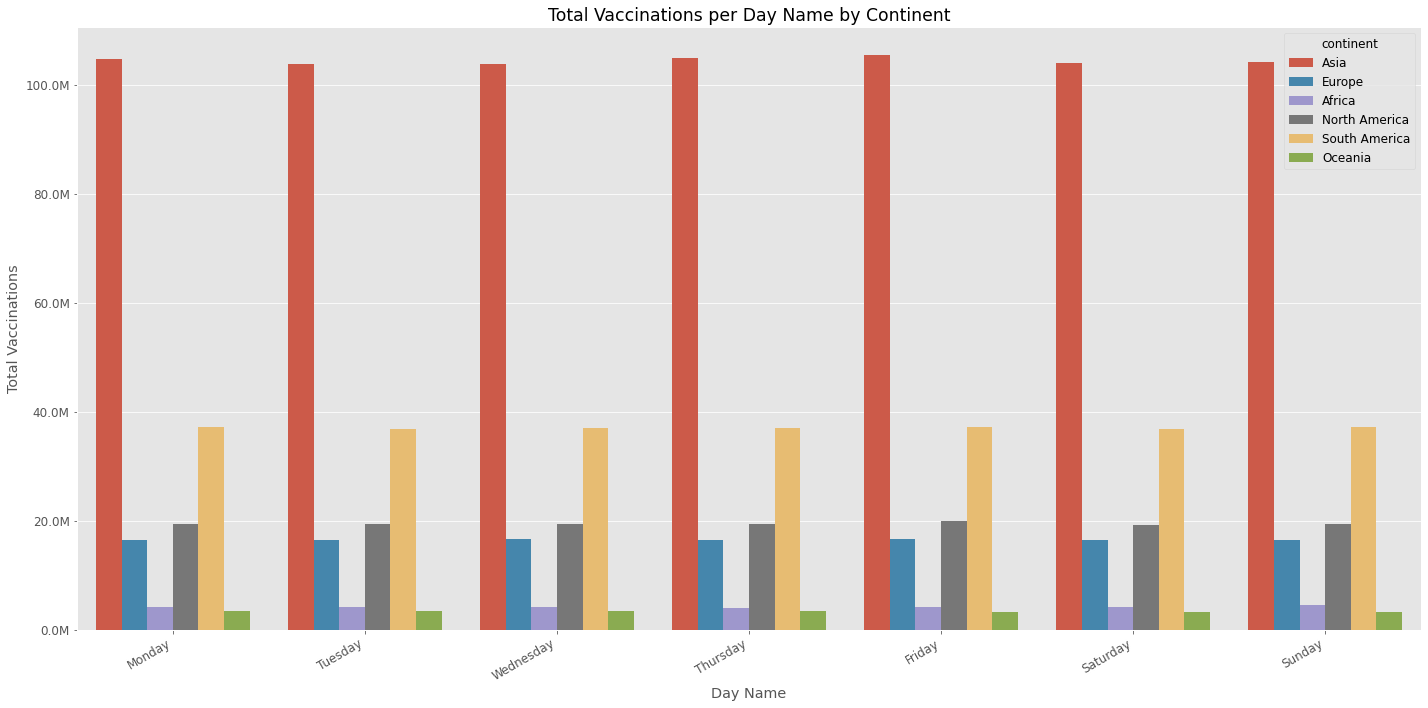

In [85]:
plot_bar(
    data=df_vacc,
    x='day_name', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Day Name by Continent', xlabel='Day Name', ylabel='Total Vaccinations', 
    formatter=format_mill
)

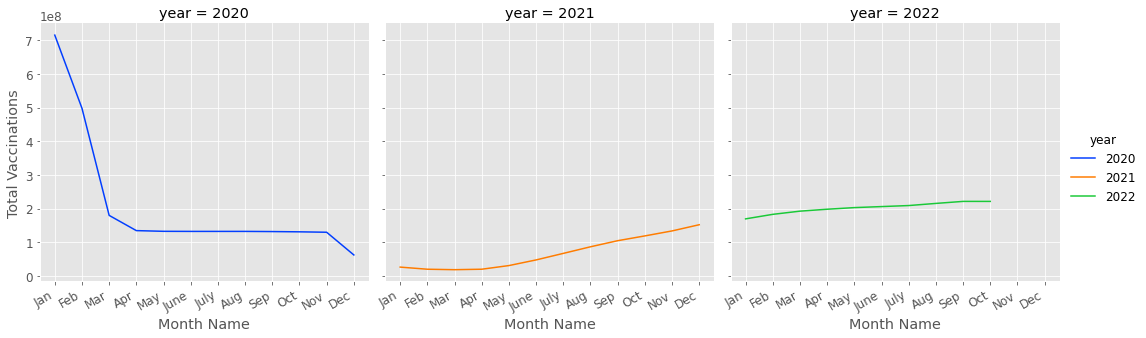

In [86]:
g3 = sns.relplot(
  data=df_vacc,
  x='month_name', y='total_vaccinations', ci=None,
  col='year', hue='year', palette='bright',
  kind='line'
)

g3.set(xlabel='Month Name', ylabel='Total Vaccinations')
g3.fig.autofmt_xdate()

# Demographics Exploration

In [87]:
demo_cols = ['iso_code', 'continent', 'location', 'date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
             'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
             'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index','excess_mortality_cumulative_absolute', 
             'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million', 'year', 'month_num', 'month_name', 
             'day', 'day_name']

df_demo = df_filled[demo_cols]
df_demo.head()

iso_code continent     location       date  population  population_density  \
0      AFG      Asia  Afghanistan 2020-02-24  40099462.0              54.422   
1      AFG      Asia  Afghanistan 2020-02-25  40099462.0              54.422   
2      AFG      Asia  Afghanistan 2020-02-26  40099462.0              54.422   
3      AFG      Asia  Afghanistan 2020-02-27  40099462.0              54.422   
4      AFG      Asia  Afghanistan 2020-02-28  40099462.0              54.422   

   median_age  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
0        18.6          2.581          1.337        1803.987              NaN   
1        18.6          2.581          1.337        1803.987              NaN   
2        18.6          2.581          1.337        1803.987              NaN   
3        18.6          2.581          1.337        1803.987              NaN   
4        18.6          2.581          1.337        1803.987              NaN   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                597.029                 9.59             NaN           NaN   
1                597.029                 9.59             NaN           NaN   
2                597.029                 9.59             NaN           NaN   
3                597.029                 9.59             NaN           NaN   
4                597.029                 9.59             NaN           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                  37.746                         0.5            64.83   
1                  37.746                         0.5            64.83   
2                  37.746                         0.5            64.83   
3                  37.746                         0.5            64.83   
4                  37.746                         0.5            64.83   

   human_development_index  excess_mortality_cumulative_absolute  \
0                    0.511                                   NaN   
1                    0.511                                   NaN   
2                    0.511                                   NaN   
3                    0.511                                   NaN   
4                    0.511                                   NaN   

   excess_mortality_cumulative  excess_mortality  \
0                          NaN               NaN   
1                          NaN               NaN   
2                          NaN               NaN   
3                          NaN               NaN   
4                          NaN               NaN   

   excess_mortality_cumulative_per_million  year  month_num month_name  day  \
0                                      NaN  2020          2        Feb   24   
1                                      NaN  2020          2        Feb   25   
2                                      NaN  2020          2        Feb   26   
3                                      NaN  2020          2        Feb   27   
4                                      NaN  2020          2        Feb   28   

    day_name  
0     Monday  
1    Tuesday  
2  Wednesday  
3   Thursday  
4     Friday

In [88]:
df_demo[['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
         'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 
         'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 
         'excess_mortality_cumulative_per_million']].describe()

population  population_density    median_age  aged_65_older  \
count  2.20851e+05        197301.00000  182582.00000   180655.00000   
mean   1.42321e+08           456.50340      30.61744        8.80430   
std    6.93886e+08          2105.34896       9.06218        6.12666   
min    4.70000e+01             0.13700      15.10000        1.14400   
25%    8.21626e+05            37.31200      22.30000        3.52600   
50%    7.42506e+06            88.12500      30.60000        6.70400   
75%    3.35739e+07           214.24300      39.10000       14.17800   
max    7.90930e+09         20546.76600      48.20000       27.04900   

       aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count   181627.00000    181936.00000     118542.00000           182096.00000   
mean         5.55390     19554.42255         13.63172              261.41295   
std          4.16205     20538.56110         20.03107              120.22215   
min          0.52600       661.24000          0.10000               79.37000   
25%          2.06300      4449.89800          0.60000              170.05000   
50%          4.03200     12951.83900          2.20000              243.96400   
75%          8.67800     27936.89600         21.35000              329.94200   
max         18.49300    116935.60000         77.60000              724.41700   

       diabetes_prevalence  female_smokers  male_smokers  \
count         191429.00000    137824.00000  135937.00000   
mean               8.38538        10.67442      32.80858   
std                4.73132        10.62458      13.53427   
min                0.99000         0.10000       7.70000   
25%                5.31000         1.90000      21.60000   
50%                7.20000         6.30000      31.40000   
75%               10.59000        19.30000      41.30000   
max               30.53000        44.00000      78.10000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count             89629.00000                162043.00000     207569.00000   
mean                 50.93630                     3.08924         73.62067   
std                  31.88385                     2.55255          7.44610   
min                   1.18800                     0.10000         53.28000   
25%                  20.85900                     1.30000         69.50000   
50%                  49.83900                     2.50000         75.05000   
75%                  83.24100                     4.20000         79.07000   
max                 100.00000                    13.80000         86.75000   

       human_development_index  excess_mortality_cumulative_absolute  \
count             177598.00000                           1.08911e+05   
mean                   0.72483                           3.52941e+04   
std                    0.14961                           9.92475e+04   
min                    0.39400                          -3.77261e+04   
25%                    0.60200                           8.61182e+01   
50%                    0.74200                           5.90657e+03   
75%                    0.84500                           1.91333e+04   
max                    0.95700                           1.22058e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 108911.00000      108911.00000   
mean                       9.44755          15.89664   
std                       11.68313          13.73462   
min                      -28.45000         -95.92000   
25%                        1.40045           6.54321   
50%                        7.02409          13.08489   
75%                       14.82133          23.64831   
max                       76.55000         376.25000   

       excess_mortality_cumulative_per_million  
count                             108911.00000  
mean                                1089.08736  
std                                 1225.83619  
min                                -1884.67898  
25% 

In [89]:
df_demo.isna().sum()                                   # check missing values

iso_code                                        0
continent                                   12764
location                                        0
date                                            0
population                                   1291
population_density                          24841
median_age                                  39560
aged_65_older                               41487
aged_70_older                               40515
gdp_per_capita                              40206
extreme_poverty                            103600
cardiovasc_death_rate                       40046
diabetes_prevalence                         30713
female_smokers                              84318
male_smokers                                86205
handwashing_facilities                     132513
hospital_beds_per_thousand                  60099
life_expectancy                             14573
human_development_index                     44544
excess_mortality_cumulative_absolute       113231


<AxesSubplot:>

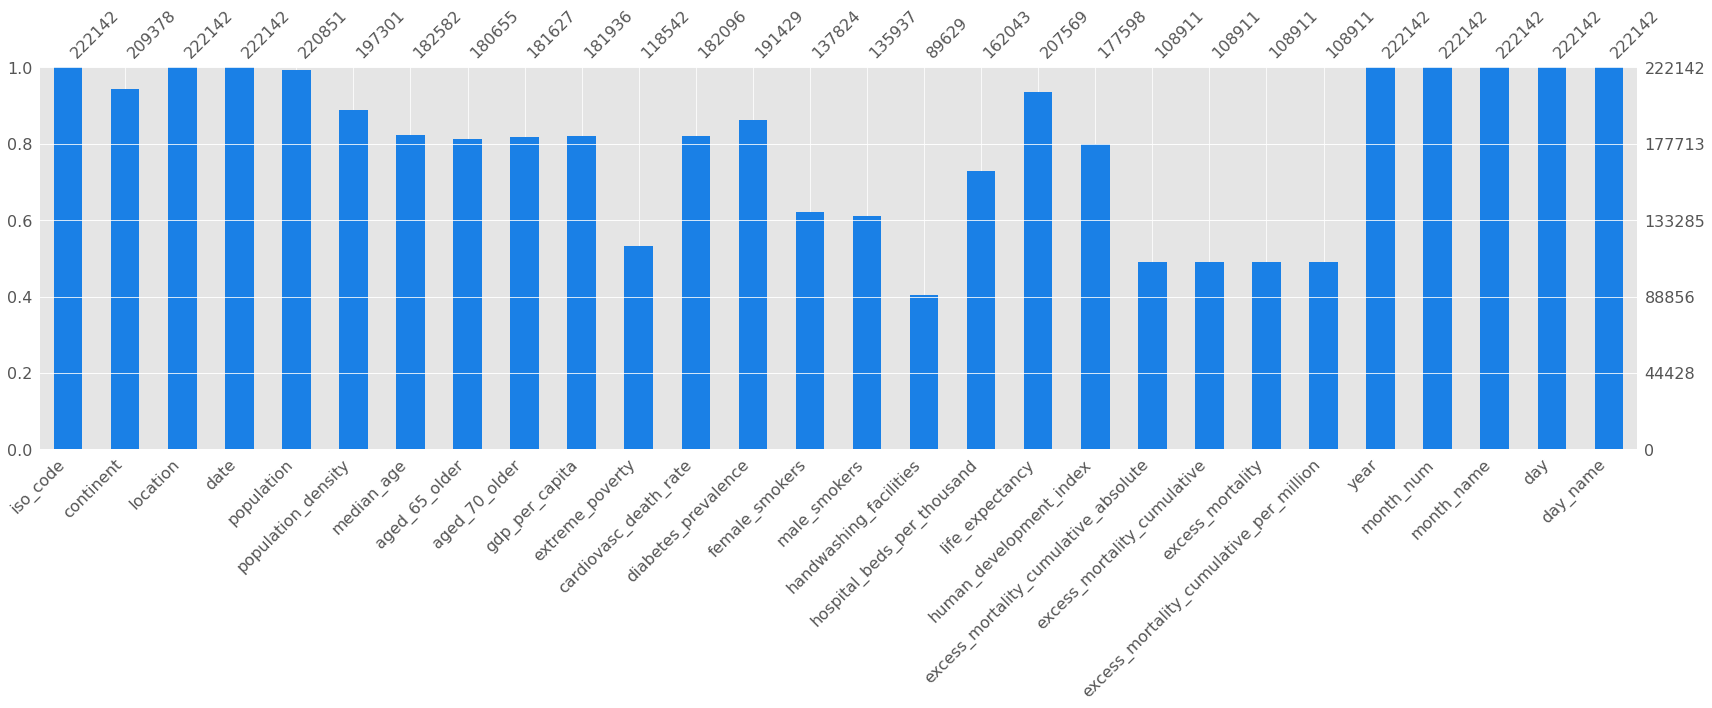

In [90]:
msno.bar(df_demo, labels=True, color=(0.1, 0.5, 0.9))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

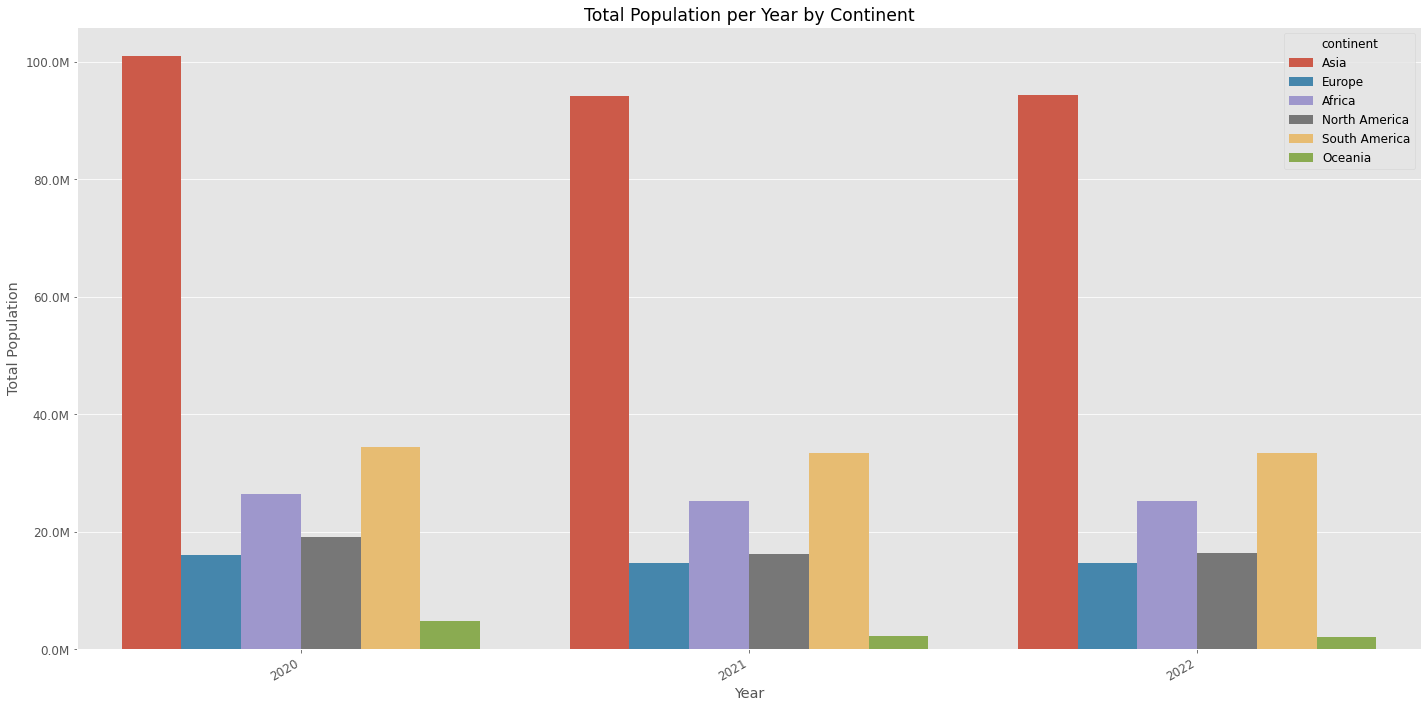

In [91]:
plot_bar(
    data=df_demo,
    x='year', y='population', hue='continent', 
    title='Total Population per Year by Continent', xlabel='Year', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

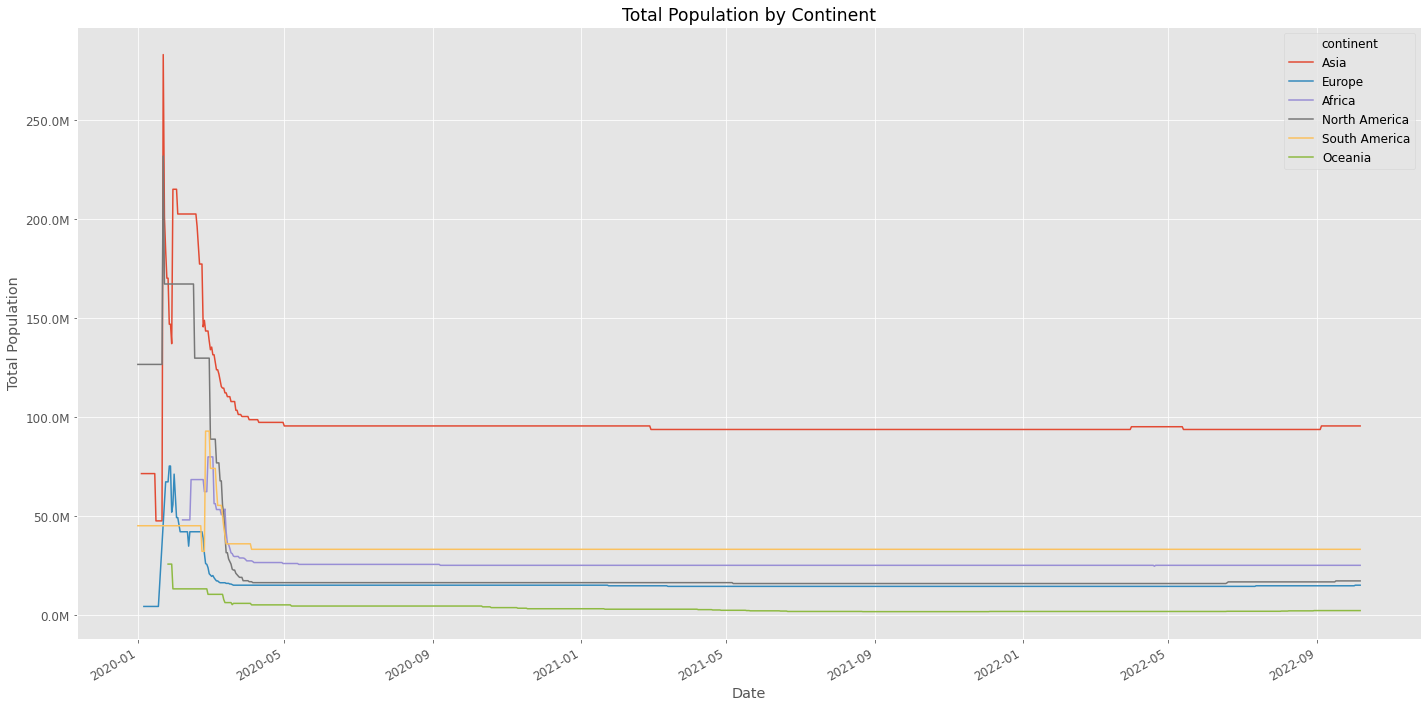

In [92]:
plot_line(
    data=df_demo,
    x='date', y='population', hue='continent', 
    title='Total Population by Continent', xlabel='Date', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

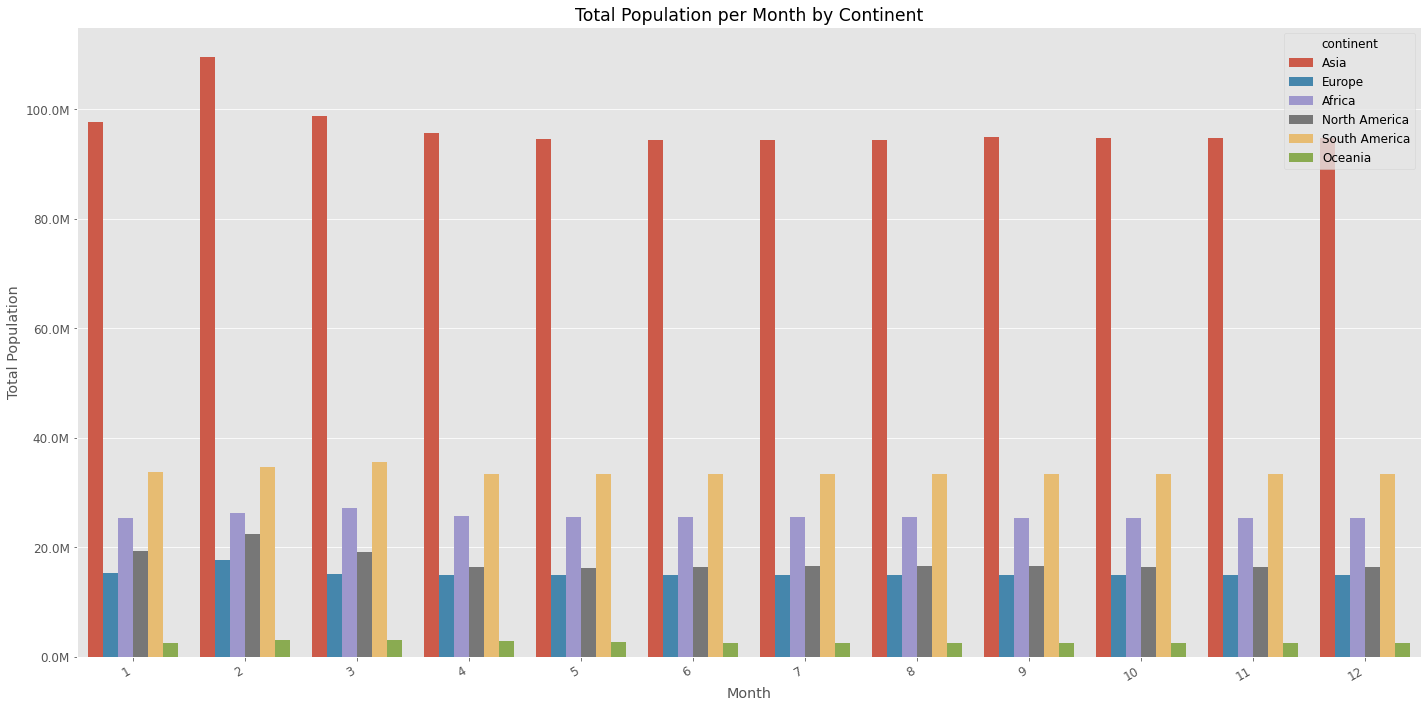

In [93]:
plot_bar(
    data=df_demo,
    x='month_num', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

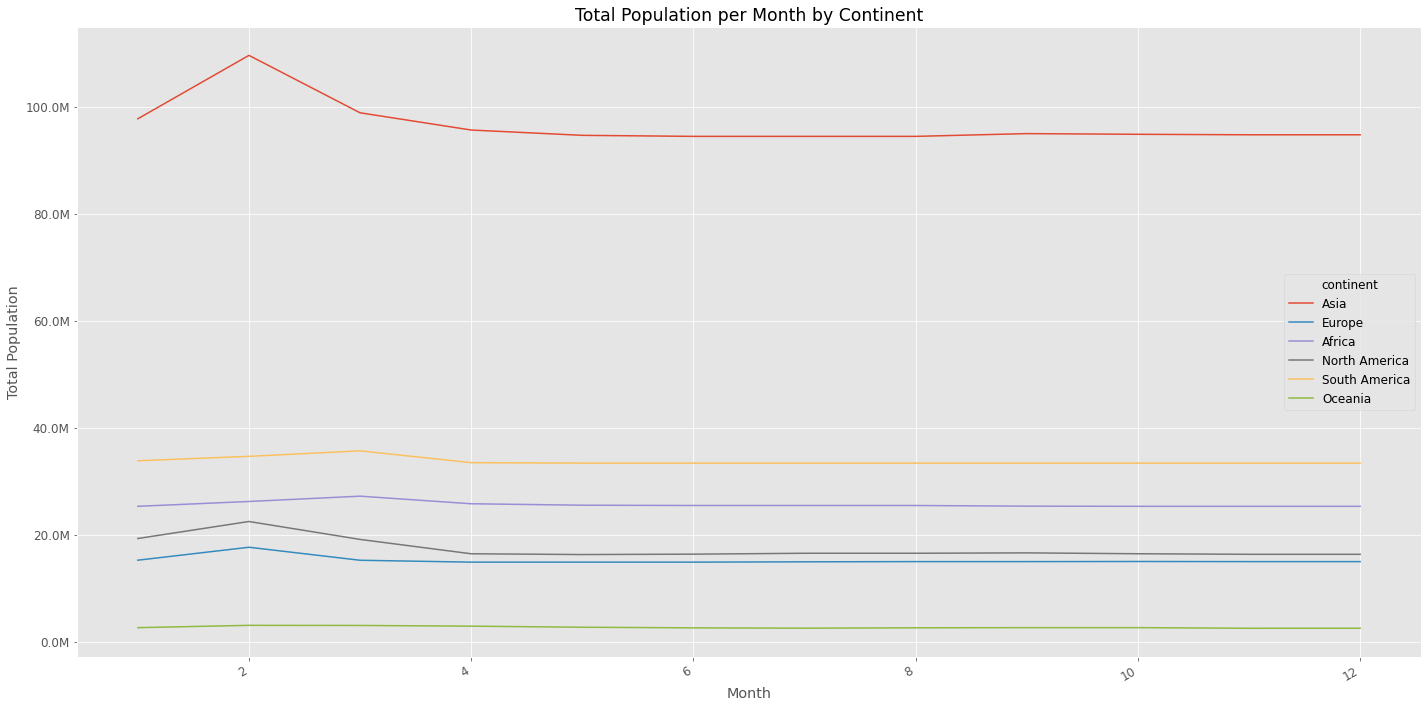

In [94]:
plot_line(
    data=df_demo,
    x='month_num', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

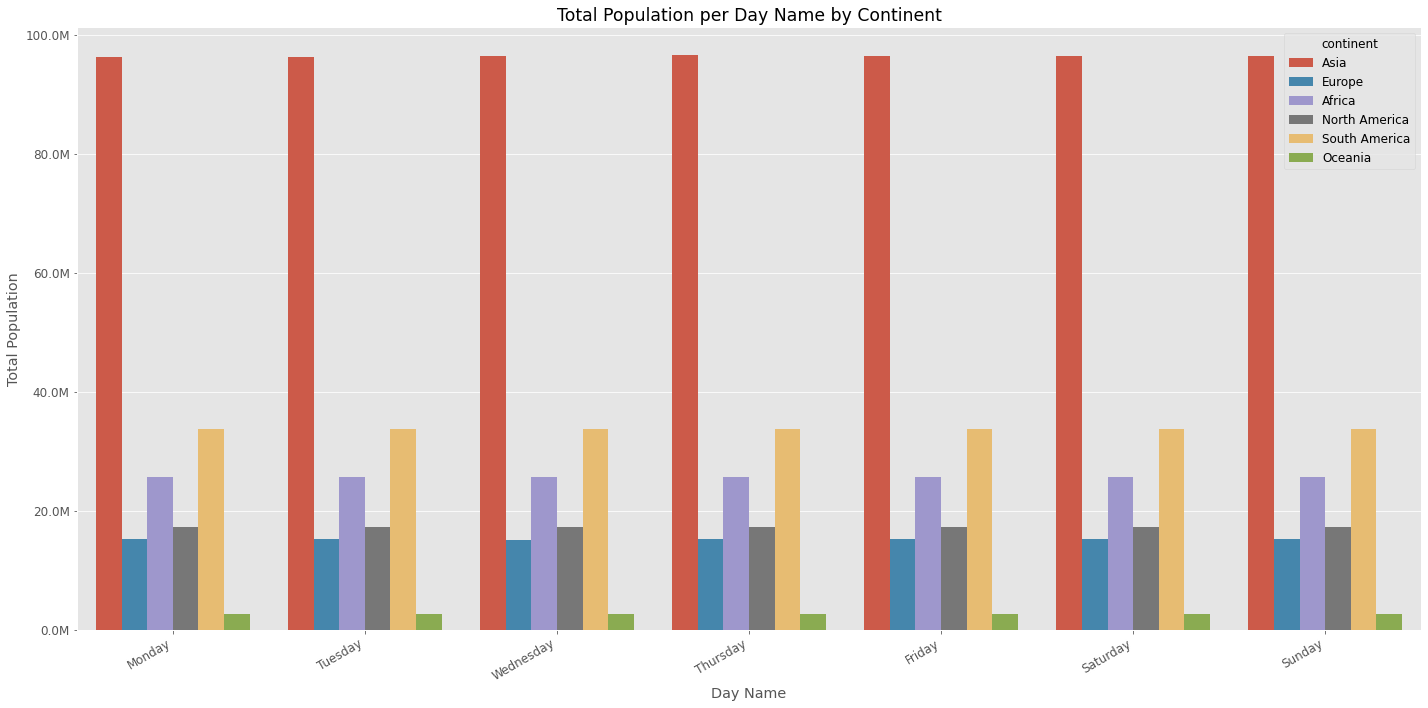

In [95]:
plot_bar(
    data=df_demo,
    x='day_name', y='population', hue='continent', 
    title='Total Population per Day Name by Continent', xlabel='Day Name', ylabel='Total Population', 
    formatter=format_mill
)

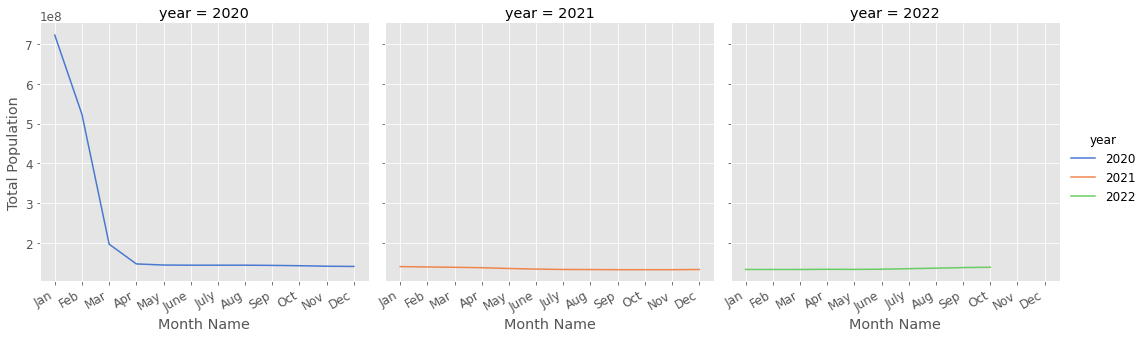

In [96]:
g4 = sns.relplot(
  data=df_demo,
  x='month_name', y='population', ci=None,
  col='year', hue='year', palette='muted',
  kind='line'
)

g4.set(xlabel='Month Name', ylabel='Total Population')
g4.fig.autofmt_xdate()

# Date Truncating or Indexing

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

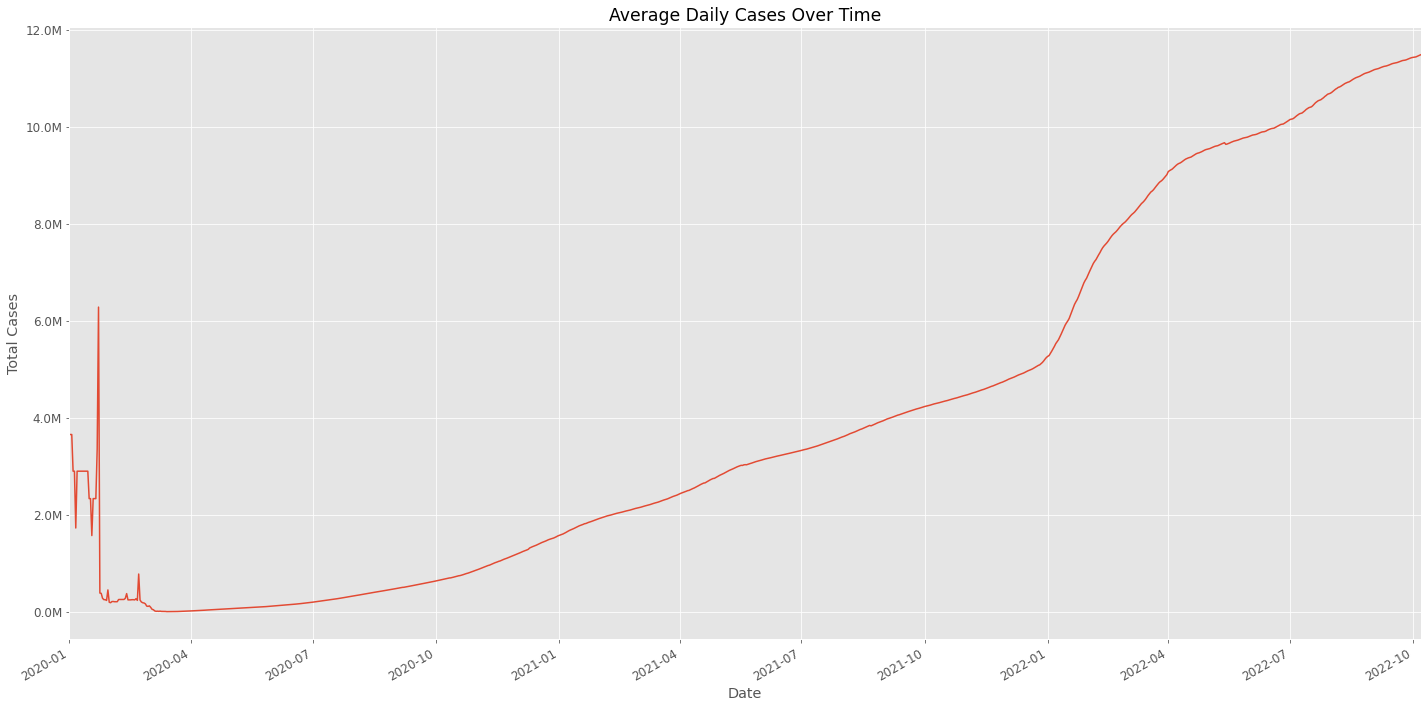

In [97]:
plot_date_rng(
    data=get_data(data=df_filled, rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Daily Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

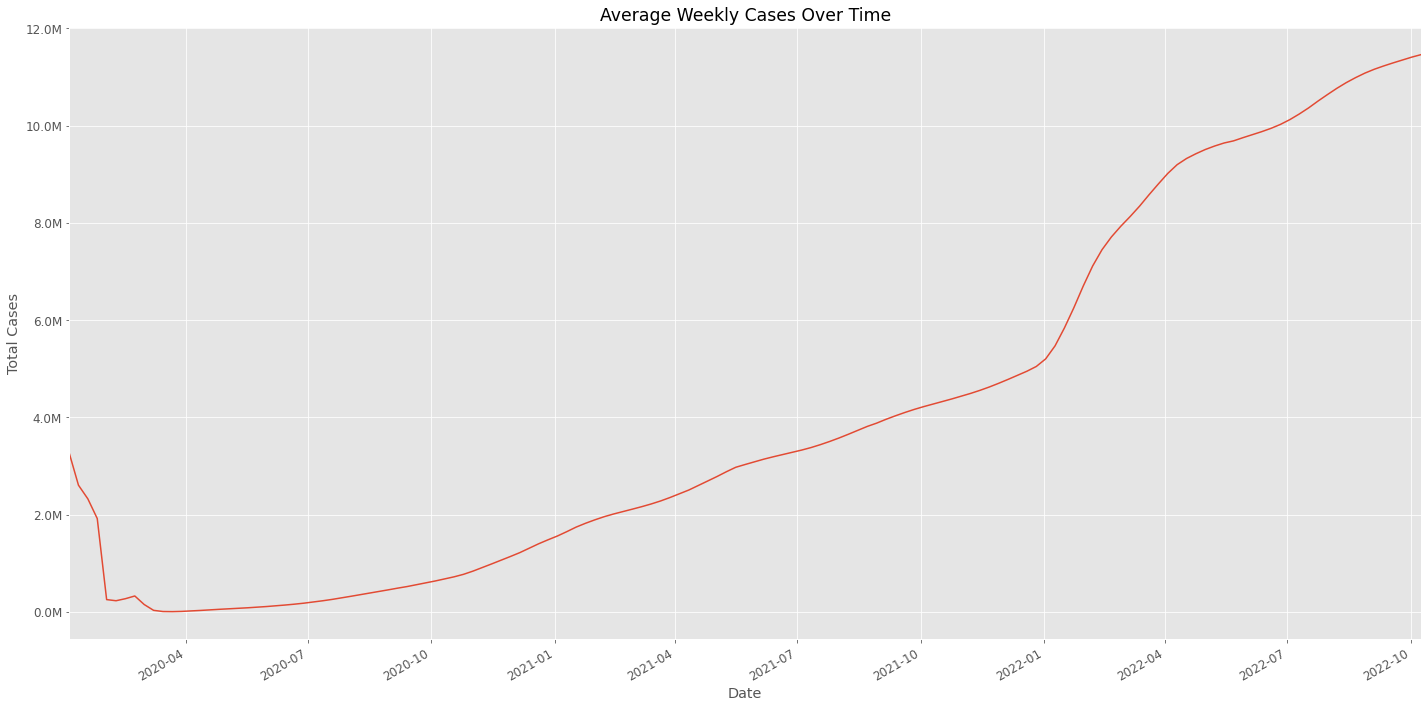

In [98]:
plot_date_rng(
    data=get_data(data=df_filled, rule='W').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Weekly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

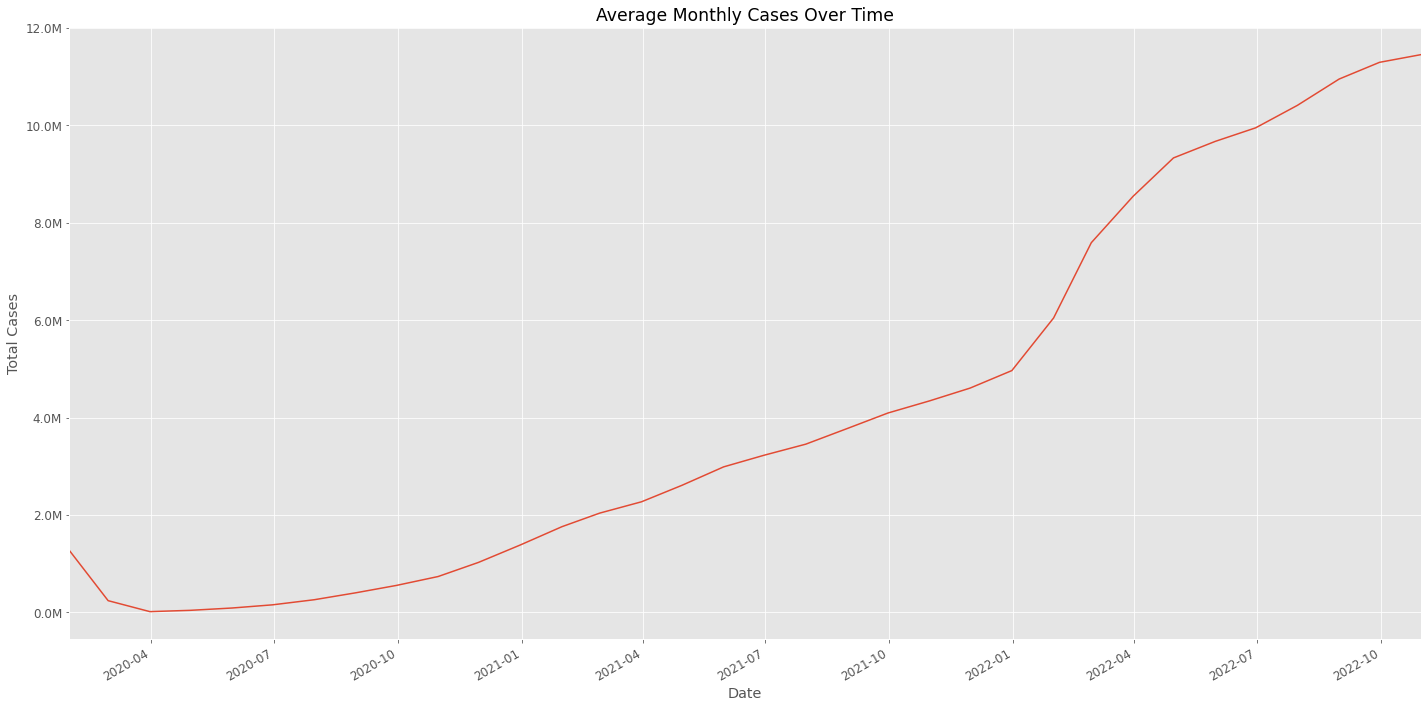

In [99]:
plot_date_rng(
    data=get_data(data=df_filled, rule='M').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Monthly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

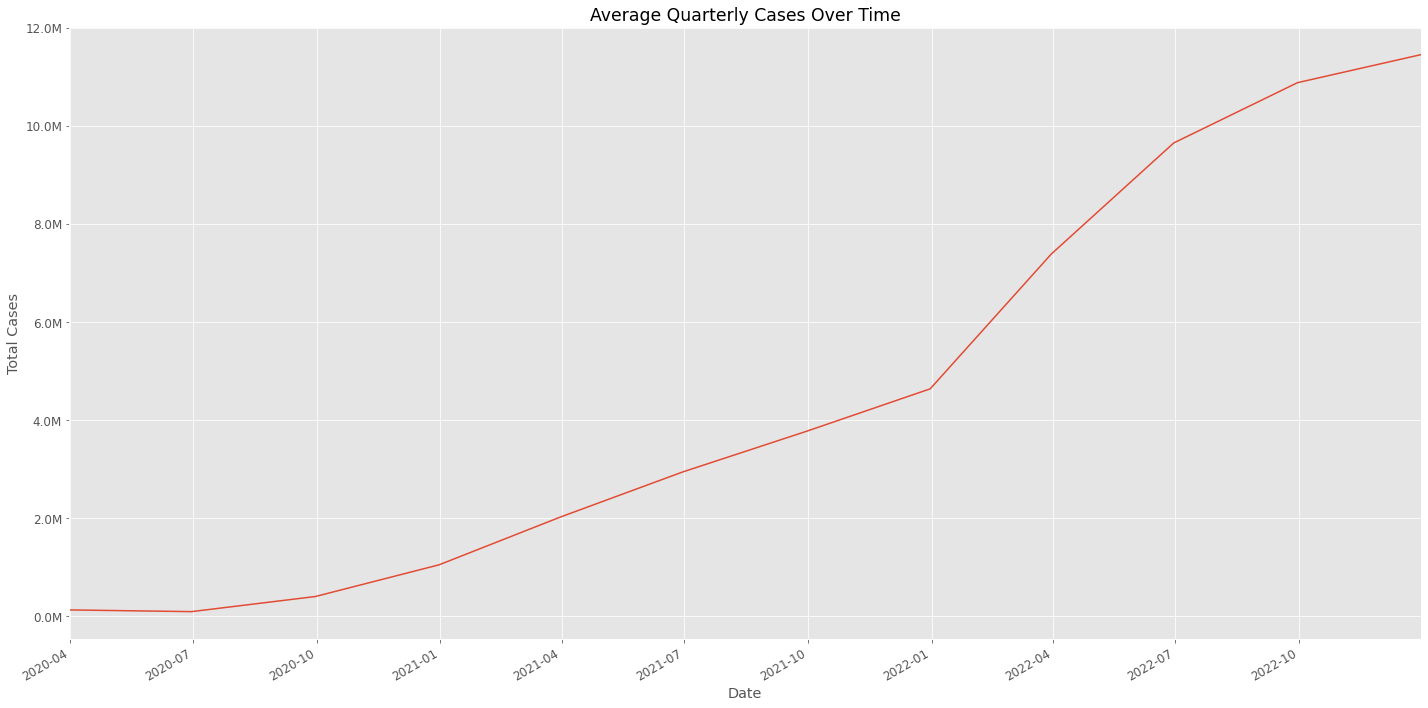

In [100]:
plot_date_rng(
    data=get_data(data=df_filled, rule='Q').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Quarterly Cases Over Time',
    formatter=format_mill
)

Plot Specific Date Range

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

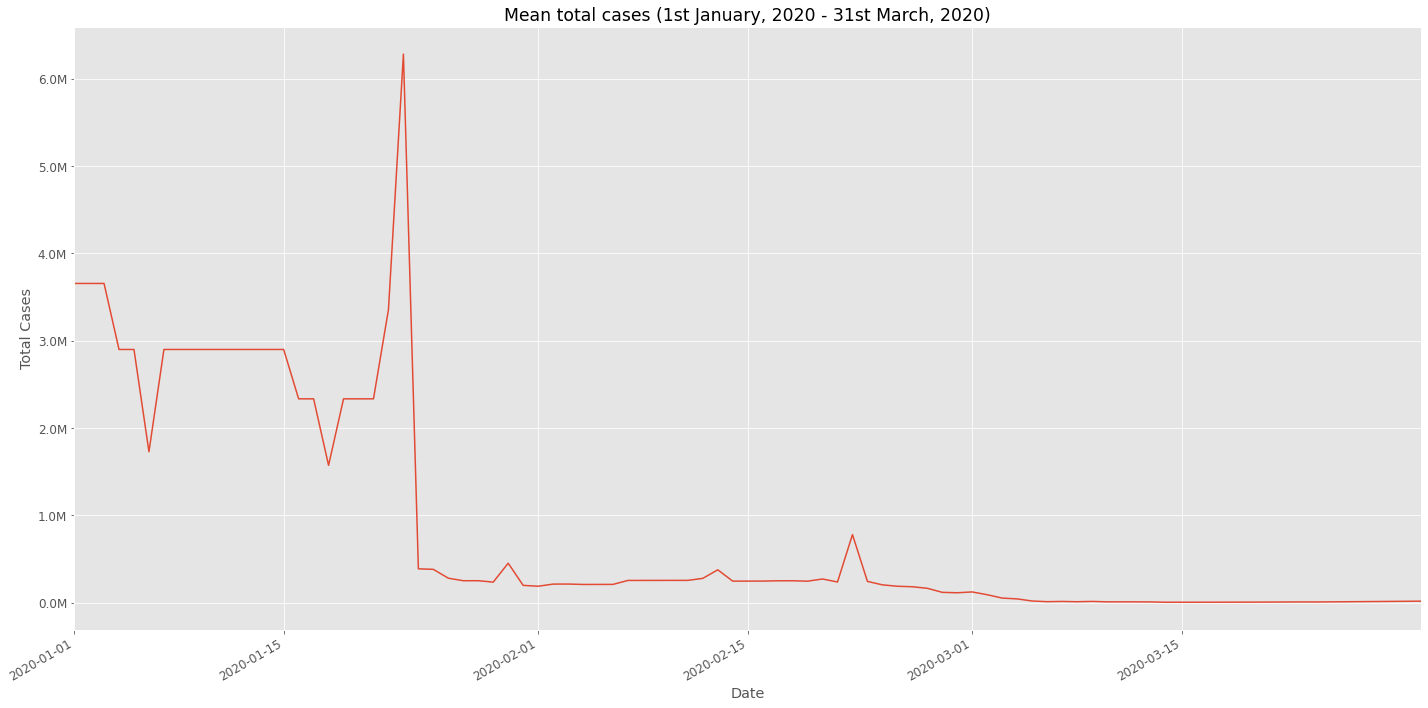

In [101]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-03-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st March, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

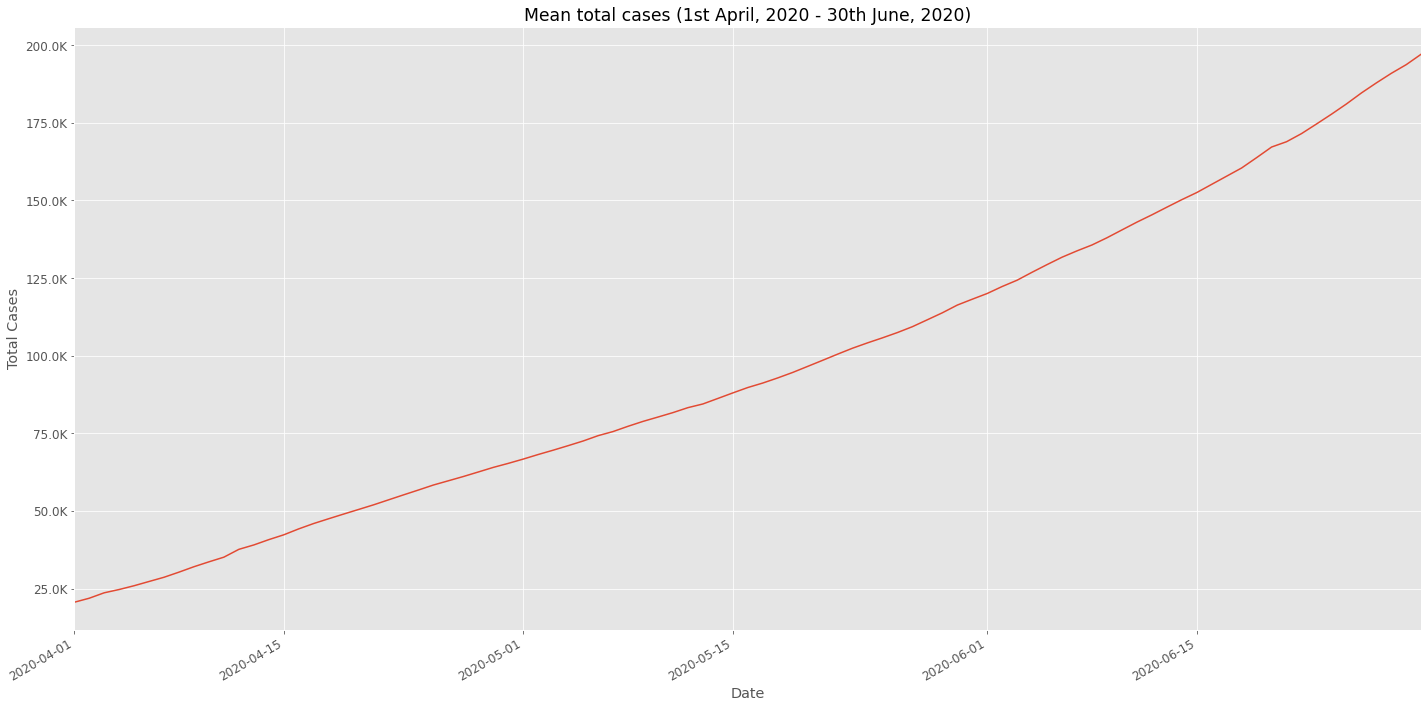

In [102]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-04-01', after='2020-06-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st April, 2020 - 30th June, 2020)',
    formatter=format_tsd
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

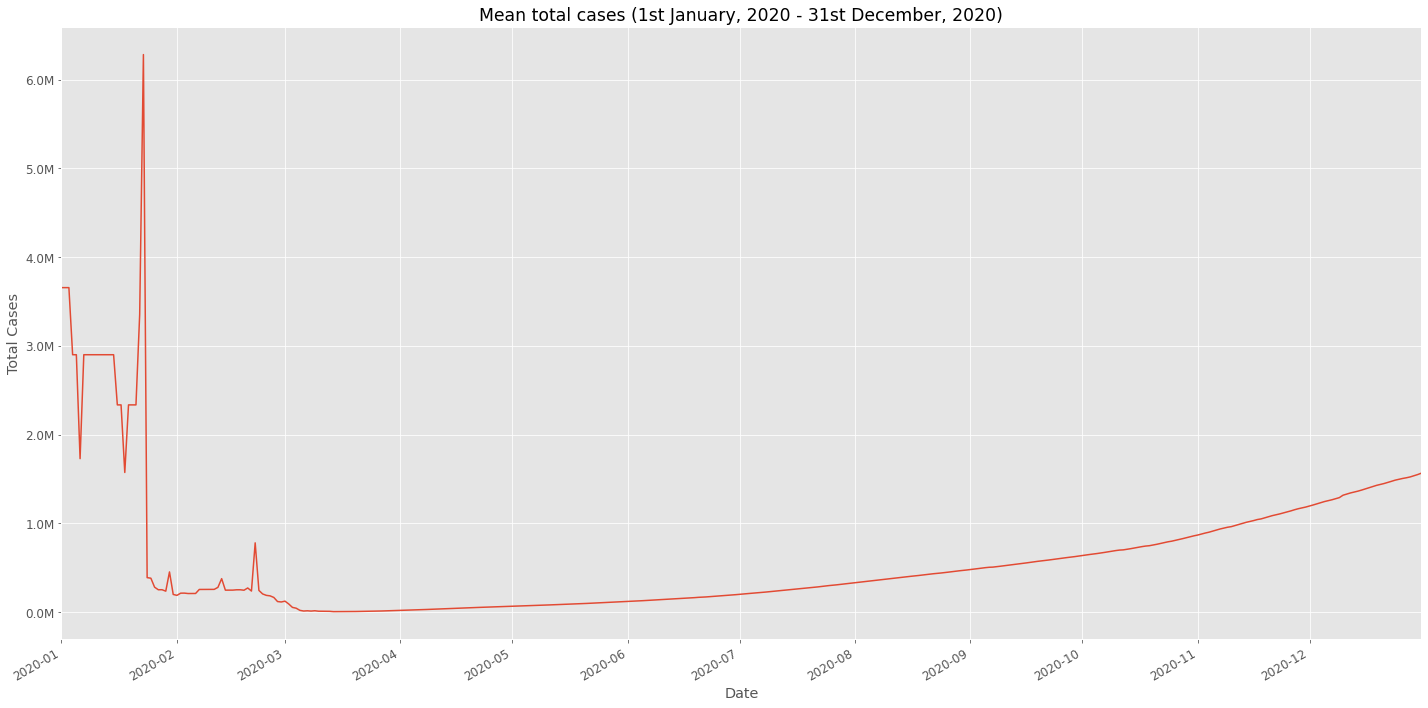

In [103]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st December, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

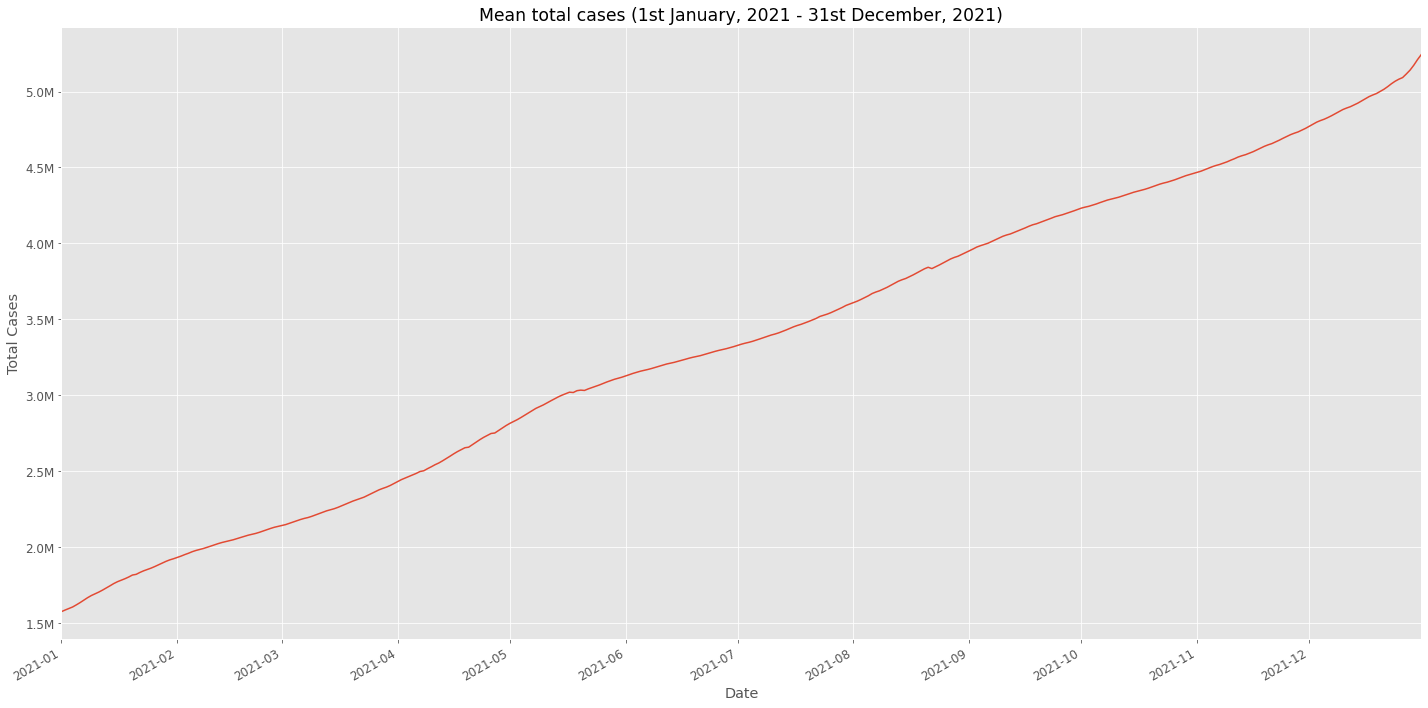

In [104]:
plot_date_rng(
    data=get_data(data=df_filled, before='2021-01-01', after='2021-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2021 - 31st December, 2021)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

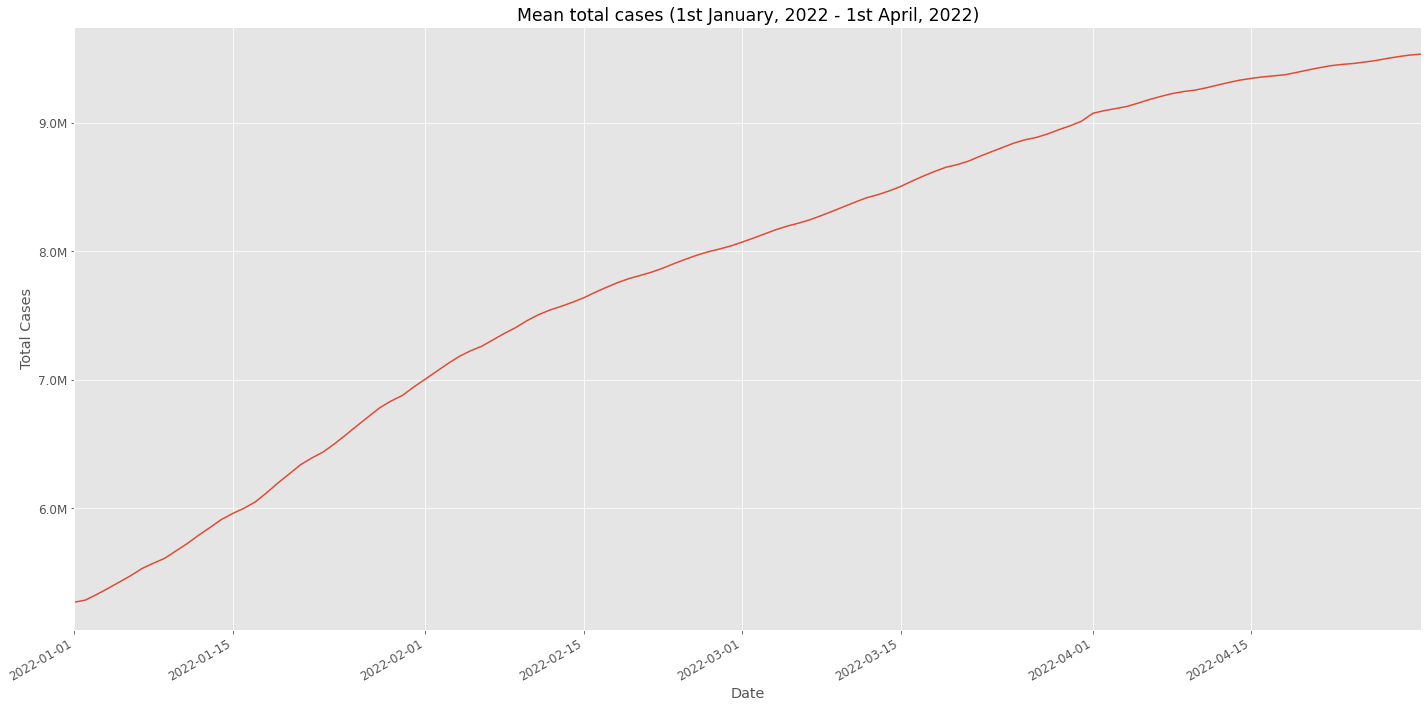

In [105]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-01-01', after='2022-04-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2022 - 1st April, 2022)',
    formatter=format_mill
)